### Importing, Cleaning, Wrangling 

In [12]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet, fcluster
from scipy.stats import shapiro, kstest, anderson
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.fftpack import fft, ifft
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.decomposition import PCA
import numpy as np


#### Generate Files for Class Consumption

In [233]:
g_wd = r"C:/Users/gerva/OneDrive\Documentos/LONDON SCHOOL OF ECONOMICS/ST498 CAPSTONE PROJECT/"
fin_wd = '/Users/finbarrhodes/Documents/Capstone/EDRP/'


In [234]:
csv_path = fin_wd + "7591elec_filtered.csv"
df_filtered = pd.read_csv(csv_path)
print(df_filtered.head())

KeyboardInterrupt: 

In [235]:
df_filtered['ADVANCEDATETIME'] = pd.to_datetime(df_filtered['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S')

def get_day_class(day):
    if day == 0:  # Monday
        return 1
    elif day in [1, 2, 3]:  # Tuesday, Wednesday, Thursday
        return 2
    elif day == 4:  # Friday
        return 3
    elif day == 5:  # Saturday
        return 4
    elif day == 6:  # Sunday
        return 5

def get_month_class(month):
    if month in [12, 1, 2]:  # Dec, Jan, Feb
        return 1
    elif month == 3:  # March
        return 2
    elif month in [4, 5]:  # April, May
        return 3
    elif month in [6, 7, 9]:  # June, July, September
        return 4
    elif month == 8:  # August
        return 5
    elif month == 10:  # October
        return 6
    elif month == 11:  # November
        return 7

df_filtered['Day_Class'] = df_filtered['ADVANCEDATETIME'].dt.weekday.apply(get_day_class)
df_filtered['Month_Class'] = df_filtered['ADVANCEDATETIME'].dt.month.apply(get_month_class)

# Dictionary of DF
df_filtered_dict = {}

# Group by Day_Class and Month_Class and compute the mean electricity consumption per household
for x in range(1, 6):  
    for y in range(1, 8):  
        df_name = f"df_filtered{x}{y}"  
        df_filtered_dict[df_name] = (
            df_filtered[(df_filtered['Day_Class'] == x) & (df_filtered['Month_Class'] == y)]
            .groupby(['ANON_ID', 'HH'])['ELECKWH']
            .mean()
            .reset_index()
        )


In [ ]:

output_folder = r"/Users/finbarrhodes/Documents/Capstone/EDRP/PivotedClassEDRP"

# dictionary to store pivoted dataframes
df_filtered_pivot_dict = {}

for x in range(1, 6):  # Day Classes 1 to 5
    for y in range(1, 8):  # Month Classes 1 to 7
        df_name = f"df_filtered{x}{y}"  
        
        if df_name in df_filtered_dict:  # Ensure the DataFrame exists
            # Pivot oHH
            df_pivot = df_filtered_dict[df_name].pivot(index='ANON_ID', columns='HH', values='ELECKWH')
            
            # Rename columns to HH_00, HH_01, ..., HH_47 
            df_pivot.columns = [f'HH_{int(col):02d}' for col in df_pivot.columns]
            df_pivot.reset_index(inplace=True)
            df_filtered_pivot_dict[f"{df_name}_pivot"] = df_pivot

            # Save to CSV
            output_path = os.path.join(output_folder, f"{df_name}_pivot.csv")
            df_pivot.to_csv(output_path, index=False)

            print(f"Saved: {df_name}_pivot.csv")  # Confirmation message




Saved: df_filtered11_pivot.csv
Saved: df_filtered12_pivot.csv
Saved: df_filtered13_pivot.csv
Saved: df_filtered14_pivot.csv
Saved: df_filtered15_pivot.csv
Saved: df_filtered16_pivot.csv
Saved: df_filtered17_pivot.csv
Saved: df_filtered21_pivot.csv
Saved: df_filtered22_pivot.csv
Saved: df_filtered23_pivot.csv
Saved: df_filtered24_pivot.csv
Saved: df_filtered25_pivot.csv
Saved: df_filtered26_pivot.csv
Saved: df_filtered27_pivot.csv
Saved: df_filtered31_pivot.csv
Saved: df_filtered32_pivot.csv
Saved: df_filtered33_pivot.csv
Saved: df_filtered34_pivot.csv
Saved: df_filtered35_pivot.csv
Saved: df_filtered36_pivot.csv
Saved: df_filtered37_pivot.csv
Saved: df_filtered41_pivot.csv
Saved: df_filtered42_pivot.csv
Saved: df_filtered43_pivot.csv
Saved: df_filtered44_pivot.csv
Saved: df_filtered45_pivot.csv
Saved: df_filtered46_pivot.csv
Saved: df_filtered47_pivot.csv
Saved: df_filtered51_pivot.csv
Saved: df_filtered52_pivot.csv
Saved: df_filtered53_pivot.csv
Saved: df_filtered54_pivot.csv
Saved: d

#### Import data

Importing day-class data

In [ ]:
# To import the class pivoted with most entries:

In [ ]:
g_wd = r"C:\Users\gerva\OneDrive\Documentos\GitHub\ST498_CAPSTONE\PivotedClassEDRP"
fin_wd = r"/Users/finbarrhodes/Documents/Capstone/EDRP/PivotedClassEDRP"

In [ ]:
# raw data path
csv_path = fin_wd + r"/df_filtered24_pivot.csv"

# read csv as dask df
df24 = dd.read_csv(csv_path)
print(df24.head())

   ANON_ID     HH_00     HH_01     HH_02     HH_03     HH_04     HH_05  \
0        3  0.210294  0.193382  0.180147  0.182941  0.172206  0.181324   
1        5  0.070413  0.079973  0.086373  0.084747  0.077867  0.070707   
2        6  0.045344  0.045581  0.050742  0.047781  0.053031  0.052594   
3        7  0.107103  0.107570  0.105888  0.107757  0.109720  0.104766   
4        8  0.130417  0.130521  0.130000  0.126042  0.125729  0.128438   

      HH_06     HH_07     HH_08  ...     HH_38     HH_39     HH_40     HH_41  \
0  0.177463  0.197463  0.199552  ...  0.293731  0.285821  0.273881  0.266119   
1  0.084573  0.085653  0.079613  ...  0.185026  0.177434  0.212658  0.280697   
2  0.046406  0.051500  0.048563  ...  0.097344  0.105219  0.098375  0.070500   
3  0.116355  0.105701  0.094953  ...  0.483738  0.247477  0.221682  0.211028   
4  0.123263  0.125263  0.131789  ...  0.380206  0.284583  0.300619  0.263053   

      HH_42     HH_43     HH_44     HH_45     HH_46     HH_47  
0  0.24522

Importing 'Old' Raw Data (ID, DateTime, kWh)

In [ ]:
# Add the path to your working directory of where your capstone stuff is on your machine so we can all use the same relative paths below 

fin_wd = '/Users/finbarrhodes/Documents/Capstone/EDRP/'
g_wd = r"C:/Users/gerva/OneDrive/Documentos/LONDON SCHOOL OF ECONOMICS\ST498 CAPSTONE PROJECT/"

In [ ]:
# raw data path
csv_path = fin_wd + r"/csv/edrp_elec.csv"

# read csv as dask df
raw_data = dd.read_csv(csv_path)
print(raw_data.head())

   ANON_ID   ADVANCEDATETIME  HH  ELECKWH
0     5110  15FEB08:12:30:00  25     0.60
1    11617  15FEB08:12:30:00  25     0.25
2     4869  15FEB08:12:30:00  25     0.30
3     9015  15FEB08:12:30:00  25     0.40
4    11628  15FEB08:12:30:00  25     0.85


### Fast Fourier Transformation

In [4]:
# Add each of the paths
g_wd = r"C:\Users\gerva\OneDrive\Documentos\GitHub\ST498_CAPSTONE\PivotedClassEDRP"

In [6]:
csv_path = g_wd + r"/df_filtered24_pivot.csv"
df24 = pd.read_csv(csv_path)
df24.tail()

ANON_ID     HH_00     HH_01     HH_02     HH_03     HH_04     HH_05  \
5636    16240  0.106707  0.083390  0.074195  0.077268  0.081671  0.075756   
5637    16242  0.151939  0.152610  0.150610  0.151878  0.148366  0.149073   
5638    16244  0.054280  0.050110  0.049902  0.047805  0.047183  0.044549   
5639    16247  0.027264  0.028396  0.028972  0.027714  0.028113  0.027905   
5640    16248  0.105467  0.080267  0.057200  0.051067  0.048933  0.045600   

         HH_06     HH_07     HH_08  ...     HH_38     HH_39     HH_40  \
5636  0.074878  0.077939  0.075110  ...  0.340537  0.377390  0.385134   
5637  0.147195  0.147732  0.148110  ...  0.286244  0.287939  0.288122   
5638  0.048317  0.045110  0.044854  ...  0.171683  0.170902  0.152317   
5639  0.027048  0.028679  0.027547  ...  0.084537  0.089813  0.115185   
5640  0.046081  0.044324  0.043649  ...  0.210135  0.213649  0.217973   

         HH_41     HH_42     HH_43     HH_44     HH_45     HH_46     HH_47  
5636  0.396500  0.462037  0.395988  0.315024  0.208890  0.152073  0.112768  
5637  0.310671  0.307829  0.293561  0.251476  0.220000  0.180037  0.165000  
5638  0.167646  0.174024  0.193732  0.168780  0.129232  0.088000  0.066415  
5639  0.145648  0.134352  0.095327  0.058981  0.032991  0.030472  0.030556  
5640  0.244054  0.252027  0.262973  0.247568  0.233784  0.204865  0.171892  

[5 rows x 49 columns]

In [8]:
# Count rows before removing NaNs
rows_before = df24.shape[0]  # Number of rows before dropping NaNs

# Drop rows with missing values
df24_clean = df24.dropna()

# Count rows after removing NaNs
rows_after = df24_clean.shape[0]  # Number of rows after dropping NaNs

# Print the difference
print(f"Rows before dropping NaNs: {rows_before}")
print(f"Rows after dropping NaNs: {rows_after}")
print(f"Number of rows dropped: {rows_before - rows_after}")


Rows before dropping NaNs: 5641
Rows after dropping NaNs: 5628
Number of rows dropped: 13


#### Fast Fourier Transform: Failed to detect night consumers

In [ ]:
# Drop ANON_ID temporarily for FFT
anon_ids_24 = df24_clean["ANON_ID"]
components = 5
# Ensure data is numeric and converted to a NumPy array
data_24 = df24_clean.drop(columns=["ANON_ID"]).apply(pd.to_numeric, axis=1).values  # Convert to numeric

# Verify that data is a proper NumPy array
data_24 = np.array(data_24, dtype=np.float64)  # Force conversion to float64

# Apply FFT
fft_features_24 = np.abs(fft(data_24, axis=1))  # Compute FFT magnitudes
fft_features_24 = fft_features_24[:, :components]  # Keep only first 24 components (since FFT output is symmetric)


# Normalize features
scaler = StandardScaler()
fft_features_scaled_24 = scaler.fit_transform(fft_features_24)

# Store as DataFrame
fft_df_24 = pd.DataFrame(fft_features_scaled_24, columns=[f'FFT_{i}' for i in range(components)])
fft_df_24["ANON_ID"] = anon_ids_24  # Add ANON_ID back

fft_df_24.head()


FFT_0     FFT_1     FFT_2     FFT_3     FFT_4  ANON_ID
0  0.477743 -0.514592 -0.551082 -0.850830 -0.105297      3.0
1 -0.168211 -0.317336  0.360233  0.201209  0.073627      5.0
2 -1.101476 -1.148380 -0.869963 -0.782287 -0.731375      6.0
3 -0.413209  0.260394  0.422836  0.798173  0.614357      7.0
4  0.153531 -0.606997  0.848293 -0.556433  0.670419      8.0

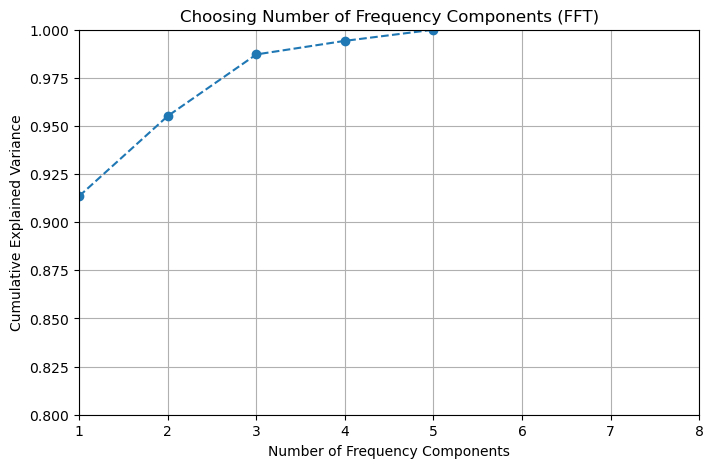

In [ ]:

# Compute the Power Spectrum (Magnitude Squared)
power_spectrum_24 = np.square(fft_features_24)

# Compute explained variance ratio correctly using power spectrum
explained_variance_24 = power_spectrum_24.mean(axis=0) / np.sum(power_spectrum_24.mean(axis=0))

# Compute cumulative explained variance
cumulative_variance_24 = np.cumsum(explained_variance_24)


plt.figure(figsize=(8, 5))
plt.plot(range(1, components+1), cumulative_variance_24, marker='o', linestyle='--')
plt.xlabel("Number of Frequency Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing Number of Frequency Components (FFT)")
plt.ylim(0.8, 1)
plt.xlim(1, 8)# Set y-axis to zoom in on the important part
plt.grid()
plt.show()



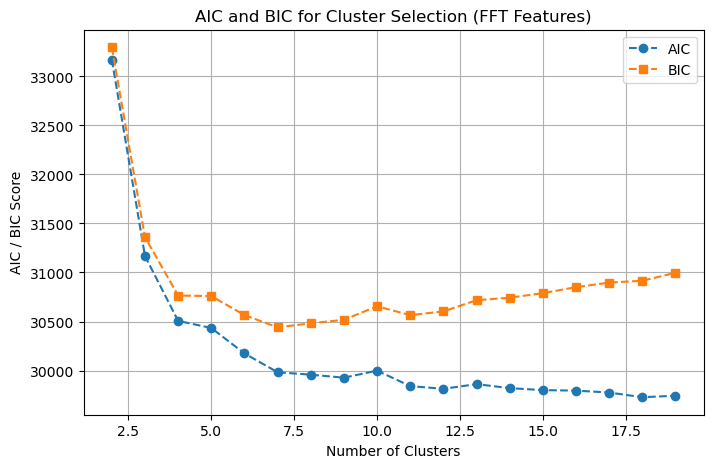

In [ ]:


# Choose the number of components to retain based on previous analysis
num_components_24 = 3  # Adjust this after seeing explained variance plot
fft_selected_24 = fft_features_scaled_24[:, :num_components_24]  # Keep only selected components

# Try different cluster numbers and compute AIC/BIC
aic_values_24, bic_values_24 = [], []
cluster_range = range(2, 20)  # Test between 2 and 10 clusters

for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
    gmm.fit(fft_selected_24)
    
    aic_values_24.append(gmm.aic(fft_selected_24))
    bic_values_24.append(gmm.bic(fft_selected_24))

# Plot AIC and BIC to determine the optimal cluster count
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, aic_values_24, marker='o', label="AIC", linestyle='--')
plt.plot(cluster_range, bic_values_24, marker='s', label="BIC", linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("AIC / BIC Score")
plt.title("AIC and BIC for Cluster Selection (FFT Features)")
plt.legend()
plt.grid()
plt.show()




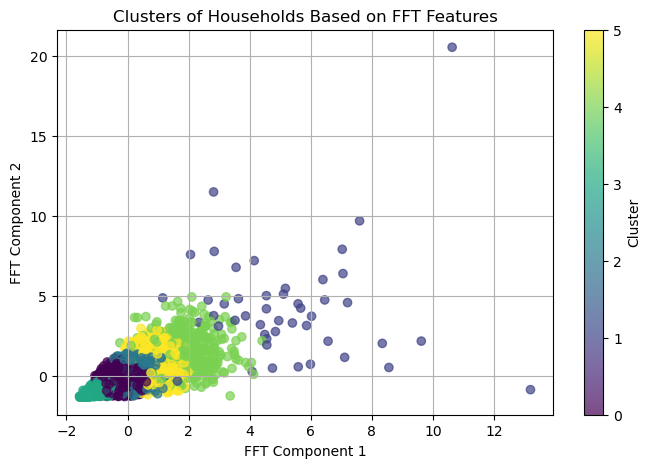

In [ ]:
# Choose the optimal number of clusters based on AIC/BIC results
optimal_clusters_24 = 6  # Adjust based on the previous analysis

# Fit final GMM model
gmm_final_24 = GaussianMixture(n_components=optimal_clusters_24, covariance_type='full', random_state=42)
clusters_24 = gmm_final_24.fit_predict(fft_selected_24)

# Store results in DataFrame
fft_df_24["Cluster"] = clusters_24


plt.figure(figsize=(8, 5))
plt.scatter(fft_df_24["FFT_0"], fft_df_24["FFT_1"], c=clusters_24, cmap='viridis', alpha=0.7)
plt.xlabel("FFT Component 1")
plt.ylabel("FFT Component 2")
plt.title("Clusters of Households Based on FFT Features")
plt.colorbar(label="Cluster")
plt.grid()
plt.show()


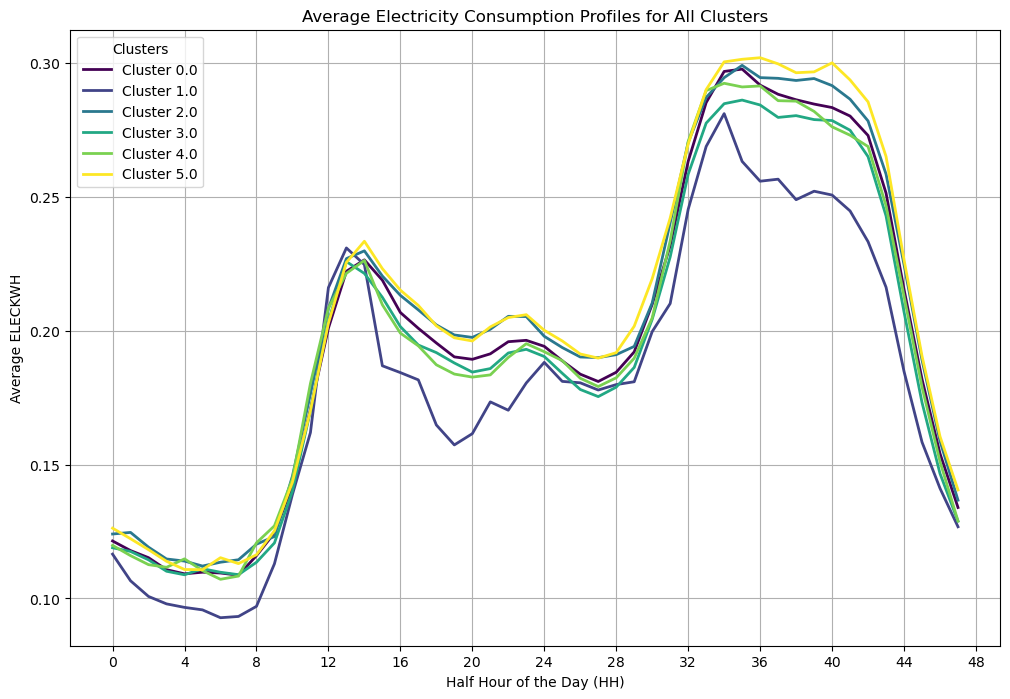

In [ ]:

# Merge clustered data with original consumption data
df_clustered = df24_clean.merge(fft_df_24[['ANON_ID', 'Cluster']], on='ANON_ID', how='left')

# Convert wide format to long format
df_long = df_clustered.melt(id_vars=["ANON_ID", "Cluster"], var_name="HH", value_name="ELECKWH")
df_long["HH"] = df_long["HH"].str.extract(r'(\d+)').astype(int)  # Extract HH as integer

# Compute average ELECKWH per HH for each cluster
cluster_avg_consumption = (
    df_long.groupby(['Cluster', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the cluster average profiles
plt.figure(figsize=(12, 8))

# Generate distinct colors for clusters
num_clusters = df_long["Cluster"].nunique()
colors = plt.cm.viridis(np.linspace(0, 1, num_clusters))

# Plot each cluster
for i, cluster_id in enumerate(cluster_avg_consumption["Cluster"].unique()):
    cluster_data = cluster_avg_consumption[cluster_avg_consumption["Cluster"] == cluster_id]
    plt.plot(
        cluster_data["HH"], cluster_data["ELECKWH"], 
        label=f'Cluster {cluster_id}', color=colors[i], linewidth=2
    )

# Plot details
plt.title('Average Electricity Consumption Profiles for All Clusters')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(0, 49, 4))  # Adjusting x-ticks for readability
plt.legend(title="Clusters")
plt.grid(True)
plt.show()


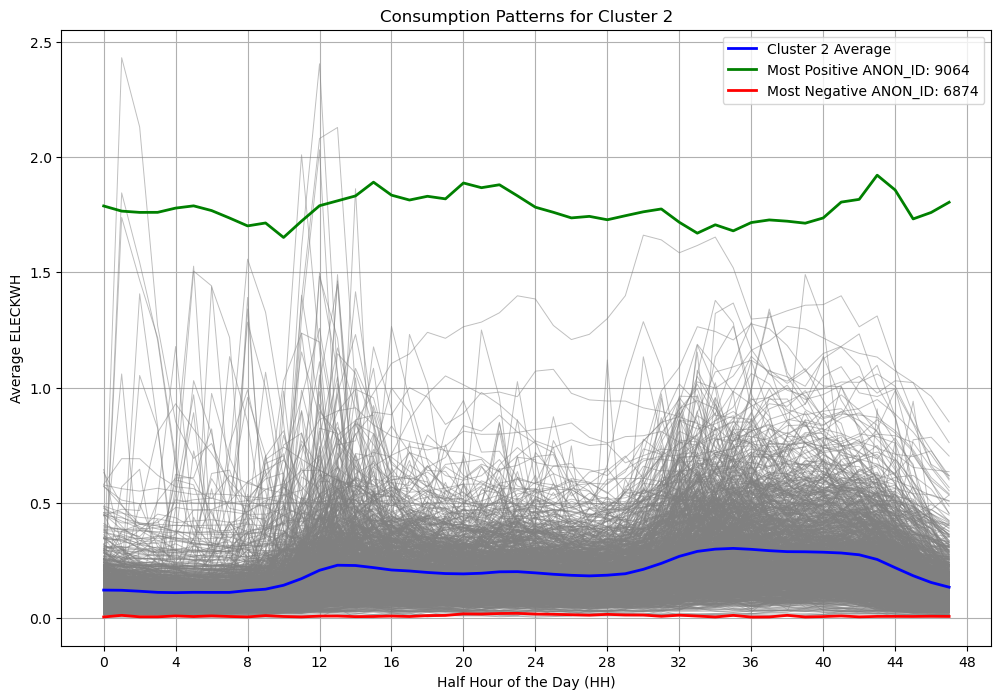

In [ ]:

# Define which cluster to analyze
cluster_number = 2  # Change this value to analyze another cluster

# Filter data for the specified cluster
cluster_data = fft_df_24[fft_df_24['Cluster'] == cluster_number]

# Merge with original consumption data
cluster_consumption = df24_clean[df24_clean["ANON_ID"].isin(cluster_data["ANON_ID"])]

# Reshape data to long format
cluster_long = cluster_consumption.melt(id_vars=["ANON_ID"], var_name="HH", value_name="ELECKWH")
cluster_long["HH"] = cluster_long["HH"].str.extract(r'(\d+)').astype(int)  # Extract HH as integer

# Compute the average ELECKWH per HH for each ANON_ID in the cluster
cluster_avg_by_anon = (
    cluster_long.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Compute the cluster-wide average ELECKWH per HH
cluster_avg = (
    cluster_avg_by_anon.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'Cluster_Avg_ELECKWH'})
)

# Merge back with individual ANON_ID data
cluster_long = cluster_long.merge(cluster_avg, on='HH', how='left')

# Calculate deviation from cluster average
cluster_long['Difference'] = cluster_long['ELECKWH'] - cluster_long['Cluster_Avg_ELECKWH']

# Identify the most extreme households
anon_diff = (
    cluster_long.groupby('ANON_ID')['Difference']
    .mean()
    .reset_index()
    .rename(columns={'Difference': 'Mean_Difference'})
)

# Identify the ANON_IDs with the most positive and most negative deviations
most_positive_anon = anon_diff.loc[anon_diff['Mean_Difference'].idxmax(), 'ANON_ID']
most_negative_anon = anon_diff.loc[anon_diff['Mean_Difference'].idxmin(), 'ANON_ID']

# Extract data for the most extreme households
positive_anon_data = (
    cluster_avg_by_anon[cluster_avg_by_anon['ANON_ID'] == most_positive_anon]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

negative_anon_data = (
    cluster_avg_by_anon[cluster_avg_by_anon['ANON_ID'] == most_negative_anon]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the data
plt.figure(figsize=(12, 8))

# Plot all ANON_IDs in grey
for anon_id in cluster_avg_by_anon['ANON_ID'].unique():
    anon_data = cluster_avg_by_anon[cluster_avg_by_anon['ANON_ID'] == anon_id]
    plt.plot(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.5, linewidth=0.7)

# Plot the cluster average in blue
plt.plot(
    cluster_avg['HH'], cluster_avg['Cluster_Avg_ELECKWH'],
    color='blue', linewidth=2, label=f'Cluster {cluster_number} Average'
)

# Plot the most positive ANON_ID in green
plt.plot(
    positive_anon_data['HH'], positive_anon_data['ELECKWH'],
    color='green', linewidth=2, label=f'Most Positive ANON_ID: {most_positive_anon}'
)

# Plot the most negative ANON_ID in red
plt.plot(
    negative_anon_data['HH'], negative_anon_data['ELECKWH'],
    color='red', linewidth=2, label=f'Most Negative ANON_ID: {most_negative_anon}'
)

# Plot details
plt.title(f'Consumption Patterns for Cluster {cluster_number}')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(0, 49, 4))  # Adjusting x-ticks for better readability
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Prepare a DataFrame to store the features for the cluster and selected ANON_IDs
table_data = {}

# Add cluster-wide average features
table_data['Cluster_Average'] = (
    fft_df_24[fft_df_24['Cluster'] == cluster_number]
    .drop(columns=["ANON_ID", "Cluster"])
    .mean()
    .to_dict()
)

# Add features for the most positive ANON_ID
table_data[most_positive_anon] = (
    fft_df_24[fft_df_24['ANON_ID'] == most_positive_anon]
    .drop(columns=["ANON_ID", "Cluster"])
    .mean()
    .to_dict()
)

# Add features for the most negative ANON_ID
table_data[most_negative_anon] = (
    fft_df_24[fft_df_24['ANON_ID'] == most_negative_anon]
    .drop(columns=["ANON_ID", "Cluster"])
    .mean()
    .to_dict()
)

# Convert the dictionary to a DataFrame
table_df = pd.DataFrame(table_data)

# Transpose the DataFrame for better readability
table_df = table_df.T
table_df.index.name = 'ANON_ID'

# Display the resulting table
print("Feature Comparison Table for Cluster:")
print(table_df)


Feature Comparison Table for Cluster:
                    FFT_0     FFT_1     FFT_2     FFT_3     FFT_4     FFT_5  \
ANON_ID                                                                       
Cluster_Average  0.201435  0.186579  0.321891  0.226680  0.204368  0.209159   
9064            -0.103546  1.208786  0.193886  0.430355 -1.019071 -0.581022   
6874             0.511901  0.875239 -0.569545 -0.012060 -0.918517 -0.079397   

                    FFT_6     FFT_7     FFT_8     FFT_9  ...    FFT_14  \
ANON_ID                                                  ...             
Cluster_Average  0.212501  0.195746  0.208521  0.184015  ...  0.166516   
9064            -0.077515 -0.005038 -0.447670 -0.231827  ... -0.239043   
6874            -0.248134 -0.561742 -0.429064 -0.454261  ...  0.001563   

                   FFT_15    FFT_16    FFT_17    FFT_18    FFT_19    FFT_20  \
ANON_ID                                                                       
Cluster_Average  0.180234  0.178400  

#### Complex Fourier Transform:

In [ ]:
# Define the number of components to keep
components_comp = 5  

# Drop ANON_ID temporarily for FFT
anon_ids_24_comp = df24_clean["ANON_ID"]
data_24_comp = df24_clean.drop(columns=["ANON_ID"]).values  # Keep only electricity consumption columns

# Convert to NumPy array
data_24_comp = np.array(data_24_comp, dtype=np.float64)

# Apply FFT and keep complex values (both real and imaginary parts)
fft_complex_24_comp = fft(data_24_comp, axis=1)[:, :components_comp]  # Keep first 'components' frequencies

# Separate real and imaginary parts
fft_real_24_comp = np.real(fft_complex_24_comp)
fft_imag_24_comp = np.imag(fft_complex_24_comp)

# Combine real and imaginary parts as separate features
fft_combined_24_comp = np.hstack((fft_real_24_comp, fft_imag_24_comp))

# Normalize features
scaler_comp = StandardScaler()
fft_combined_scaled_24_comp = scaler_comp.fit_transform(fft_combined_24_comp)

# Store in DataFrame
columns_real_comp = [f'FFT_Real_{i}' for i in range(components_comp)]
columns_imag_comp = [f'FFT_Imag_{i}' for i in range(components_comp)]
fft_df_24_comp = pd.DataFrame(fft_combined_scaled_24_comp, columns=columns_real_comp + columns_imag_comp)
fft_df_24_comp["ANON_ID"] = anon_ids_24_comp  # Add ANON_ID back

# Display transformed DataFrame
fft_df_24_comp.head()


FFT_Real_0  FFT_Real_1  FFT_Real_2  FFT_Real_3  FFT_Real_4  FFT_Imag_0  \
0    0.477743   -0.018791    0.122006    0.017507    0.788466        -0.0   
1   -0.168211   -0.674672   -0.586592    1.216238    0.153368        -0.0   
2   -1.101476    0.360772    0.442404    0.287086   -0.028650        -0.0   
3   -0.413209    0.953730   -0.980473   -0.527521    1.496261        -0.0   
4    0.153531    0.452242   -1.359335    0.128990    1.511564        -0.0   

   FFT_Imag_1  FFT_Imag_2  FFT_Imag_3  FFT_Imag_4  ANON_ID  
0   -0.257472   -0.472077   -0.236335    0.276296      3.0  
1   -1.008523    0.355717    0.176176   -1.000054      5.0  
2   -0.814496   -0.630594   -0.023767   -0.238874      6.0  
3    0.607098   -0.663321   -1.743070   -0.055547      7.0  
4   -0.226241   -0.065746    0.470869   -0.305705      8.0

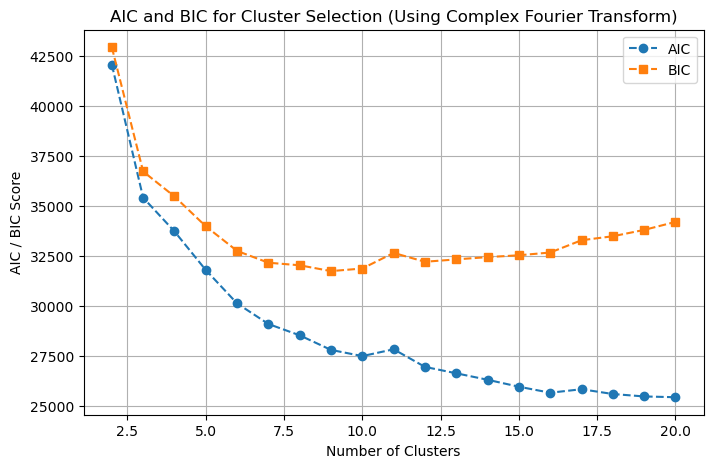

In [ ]:
# Try different cluster numbers and compute AIC/BIC
aic_values_24_comp, bic_values_24_comp = [], []
cluster_range_comp = range(2, 21)  # Test between 2 and 20 clusters

for n_clusters in cluster_range_comp:
    gmm_comp = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
    gmm_comp.fit(fft_combined_scaled_24_comp)
    
    aic_values_24_comp.append(gmm_comp.aic(fft_combined_scaled_24_comp))
    bic_values_24_comp.append(gmm_comp.bic(fft_combined_scaled_24_comp))

# Plot AIC and BIC
plt.figure(figsize=(8, 5))
plt.plot(cluster_range_comp, aic_values_24_comp, marker='o', linestyle='--', label="AIC")
plt.plot(cluster_range_comp, bic_values_24_comp, marker='s', linestyle='--', label="BIC")
plt.xlabel("Number of Clusters")
plt.ylabel("AIC / BIC Score")
plt.title("AIC and BIC for Cluster Selection (Using Complex Fourier Transform)")
plt.legend()
plt.grid(True)
plt.show()



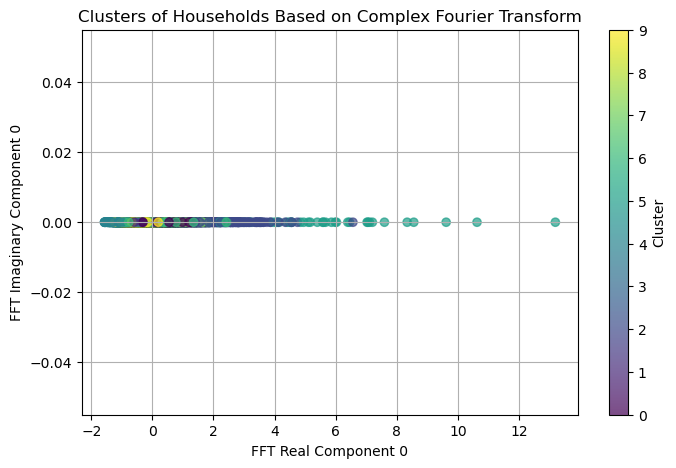

In [ ]:
# Choose the optimal number of clusters from AIC/BIC analysis
optimal_clusters_24_comp = 10  # Adjust based on previous analysis

# Fit final Gaussian Mixture Model
gmm_final_24_comp = GaussianMixture(n_components=optimal_clusters_24_comp, covariance_type='full', random_state=42)
clusters_24_comp = gmm_final_24_comp.fit_predict(fft_combined_scaled_24_comp)

# Store results in DataFrame
fft_df_24_comp["Cluster"] = clusters_24_comp

# Display clustered DataFrame
fft_df_24_comp.head()



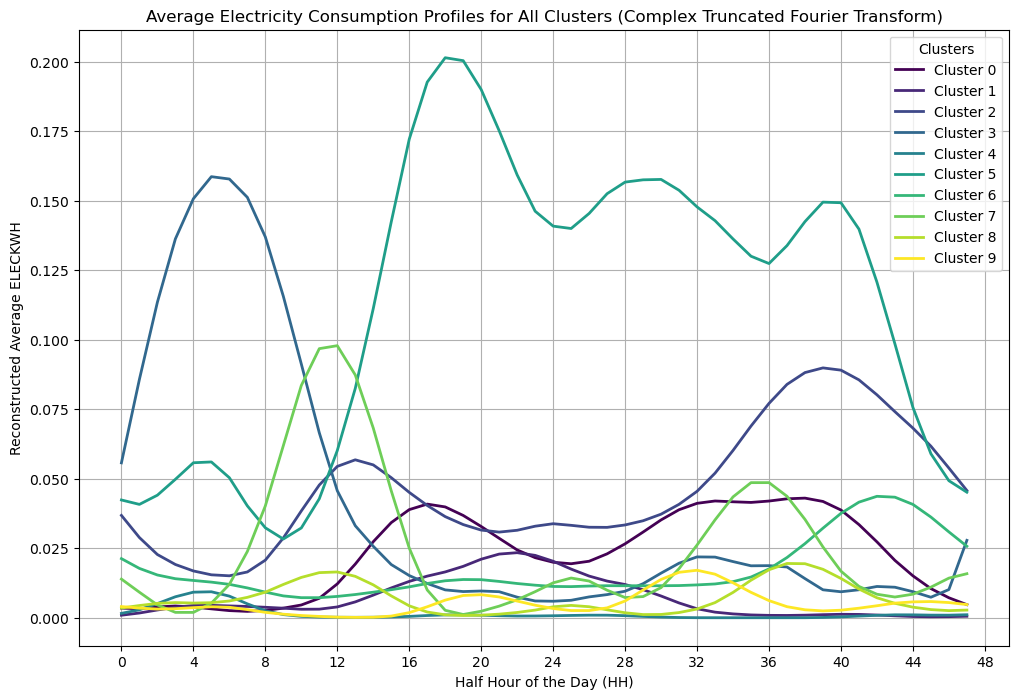

In [ ]:

# Extract the FFT real and imaginary components from fft_df_24_comp
fft_real_24_comp = fft_df_24_comp[columns_real_comp].values
fft_imag_24_comp = fft_df_24_comp[columns_imag_comp].values

# Reconstruct complex FFT coefficients
fft_complex_24_comp = fft_real_24_comp + 1j * fft_imag_24_comp

# Apply Inverse FFT to reconstruct time-domain signals
reconstructed_data_comp = ifft(fft_complex_24_comp, n=48, axis=1).real  # Keep only real part
reconstructed_data_comp = np.clip(reconstructed_data_comp, a_min=0, a_max=None) # BOUNDED BY ZERO


# Convert reconstructed signals into a DataFrame
reconstructed_df_comp = pd.DataFrame(reconstructed_data_comp, columns=[f'HH_{i:02d}' for i in range(48)])
reconstructed_df_comp["ANON_ID"] = fft_df_24_comp["ANON_ID"]
reconstructed_df_comp["Cluster"] = fft_df_24_comp["Cluster"]

# Convert to long format for plotting
df_long_comp = reconstructed_df_comp.melt(id_vars=["ANON_ID", "Cluster"], var_name="HH", value_name="ELECKWH")
df_long_comp["HH"] = df_long_comp["HH"].str.extract(r'(\d+)').astype(int)  # Convert HH to integer

# Compute cluster-wise average consumption
cluster_avg_consumption_comp = (
    df_long_comp.groupby(['Cluster', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Plot average consumption for each cluster
plt.figure(figsize=(12, 8))

# Generate distinct colors for clusters
num_clusters_comp = df_long_comp["Cluster"].nunique()
colors = plt.cm.viridis(np.linspace(0, 1, num_clusters_comp))

# Plot each cluster
for i, cluster_id in enumerate(cluster_avg_consumption_comp["Cluster"].unique()):
    cluster_data = cluster_avg_consumption_comp[cluster_avg_consumption_comp["Cluster"] == cluster_id]
    plt.plot(
        cluster_data["HH"], cluster_data["ELECKWH"], 
        label=f'Cluster {cluster_id}', color=colors[i], linewidth=2
    )

# Plot details
plt.title('Average Electricity Consumption Profiles for All Clusters (Complex Truncated Fourier Transform)')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Reconstructed Average ELECKWH')
plt.xticks(range(0, 49, 4))  # Adjust x-ticks for readability
plt.legend(title="Clusters")
plt.grid(True)
plt.show()


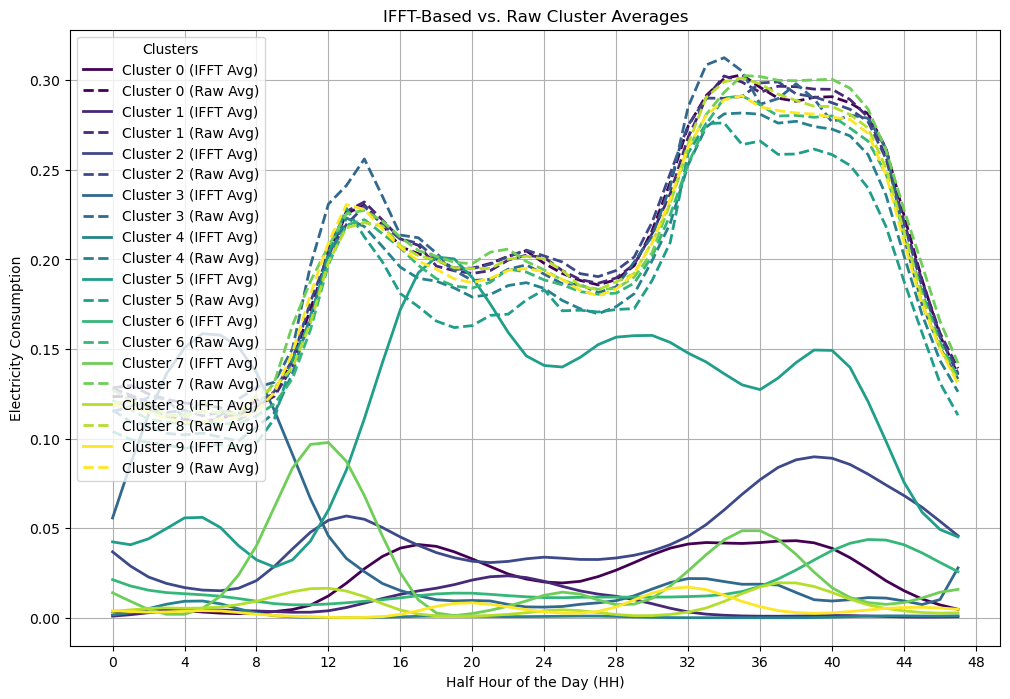

In [ ]:
# Merge your final clusters with the raw data
df_merged_raw = df24_clean.merge(
    fft_df_24_comp[['ANON_ID', 'Cluster']], 
    on='ANON_ID',
    how='left'
)

# Reshape the raw consumption data to long format
df_long_raw = df_merged_raw.melt(id_vars=["ANON_ID", "Cluster"], var_name="HH", value_name="ELECKWH")
df_long_raw["HH"] = df_long_raw["HH"].str.extract(r'(\d+)').astype(int)

# Compute the TRUE average consumption per cluster from the raw data
cluster_avg_raw = (
    df_long_raw.groupby(['Cluster', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'Raw_Cluster_Avg_ELECKWH'})
)


plt.figure(figsize=(12, 8))

num_clusters_comp = df_long_comp["Cluster"].nunique()
colors_comp = plt.cm.viridis(np.linspace(0, 1, num_clusters_comp))

clusters_in_use = cluster_avg_consumption_comp["Cluster"].unique()

for i, cluster_id in enumerate(clusters_in_use):
    # 1. IFFT-based average
    cluster_data_ifft = cluster_avg_consumption_comp[
        cluster_avg_consumption_comp["Cluster"] == cluster_id
    ]
    
    # 2. Raw average
    cluster_data_raw = cluster_avg_raw[cluster_avg_raw["Cluster"] == cluster_id]

    # Plot IFFT-based average
    plt.plot(
        cluster_data_ifft["HH"], cluster_data_ifft["ELECKWH"], 
        label=f'Cluster {cluster_id} (IFFT Avg)', 
        color=colors_comp[i], linewidth=2
    )

    # Plot Raw average with dashed lines, same color
    plt.plot(
        cluster_data_raw["HH"], cluster_data_raw["Raw_Cluster_Avg_ELECKWH"], 
        linestyle='--', color=colors_comp[i], linewidth=2,
        label=f'Cluster {cluster_id} (Raw Avg)'
    )

plt.title("IFFT-Based vs. Raw Cluster Averages")
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Electricity Consumption')
plt.xticks(range(0, 49, 4))  # Adjust x-ticks for readability
plt.legend(title="Clusters")
plt.grid(True)
plt.show()


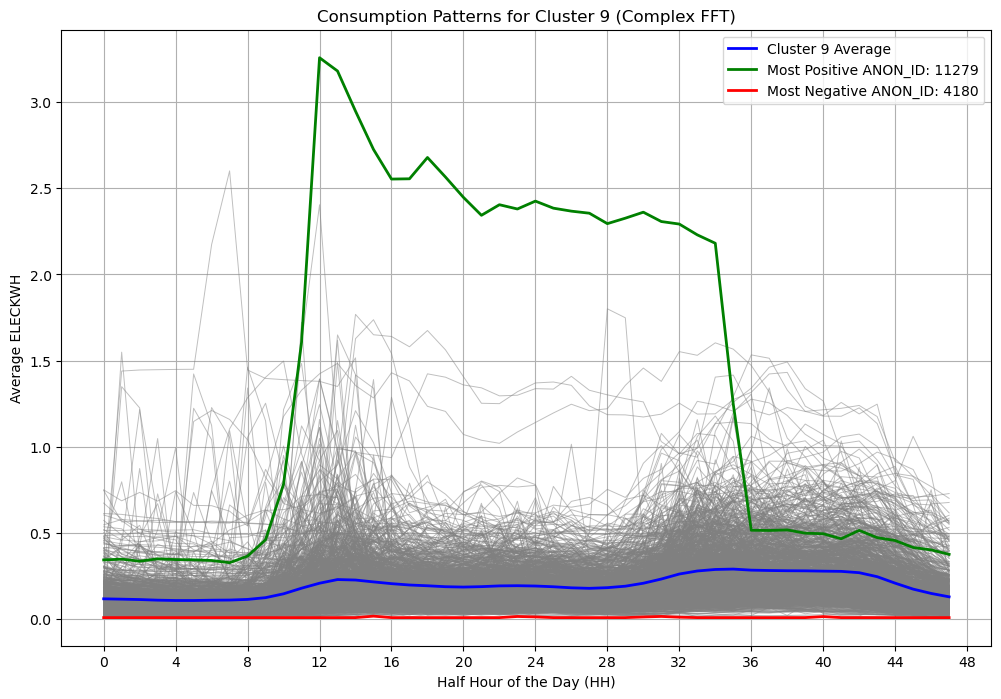

In [ ]:

# Define which cluster to analyze
cluster_number_comp = 9  # Change this value to analyze another cluster

# Filter data for the specified cluster in the COMPLEX FFT DataFrame
cluster_data_comp = fft_df_24_comp[fft_df_24_comp['Cluster'] == cluster_number_comp]

# Merge with original consumption data
cluster_consumption_comp = df24_clean[df24_clean["ANON_ID"].isin(cluster_data_comp["ANON_ID"])]

# Reshape data to long format
cluster_long_comp = cluster_consumption_comp.melt(id_vars=["ANON_ID"], var_name="HH", value_name="ELECKWH")
cluster_long_comp["HH"] = cluster_long_comp["HH"].str.extract(r'(\d+)').astype(int)  # Extract HH as integer

# Compute the average ELECKWH per HH for each ANON_ID in the cluster
cluster_avg_by_anon_comp = (
    cluster_long_comp.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Compute the cluster-wide average ELECKWH per HH
cluster_avg_comp = (
    cluster_avg_by_anon_comp.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'Cluster_Avg_ELECKWH'})
)

# Merge back with individual ANON_ID data
cluster_long_comp = cluster_long_comp.merge(cluster_avg_comp, on='HH', how='left')

# Calculate deviation from cluster average
cluster_long_comp['Difference'] = cluster_long_comp['ELECKWH'] - cluster_long_comp['Cluster_Avg_ELECKWH']

# Identify the most extreme households
anon_diff_comp = (
    cluster_long_comp.groupby('ANON_ID')['Difference']
    .mean()
    .reset_index()
    .rename(columns={'Difference': 'Mean_Difference'})
)

# Identify the ANON_IDs with the most positive and most negative deviations
most_positive_anon_comp = anon_diff_comp.loc[anon_diff_comp['Mean_Difference'].idxmax(), 'ANON_ID']
most_negative_anon_comp = anon_diff_comp.loc[anon_diff_comp['Mean_Difference'].idxmin(), 'ANON_ID']

# Extract data for the most extreme households
positive_anon_data_comp = (
    cluster_avg_by_anon_comp[cluster_avg_by_anon_comp['ANON_ID'] == most_positive_anon_comp]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

negative_anon_data_comp = (
    cluster_avg_by_anon_comp[cluster_avg_by_anon_comp['ANON_ID'] == most_negative_anon_comp]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the data
plt.figure(figsize=(12, 8))

# Plot all ANON_IDs in grey
for anon_id in cluster_avg_by_anon_comp['ANON_ID'].unique():
    anon_data = cluster_avg_by_anon_comp[cluster_avg_by_anon_comp['ANON_ID'] == anon_id]
    plt.plot(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.5, linewidth=0.7)

# Plot the cluster average in blue
plt.plot(
    cluster_avg_comp['HH'], cluster_avg_comp['Cluster_Avg_ELECKWH'],
    color='blue', linewidth=2, label=f'Cluster {cluster_number_comp} Average'
)

# Plot the most positive ANON_ID in green
plt.plot(
    positive_anon_data_comp['HH'], positive_anon_data_comp['ELECKWH'],
    color='green', linewidth=2, label=f'Most Positive ANON_ID: {most_positive_anon_comp}'
)

# Plot the most negative ANON_ID in red
plt.plot(
    negative_anon_data_comp['HH'], negative_anon_data_comp['ELECKWH'],
    color='red', linewidth=2, label=f'Most Negative ANON_ID: {most_negative_anon_comp}'
)

# Plot details
plt.title(f'Consumption Patterns for Cluster {cluster_number_comp} (Complex FFT)')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(0, 49, 4))  # Adjusting x-ticks for better readability
plt.legend()
plt.grid(True)
plt.show()


#### Tuned Truncated Complex Fourier Transform

Final Cluster Summary Table (Raw vs IFFT Features):


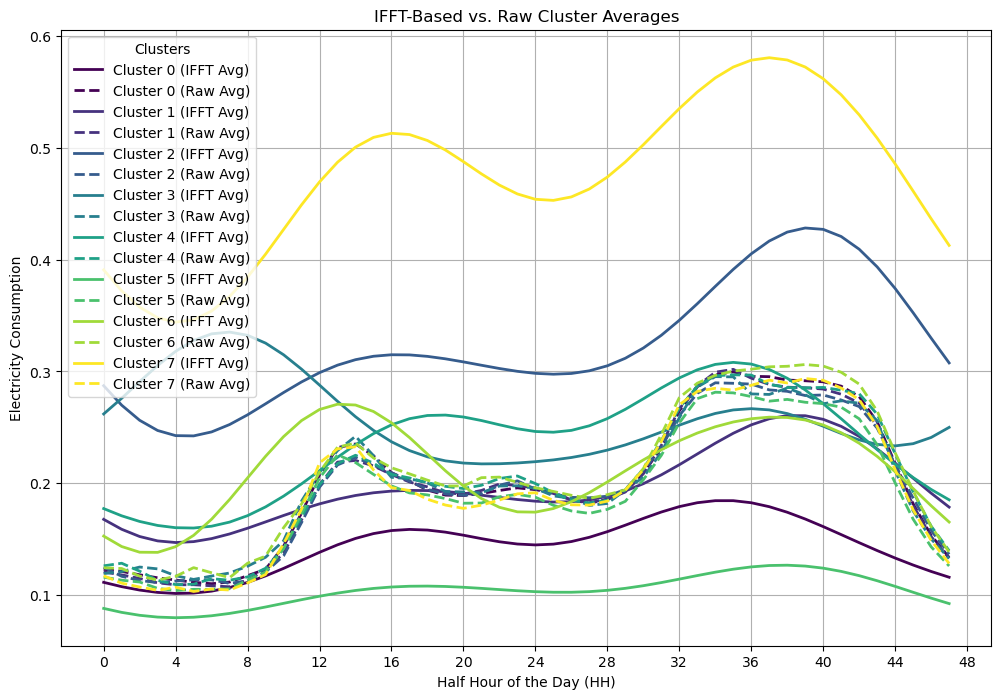

In [18]:
# 1) Define parameters
components_comp_tuned = 4           # Number of FFT components to keep
optimal_clusters_24_comp_tuned = 8  # Number of clusters to use

# 2) Compute daily stats from raw data
daily_avg_comp_tuned = df24_clean.drop(columns=["ANON_ID"]).mean(axis=1).values
daily_std_comp_tuned = df24_clean.drop(columns=["ANON_ID"]).std(axis=1).values
anon_ids_24_comp_tuned = df24_clean["ANON_ID"]
data_24_comp_tuned = df24_clean.drop(columns=["ANON_ID"]).values.astype(np.float64)

# 3) Compute FFT features + daily stats, then scale
# Original complex array
fft_complex_24_comp_tuned = fft(data_24_comp_tuned, axis=1)[:, :components_comp_tuned]
fft_real_24_comp_tuned = np.real(fft_complex_24_comp_tuned)
fft_imag_24_comp_tuned = np.imag(fft_complex_24_comp_tuned)

# Build DataFrame columns
columns_real_comp_tuned = [f'FFT_Real_{i}' for i in range(components_comp_tuned)]
columns_imag_comp_tuned = [f'FFT_Imag_{i}' for i in range(components_comp_tuned)]
columns_daily_stats = ['Daily_Avg', 'Daily_Std']

# Combine everything (initially) for DataFrame creation
combined_features_24_comp_tuned = np.hstack([
    fft_real_24_comp_tuned,
    fft_imag_24_comp_tuned,  # we include it for now in order to assign column names
    daily_avg_comp_tuned.reshape(-1, 1),
    daily_std_comp_tuned.reshape(-1, 1)
])

all_columns_comp_tuned = columns_real_comp_tuned + columns_imag_comp_tuned + columns_daily_stats

# Create DataFrame
fft_df_24_comp_tuned = pd.DataFrame(
    combined_features_24_comp_tuned, 
    columns=all_columns_comp_tuned
)
fft_df_24_comp_tuned["ANON_ID"] = anon_ids_24_comp_tuned

# ------------------------------------------------------------------
# Remove the zero-imag column from the *clustering feature set only*
# ------------------------------------------------------------------
# 1) We drop FFT_Imag_0 from the DataFrame
# 2) But keep it in the arrays for IFFT, or store a separate array for clustering

fft_df_for_clustering = fft_df_24_comp_tuned.drop(columns=["FFT_Imag_0"])

# Scale the remaining columns
scaler_comp_tuned = StandardScaler()
columns_for_clustering = [col for col in fft_df_for_clustering.columns 
                          if col not in ["ANON_ID"]]
combined_features_scaled_24_comp_tuned = scaler_comp_tuned.fit_transform(
    fft_df_for_clustering[columns_for_clustering]
)

# GMM on the scaled set (excluding FFT_Imag_0)
gmm_final_24_comp_tuned = GaussianMixture(n_components=optimal_clusters_24_comp_tuned, random_state=42)
clusters_24_comp_tuned = gmm_final_24_comp_tuned.fit_predict(combined_features_scaled_24_comp_tuned)

# Store the cluster labels back in the main DataFrame
fft_df_24_comp_tuned["Cluster"] = clusters_24_comp_tuned


# 5) Compute cluster-level means (Raw)
cluster_feature_means = (
    fft_df_24_comp_tuned
    .groupby("Cluster")[all_columns_comp_tuned]
    .mean()
    .reset_index()
)
cluster_feature_means["Cluster"] = cluster_feature_means["Cluster"].astype(str) + " Raw Avg"

# 6) IFFT Reconstruct + Merge
fft_real_comp_tuned_arr = fft_df_24_comp_tuned[columns_real_comp_tuned].values
fft_imag_comp_tuned_arr = fft_df_24_comp_tuned[columns_imag_comp_tuned].values
fft_complex_comp_tuned_arr = fft_real_comp_tuned_arr + 1j * fft_imag_comp_tuned_arr

reconstructed_data_comp_tuned = ifft(fft_complex_comp_tuned_arr, n=48, axis=1).real
reconstructed_data_comp_tuned = np.clip(reconstructed_data_comp_tuned, a_min=0, a_max=None)

reconstructed_df_comp_tuned = pd.DataFrame(
    reconstructed_data_comp_tuned, 
    columns=[f'HH_{i:02d}' for i in range(48)]
)
reconstructed_df_comp_tuned["ANON_ID"] = fft_df_24_comp_tuned["ANON_ID"]
reconstructed_df_comp_tuned["Cluster"] = fft_df_24_comp_tuned["Cluster"]

# Merge to keep the same columns used for clustering
fft_df_no_cluster = fft_df_24_comp_tuned.drop(columns="Cluster")
reconstructed_merged = reconstructed_df_comp_tuned.merge(
    fft_df_no_cluster, 
    on="ANON_ID", 
    how="left"
)

# 7) Compute cluster means (IFFT)
# Filter only columns that exist in reconstructed_merged
existing_cols = [c for c in all_columns_comp_tuned if c in reconstructed_merged.columns]

cluster_ifft_means = (
    reconstructed_merged
    .groupby("Cluster")[existing_cols]
    .mean()
    .reset_index()
)
cluster_ifft_means["Cluster"] = cluster_ifft_means["Cluster"].astype(str) + " IFFT Avg"

# 8) Create final summary table, style with a color scale
cluster_summary_table = pd.concat([cluster_feature_means, cluster_ifft_means], axis=0).reset_index(drop=True)
styled_table = cluster_summary_table.style.background_gradient(cmap="Blues")

print("Final Cluster Summary Table (Raw vs IFFT Features):")
display(styled_table)  # If in Jupyter/IPython environment

# ---------------------------------------------------------------------
# 9) Plot IFFT-Based vs. Raw Average Curves for Each Cluster
# ---------------------------------------------------------------------
# Step A: IFFT-based average
df_long_ifft = reconstructed_df_comp_tuned.melt(id_vars=["ANON_ID", "Cluster"], var_name="HH", value_name="ELECKWH")
df_long_ifft["HH"] = df_long_ifft["HH"].str.extract(r'(\d+)').astype(int)
cluster_avg_ifft = (
    df_long_ifft.groupby(["Cluster", "HH"])["ELECKWH"]
    .mean()
    .reset_index()
    .rename(columns={"ELECKWH": "IFFT_Avg_ELECKWH"})
)

# Step B: Raw average
df_merged_raw = df24_clean.merge(fft_df_24_comp_tuned[["ANON_ID", "Cluster"]], on="ANON_ID", how="left")
df_long_raw = df_merged_raw.melt(id_vars=["ANON_ID", "Cluster"], var_name="HH", value_name="ELECKWH")
df_long_raw["HH"] = df_long_raw["HH"].str.extract(r'(\d+)').astype(int)
cluster_avg_raw = (
    df_long_raw.groupby(["Cluster", "HH"])["ELECKWH"]
    .mean()
    .reset_index()
    .rename(columns={"ELECKWH": "Raw_Avg_ELECKWH"})
)

# Step C: Plot
plt.figure(figsize=(12, 8))
cluster_ids = sorted(cluster_avg_ifft["Cluster"].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(cluster_ids)))

for i, cid in enumerate(cluster_ids):
    # IFFT-based
    ifft_data = cluster_avg_ifft[cluster_avg_ifft["Cluster"] == cid]
    # Raw-based
    raw_data = cluster_avg_raw[cluster_avg_raw["Cluster"] == cid]

    plt.plot(
        ifft_data["HH"], ifft_data["IFFT_Avg_ELECKWH"],
        color=colors[i], linewidth=2, label=f'Cluster {cid} (IFFT Avg)'
    )
    plt.plot(
        raw_data["HH"], raw_data["Raw_Avg_ELECKWH"],
        color=colors[i], linestyle='--', linewidth=2, label=f'Cluster {cid} (Raw Avg)'
    )

plt.title("IFFT-Based vs. Raw Cluster Averages")
plt.xlabel("Half Hour of the Day (HH)")
plt.ylabel("Electricity Consumption")
plt.xticks(range(0, 49, 4))
plt.legend(title="Clusters", loc="best")
plt.grid(True)
plt.show()


In [34]:
cluster_feature_means

Cluster  FFT_Real_0  FFT_Real_1  FFT_Real_2  FFT_Real_3  FFT_Imag_0  \
0  0 Raw Avg    9.012898   -1.176591   -1.048469    0.473938         0.0   
1  1 Raw Avg   10.986401   -0.000598   -1.172971   -0.414097         0.0   
2  2 Raw Avg   19.811715    0.123823   -2.304712   -0.603490         0.0   
3  3 Raw Avg   13.509877    2.262895   -1.204474   -1.010882         0.0   
4  4 Raw Avg   15.616436   -1.846002   -1.841956    0.287182         0.0   
5  5 Raw Avg    5.424132   -0.371824   -0.405710   -0.049864         0.0   
6  6 Raw Avg   13.180613   -1.089430   -3.144181    0.510333         0.0   
7  7 Raw Avg   46.024548   -6.639285   -1.540234    0.437103         0.0   

   FFT_Imag_1  FFT_Imag_2  FFT_Imag_3  Daily_Avg  Daily_Std  
0    1.300076    0.478399   -0.152567   0.187769   0.096018  
1    1.890655    1.320621    0.127260   0.228883   0.104431  
2    3.813387    2.879113    0.263952   0.412744   0.195536  
3   -1.843854   -2.687410   -1.148790   0.281456   0.252535  
4    2.940307    1.226315   -0.592740   0.325342   0.158265  
5    0.581614    0.421452    0.035046   0.113003   0.048632  
6    0.421650    1.094647    1.358090   0.274596   0.192352  
7    3.699686    3.429597   -0.784980   0.958845   0.318894

Final Cluster Summary Table (Raw vs IFFT Features):


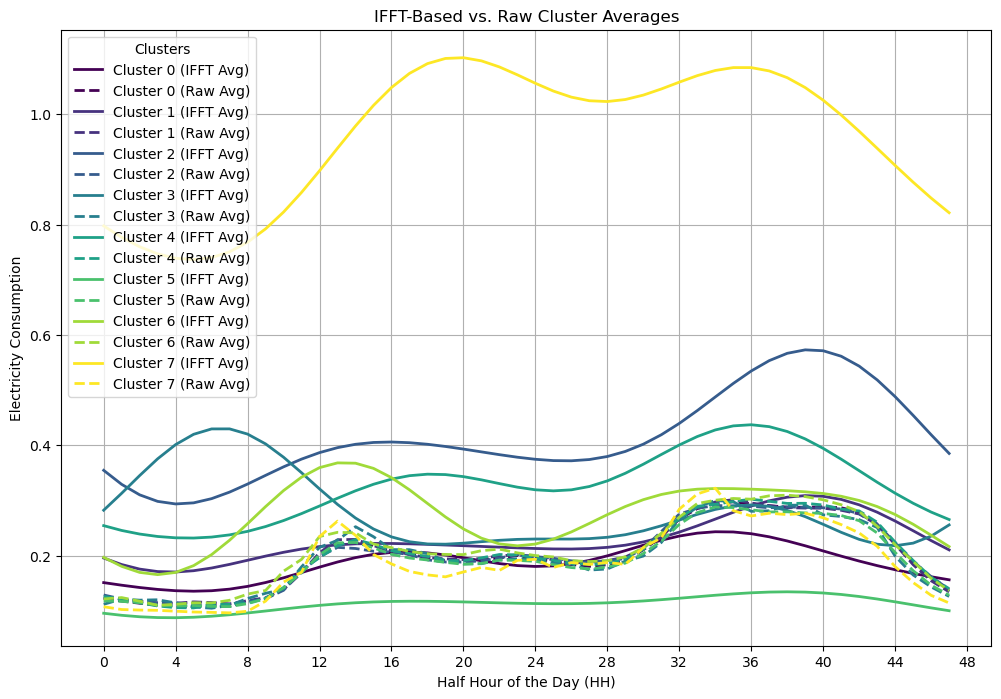

In [20]:
# 1) Define parameters
components_comp_tuned = 4           # Number of FFT components to keep
optimal_clusters_24_comp_tuned = 8  # Number of clusters to use

# 2) Compute daily stats from raw data
daily_avg_comp_tuned = df24_clean.drop(columns=["ANON_ID"]).mean(axis=1).values
daily_std_comp_tuned = df24_clean.drop(columns=["ANON_ID"]).std(axis=1).values
anon_ids_24_comp_tuned = df24_clean["ANON_ID"]
data_24_comp_tuned = df24_clean.drop(columns=["ANON_ID"]).values.astype(np.float64)

# 3) Compute FFT features + daily stats, then scale
# Original complex array
fft_complex_24_comp_tuned = fft(data_24_comp_tuned, axis=1)[:, :components_comp_tuned]
fft_real_24_comp_tuned = np.real(fft_complex_24_comp_tuned)
fft_imag_24_comp_tuned = np.imag(fft_complex_24_comp_tuned)

# Build DataFrame columns
columns_real_comp_tuned = [f'FFT_Real_{i}' for i in range(components_comp_tuned)]
columns_imag_comp_tuned = [f'FFT_Imag_{i}' for i in range(components_comp_tuned)]
columns_daily_stats = ['Daily_Avg', 'Daily_Std']

# Combine everything (initially) for DataFrame creation
combined_features_24_comp_tuned = np.hstack([
    fft_real_24_comp_tuned,
    fft_imag_24_comp_tuned,  # we include it for now in order to assign column names
    daily_avg_comp_tuned.reshape(-1, 1),
    daily_std_comp_tuned.reshape(-1, 1)
])

all_columns_comp_tuned = columns_real_comp_tuned + columns_imag_comp_tuned + columns_daily_stats

# Create DataFrame
fft_df_24_comp_tuned = pd.DataFrame(
    combined_features_24_comp_tuned, 
    columns=all_columns_comp_tuned
)
fft_df_24_comp_tuned["ANON_ID"] = anon_ids_24_comp_tuned

# ------------------------------------------------------------------
# Remove the zero-imag column from the *clustering feature set only*
# ------------------------------------------------------------------
# 1) We drop FFT_Imag_0 from the DataFrame
# 2) But keep it in the arrays for IFFT, or store a separate array for clustering

fft_df_for_clustering = fft_df_24_comp_tuned.drop(columns=["FFT_Imag_0"])

# Scale the remaining columns
scaler_comp_tuned = StandardScaler()
columns_for_clustering = [col for col in fft_df_for_clustering.columns 
                          if col not in ["ANON_ID"]]
combined_features_scaled_24_comp_tuned = scaler_comp_tuned.fit_transform(
    fft_df_for_clustering[columns_for_clustering]
)

# K MEANS CLUSTERING
kmeans_final_24_comp_tuned = KMeans(n_clusters=optimal_clusters_24_comp_tuned, random_state=42)
clusters_24_comp_tuned = kmeans_final_24_comp_tuned.fit_predict(combined_features_scaled_24_comp_tuned)

# Store the cluster labels back in the main DataFrame
fft_df_24_comp_tuned["Cluster"] = clusters_24_comp_tuned



# 5) Compute cluster-level means (Raw)
cluster_feature_means = (
    fft_df_24_comp_tuned
    .groupby("Cluster")[all_columns_comp_tuned]
    .mean()
    .reset_index()
)
cluster_feature_means["Cluster"] = cluster_feature_means["Cluster"].astype(str) + " Raw Avg"

# 6) IFFT Reconstruct + Merge
fft_real_comp_tuned_arr = fft_df_24_comp_tuned[columns_real_comp_tuned].values
fft_imag_comp_tuned_arr = fft_df_24_comp_tuned[columns_imag_comp_tuned].values
fft_complex_comp_tuned_arr = fft_real_comp_tuned_arr + 1j * fft_imag_comp_tuned_arr

reconstructed_data_comp_tuned = ifft(fft_complex_comp_tuned_arr, n=48, axis=1).real
reconstructed_data_comp_tuned = np.clip(reconstructed_data_comp_tuned, a_min=0, a_max=None)

reconstructed_df_comp_tuned = pd.DataFrame(
    reconstructed_data_comp_tuned, 
    columns=[f'HH_{i:02d}' for i in range(48)]
)
reconstructed_df_comp_tuned["ANON_ID"] = fft_df_24_comp_tuned["ANON_ID"]
reconstructed_df_comp_tuned["Cluster"] = fft_df_24_comp_tuned["Cluster"]

# Merge to keep the same columns used for clustering
fft_df_no_cluster = fft_df_24_comp_tuned.drop(columns="Cluster")
reconstructed_merged = reconstructed_df_comp_tuned.merge(
    fft_df_no_cluster, 
    on="ANON_ID", 
    how="left"
)

# 7) Compute cluster means (IFFT)
# Filter only columns that exist in reconstructed_merged
existing_cols = [c for c in all_columns_comp_tuned if c in reconstructed_merged.columns]

cluster_ifft_means = (
    reconstructed_merged
    .groupby("Cluster")[existing_cols]
    .mean()
    .reset_index()
)
cluster_ifft_means["Cluster"] = cluster_ifft_means["Cluster"].astype(str) + " IFFT Avg"

# 8) Create final summary table, style with a color scale
cluster_summary_table = pd.concat([cluster_feature_means, cluster_ifft_means], axis=0).reset_index(drop=True)
styled_table = cluster_summary_table.style.background_gradient(cmap="Blues")

print("Final Cluster Summary Table (Raw vs IFFT Features):")
display(styled_table)  # If in Jupyter/IPython environment

# ---------------------------------------------------------------------
# 9) Plot IFFT-Based vs. Raw Average Curves for Each Cluster
# ---------------------------------------------------------------------
# Step A: IFFT-based average
df_long_ifft = reconstructed_df_comp_tuned.melt(id_vars=["ANON_ID", "Cluster"], var_name="HH", value_name="ELECKWH")
df_long_ifft["HH"] = df_long_ifft["HH"].str.extract(r'(\d+)').astype(int)
cluster_avg_ifft = (
    df_long_ifft.groupby(["Cluster", "HH"])["ELECKWH"]
    .mean()
    .reset_index()
    .rename(columns={"ELECKWH": "IFFT_Avg_ELECKWH"})
)
# df_long_ifft has this columns: ANON_ID Cluster HH ELECKWH

# Step B: Raw average
df_merged_raw = df24_clean.merge(fft_df_24_comp_tuned[["ANON_ID", "Cluster"]], on="ANON_ID", how="left")
df_long_raw = df_merged_raw.melt(id_vars=["ANON_ID", "Cluster"], var_name="HH", value_name="ELECKWH")
df_long_raw["HH"] = df_long_raw["HH"].str.extract(r'(\d+)').astype(int)
cluster_avg_raw = (
    df_long_raw.groupby(["Cluster", "HH"])["ELECKWH"]
    .mean()
    .reset_index()
    .rename(columns={"ELECKWH": "Raw_Avg_ELECKWH"})
)

# Step C: Plot
plt.figure(figsize=(12, 8))
cluster_ids = sorted(cluster_avg_ifft["Cluster"].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(cluster_ids)))

for i, cid in enumerate(cluster_ids):
    # IFFT-based
    ifft_data = cluster_avg_ifft[cluster_avg_ifft["Cluster"] == cid]
    # Raw-based
    raw_data = cluster_avg_raw[cluster_avg_raw["Cluster"] == cid]

    plt.plot(
        ifft_data["HH"], ifft_data["IFFT_Avg_ELECKWH"],
        color=colors[i], linewidth=2, label=f'Cluster {cid} (IFFT Avg)'
    )
    plt.plot(
        raw_data["HH"], raw_data["Raw_Avg_ELECKWH"],
        color=colors[i], linestyle='--', linewidth=2, label=f'Cluster {cid} (Raw Avg)'
    )

plt.title("IFFT-Based vs. Raw Cluster Averages")
plt.xlabel("Half Hour of the Day (HH)")
plt.ylabel("Electricity Consumption")
plt.xticks(range(0, 49, 4))
plt.legend(title="Clusters", loc="best")
plt.grid(True)
plt.show()


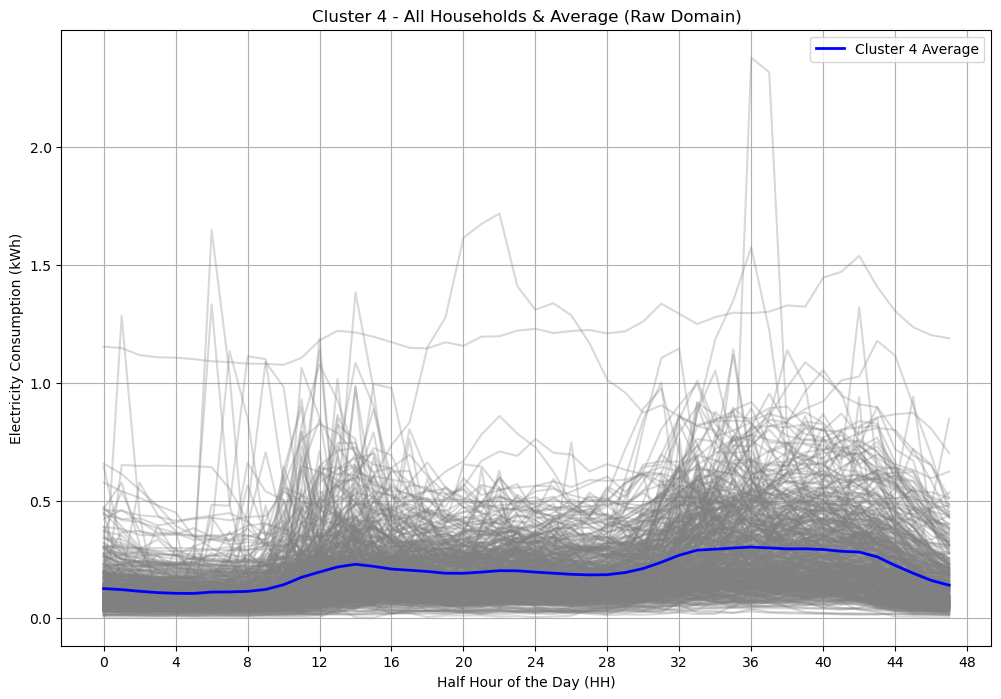


Summary Table - Cluster 4 Daily Stats (Raw Domain):


Daily_Avg_kWh  Daily_Std_kWh
ANON_ID                              
31            0.275731            NaN
34            0.293142            NaN
70            0.345997            NaN
73            0.266197            NaN
80            0.326031            NaN
155           0.334226            NaN
220           0.183426            NaN
227           0.316379            NaN
261           0.236306            NaN
291           0.312937            NaN

In [28]:
# ONE ID PLOT

# -------------------------------
# 1. Pick a cluster to analyze
# -------------------------------
cluster_of_interest = 4  # CHANGE THIS AS NEEDED

# -------------------------------
# 2. Filter Raw Data by Cluster
# -------------------------------
# df_merged_raw is your DataFrame that merges raw consumption with the cluster label
df_merged_raw = df24_clean.merge(
    fft_df_24_comp_tuned[["ANON_ID", "Cluster"]], 
    on="ANON_ID", 
    how="left"
)

# Keep only this cluster
cluster_data_raw = df_merged_raw[df_merged_raw["Cluster"] == cluster_of_interest]

# Convert wide -> long for plotting
df_long_cluster = cluster_data_raw.melt(
    id_vars=["ANON_ID", "Cluster"], 
    var_name="HH", 
    value_name="ELECKWH"
)
df_long_cluster["HH"] = df_long_cluster["HH"].str.extract(r'(\d+)').astype(int)

# -------------------------------
# 3. Plot All Households in Grey
# -------------------------------
plt.figure(figsize=(12, 8))
for anon_id in df_long_cluster["ANON_ID"].unique():
    anon_data = df_long_cluster[df_long_cluster["ANON_ID"] == anon_id]
    plt.plot(anon_data["HH"], anon_data["ELECKWH"], color="grey", alpha=0.3)

# -------------------------------
# 4. Compute & Plot the Average
# -------------------------------
cluster_avg_curve = (
    df_long_cluster.groupby("HH")["ELECKWH"]
    .mean()
    .reset_index()
    .rename(columns={"ELECKWH":"Avg_ELECKWH"})
)

plt.plot(
    cluster_avg_curve["HH"], cluster_avg_curve["Avg_ELECKWH"], 
    color="blue", linewidth=2, label=f"Cluster {cluster_of_interest} Average"
)

plt.title(f"Cluster {cluster_of_interest} - All Households & Average (Raw Domain)")
plt.xlabel("Half Hour of the Day (HH)")
plt.ylabel("Electricity Consumption (kWh)")
plt.xticks(range(0, 49, 4))
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 5. OPTIONAL: Summarize Daily Stats
# -------------------------------
# For instance, daily average & std for each household in this cluster
household_stats = (
    cluster_data_raw.drop(columns=["Cluster"])  # keep columns HH_00..HH_47 + ANON_ID
    .set_index("ANON_ID")
    .mean(axis=1).rename("Daily_Avg_kWh")
    .to_frame()
)
household_stats["Daily_Std_kWh"] = cluster_data_raw.drop(columns=["Cluster","ANON_ID"]).std(axis=1)

print(f"\nSummary Table - Cluster {cluster_of_interest} Daily Stats (Raw Domain):")
display(household_stats.head(10))


## PRINCIPAL COMPONENT ANALYSIS

Final Cluster Summary Table (PCA-space vs. Reconstructed Features):


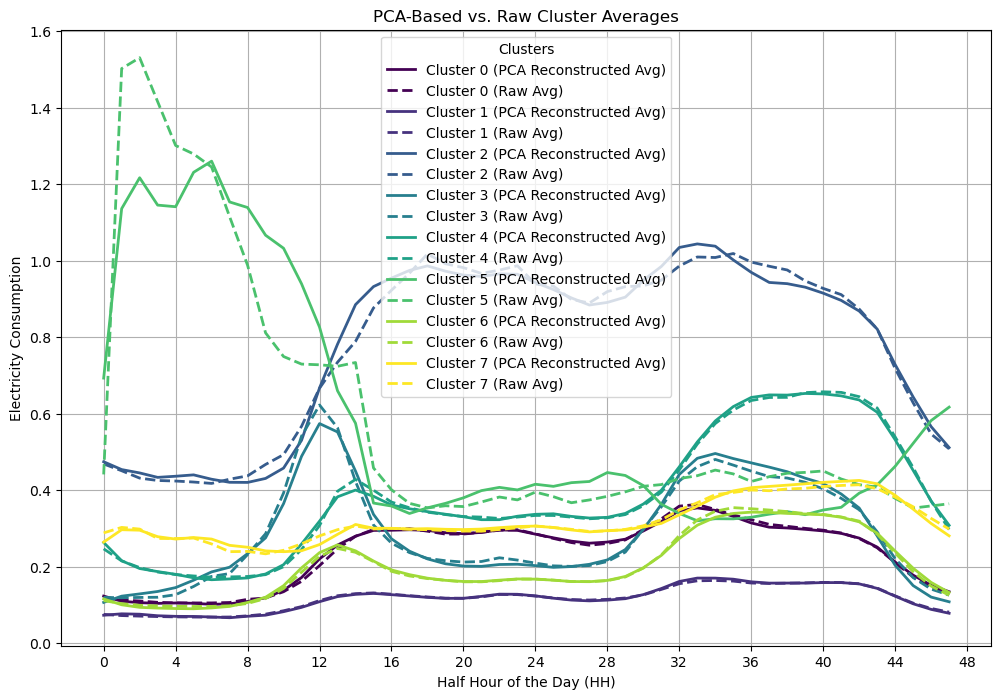

In [87]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# 1) Define parameters
# ------------------------------------------------------------------------------
pca_components = 4                  # Number of PCA components to keep
optimal_clusters = 8                # Number of clusters (KMeans)
data_24 = df24_clean.drop(columns=["ANON_ID"])  # The 48 half-hour columns (or 24 if you have 24 intervals)

# ------------------------------------------------------------------------------
# 2) Compute daily stats (as you did before)
# ------------------------------------------------------------------------------
daily_avg = data_24.mean(axis=1).values  # shape (n_samples,)
daily_std = data_24.std(axis=1).values   # shape (n_samples,)
anon_ids = df24_clean["ANON_ID"].values
data_24_values = data_24.values.astype(np.float64)  # shape (n_samples, 48)

# ------------------------------------------------------------------------------
# 3) Scale the raw half-hour data, then apply PCA
# ------------------------------------------------------------------------------
scaler_raw = StandardScaler()
data_24_scaled = scaler_raw.fit_transform(data_24_values)  # shape (n_samples, 48)

pca = PCA(n_components=pca_components, random_state=42)
pca_scores = pca.fit_transform(data_24_scaled)             # shape (n_samples, pca_components)

# ------------------------------------------------------------------------------
# 4) Combine PCA components + daily stats
# ------------------------------------------------------------------------------
# Turn daily_avg and daily_std into columns so we can horizontally stack them
daily_avg_col = daily_avg.reshape(-1, 1)  # shape (n_samples, 1)
daily_std_col = daily_std.reshape(-1, 1)  # shape (n_samples, 1)

combined_features = np.hstack([
    pca_scores,       # PCA columns
    daily_avg_col, 
    daily_std_col
])  # shape (n_samples, pca_components + 2)

# Optionally scale again (the combined feature set)
scaler_combined = StandardScaler()
combined_features_scaled = scaler_combined.fit_transform(combined_features)

# ------------------------------------------------------------------------------
# 5) K-Means Clustering on the combined features
# ------------------------------------------------------------------------------
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(combined_features_scaled)

# ------------------------------------------------------------------------------
# 6) Build a DataFrame of results and compute cluster means (raw PCA-scores)
# ------------------------------------------------------------------------------
pca_columns = [f'PCA_{i}' for i in range(pca_components)]
stat_columns = ['Daily_Avg', 'Daily_Std']
all_columns = pca_columns + stat_columns

pca_df = pd.DataFrame(
    np.column_stack([pca_scores, daily_avg, daily_std]),
    columns=all_columns
)
pca_df["ANON_ID"] = anon_ids
pca_df["Cluster"] = clusters

# Compute cluster-level means in PCA-space + daily stats
cluster_feature_means = (
    pca_df.groupby("Cluster")[all_columns].mean().reset_index()
)
cluster_feature_means["Cluster"] = cluster_feature_means["Cluster"].astype(str) + " PCA-space Avg"

# ------------------------------------------------------------------------------
# 7) Inverse PCA to approximate the original load curves
# ------------------------------------------------------------------------------
# We'll only reconstruct the half-hour load curves from the PCA part
#  because daily_avg, daily_std were not included in the PCA transform of the raw HH data.
#
# - pca_scores: shape (n_samples, pca_components)
# - pca.inverse_transform(...) will produce shape (n_samples, 48) in the *scaled* domain
# - We'll then invert the scaling (scaler_raw) to get back to original load units.

reconstructed_scaled = pca.inverse_transform(pca_scores)   # shape (n_samples, 48)
reconstructed_data = scaler_raw.inverse_transform(reconstructed_scaled)  
reconstructed_data = np.clip(reconstructed_data, a_min=0, a_max=None)  # ensure non-negative

# Put reconstruction into a DataFrame
reconstructed_df = pd.DataFrame(
    reconstructed_data, 
    columns=[f'HH_{i:02d}' for i in range(data_24.shape[1])]
)
reconstructed_df["ANON_ID"] = anon_ids
reconstructed_df["Cluster"] = clusters

# ------------------------------------------------------------------------------
# 8) Merge for analyzing reconstructed vs. raw in the same pipeline
# ------------------------------------------------------------------------------
# Just like your FFT code, if you need to keep the same columns for grouping or reporting:
pca_df_no_cluster = pca_df.drop(columns="Cluster")
reconstructed_merged = reconstructed_df.merge(
    pca_df_no_cluster, 
    on="ANON_ID", 
    how="left"
)

# 9) Compute cluster-level means (reconstructed)
existing_cols = [c for c in all_columns if c in reconstructed_merged.columns]
cluster_recon_means = (
    reconstructed_merged
    .groupby("Cluster")[existing_cols]
    .mean()
    .reset_index()
)
cluster_recon_means["Cluster"] = cluster_recon_means["Cluster"].astype(str) + " Reconstructed Avg"

# Create final summary table
cluster_summary_table = pd.concat([cluster_feature_means, cluster_recon_means], axis=0).reset_index(drop=True)
styled_table = cluster_summary_table.style.background_gradient(cmap="Blues")

print("Final Cluster Summary Table (PCA-space vs. Reconstructed Features):")
display(styled_table)

# ------------------------------------------------------------------------------
# 10) Plot Reconstructed vs. Raw cluster averages (similar to IFFT vs. Raw in your code)
# ------------------------------------------------------------------------------
# A) Reconstructed-based average
df_long_recon = reconstructed_df.melt(
    id_vars=["ANON_ID", "Cluster"], 
    var_name="HH", 
    value_name="ELECKWH"
)
# only keep numeric part from HH_XX
df_long_recon["HH"] = df_long_recon["HH"].str.extract(r'(\d+)').astype(int)
cluster_avg_recon = (
    df_long_recon.groupby(["Cluster", "HH"])["ELECKWH"]
    .mean()
    .reset_index()
    .rename(columns={"ELECKWH": "Reconstructed_Avg_ELECKWH"})
)

# B) Raw average
df_merged_raw = df24_clean.merge(pca_df[["ANON_ID", "Cluster"]], on="ANON_ID", how="left")
df_long_raw = df_merged_raw.melt(id_vars=["ANON_ID", "Cluster"], var_name="HH", value_name="ELECKWH")
df_long_raw["HH"] = df_long_raw["HH"].str.extract(r'(\d+)').astype(int)
cluster_avg_raw = (
    df_long_raw.groupby(["Cluster", "HH"])["ELECKWH"]
    .mean()
    .reset_index()
    .rename(columns={"ELECKWH": "Raw_Avg_ELECKWH"})
)

# C) Plot
plt.figure(figsize=(12, 8))
cluster_ids = sorted(cluster_avg_recon["Cluster"].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(cluster_ids)))

for i, cid in enumerate(cluster_ids):
    # Reconstructed-based
    recon_data = cluster_avg_recon[cluster_avg_recon["Cluster"] == cid]
    # Raw-based
    raw_data = cluster_avg_raw[cluster_avg_raw["Cluster"] == cid]

    plt.plot(
        recon_data["HH"], recon_data["Reconstructed_Avg_ELECKWH"],
        color=colors[i], linewidth=2, label=f'Cluster {cid} (PCA Reconstructed Avg)'
    )
    plt.plot(
        raw_data["HH"], raw_data["Raw_Avg_ELECKWH"],
        color=colors[i], linestyle='--', linewidth=2, label=f'Cluster {cid} (Raw Avg)'
    )

plt.title("PCA-Based vs. Raw Cluster Averages")
plt.xlabel("Half Hour of the Day (HH)")
plt.ylabel("Electricity Consumption")
plt.xticks(range(0, data_24.shape[1]+1, 4))
plt.legend(title="Clusters", loc="best")
plt.grid(True)
plt.show()


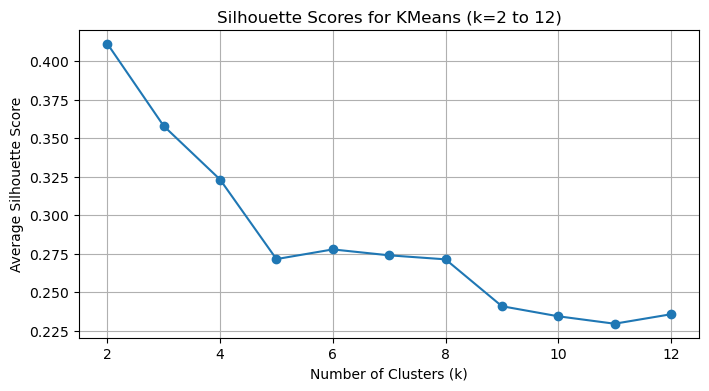

In [89]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Suppose X is your *scaled* feature matrix used for clustering,
# e.g. combined_features_scaled_24_comp_tuned from your PCA or FFT approach.

silhouette_scores = []
clusters_range = range(2, 13)  # 2 to 12

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)

    labels = kmeans.fit_predict(combined_features_scaled)
    # Compute average silhouette score for this k
    sil_score = silhouette_score(combined_features_scaled, labels)
    silhouette_scores.append(sil_score)

# Plot the silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(list(clusters_range), silhouette_scores, marker='o')
plt.title("Silhouette Scores for KMeans (k=2 to 12)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.grid(True)
plt.show()


In [97]:

pca_df['Cluster'].count


False

Most distant ANON_IDs in feature space for cluster 3: 1638.0, 1493.0


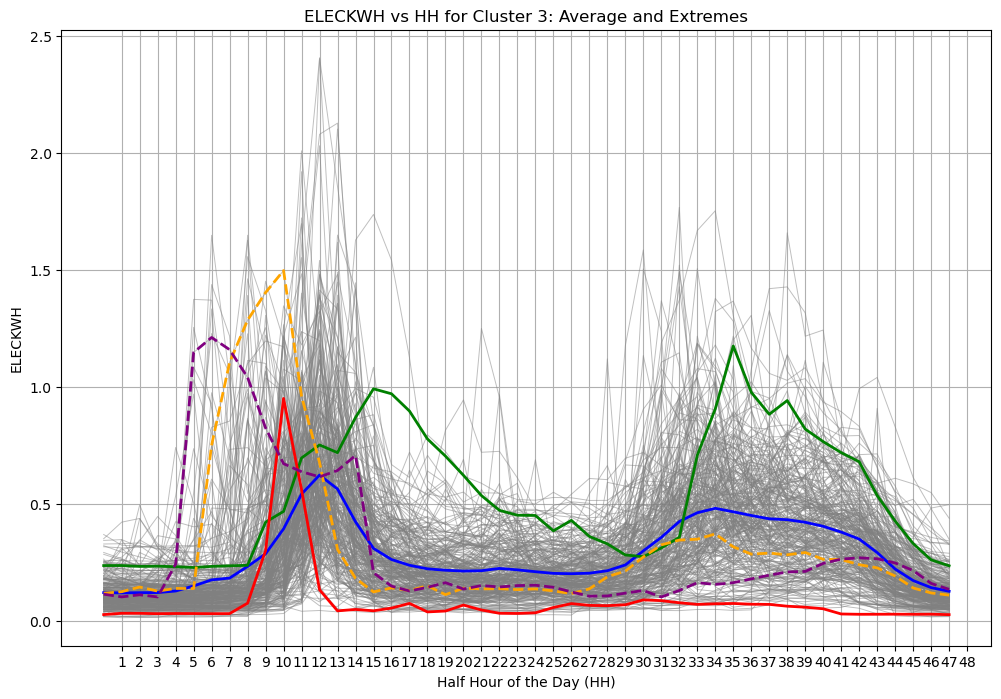

Feature Table for Cluster 3 and Extreme ANON_IDs:


PCA_0      PCA_1     PCA_2     PCA_3  Daily_Avg  \
ID                                                                     
Cluster_Average   3.464296   0.767406 -0.280918  4.021361   0.288779   
3745             14.922006  -2.100966 -0.485087  4.052411   0.541183   
12416            -5.376653   2.581061 -1.474932  3.158961   0.085501   
1638.0            5.116923  12.357844 -3.643328  8.973314   0.327871   
1493.0            4.541904  13.684776 -3.465985  5.158259   0.309686   

                 Daily_Std  
ID                          
Cluster_Average   0.211080  
3745              0.272267  
12416             0.152757  
1638.0            0.348789  
1493.0            0.310913

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# Let's assume you have a final KMeans model trained on X (scaled features),
# and a DataFrame df_all with columns:
#   ANON_ID, HH, ELECKWH, Cluster, and so on
# ---------------------------------------------------------------------------
feature_cols = all_columns
df_features = pca_df
df_long_raw = df_merged_raw.melt(id_vars=["ANON_ID", "Cluster"], var_name="HH", value_name="ELECKWH")
df_long_raw["HH"] = df_long_raw["HH"].str.extract(r'(\d+)').astype(int)
df_all = df_long_raw

target_cluster = 3  # the cluster you want to inspect

# ---------------------------
# A) Filter data for the target cluster
# ---------------------------
cluster_data = df_all[df_all['Cluster'] == target_cluster].copy()

# Group by ANON_ID and HH to get average consumption per half-hour per ID.
cluster_avg_by_anon = (
    cluster_data.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# ---------------------------
# B) Compute the cluster's average load curve
# ---------------------------
cluster_avg = (
    cluster_avg_by_anon
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'Cluster_Avg_ELECKWH'})
)

# Merge the cluster average back with the individual ANON_ID data
cluster_data_merged = cluster_data.merge(cluster_avg, on='HH', how='left')

# ---------------------------
# C) Identify extremes based on difference from cluster average
# ---------------------------
# "Difference" = ELECKWH - Cluster_Avg_ELECKWH for each half hour
cluster_data_merged['Difference'] = cluster_data_merged['ELECKWH'] - cluster_data_merged['Cluster_Avg_ELECKWH']

# Calculate the mean difference PER ANON_ID
anon_diff = (
    cluster_data_merged.groupby('ANON_ID')['Difference']
    .mean()
    .reset_index()
    .rename(columns={'Difference': 'Mean_Difference'})
)

most_positive_anon = anon_diff.loc[anon_diff['Mean_Difference'].idxmax(), 'ANON_ID']
most_negative_anon = anon_diff.loc[anon_diff['Mean_Difference'].idxmin(), 'ANON_ID']

# ---------------------------
# D) Identify extremes based on distance to cluster centroid in feature space
# ---------------------------
# 1) We need the cluster centroid in scaled space.
#    We'll retrieve the scaled centroid from the trained KMeans model:
centroids_scaled = kmeans.cluster_centers_  # shape (n_clusters, n_features)
target_centroid_scaled = centroids_scaled[target_cluster]  # shape (n_features,)

# 2) For each ANON_ID in this cluster, compute the distance from that centroid in scaled space.
#    That means we need the scaled features for each ANON_ID. 
#    Suppose you have a DataFrame "df_features" with columns: [ANON_ID] + feature columns + [Cluster]

#    and "X" is the scaled matrix. We'll do a merge or map.
df_cluster_features = df_features[df_features['Cluster'] == target_cluster].copy()

# Let's extract only the feature columns that match X's structure. 

# (Assume "feature_cols" is the list of columns used for KMeans.)
feature_array = df_cluster_features[feature_cols].values  # shape (samples_in_cluster, n_features)

# Distances in scaled space (Euclidean)
distances = np.linalg.norm(feature_array - target_centroid_scaled, axis=1)

df_cluster_features['Dist_Centroid'] = distances

# Let's pick the two ANON_IDs with largest distances:
idx_sort = df_cluster_features['Dist_Centroid'].argsort()[::-1]  # sort descending
furthest_1 = df_cluster_features.iloc[idx_sort.iloc[0]]['ANON_ID']
furthest_2 = df_cluster_features.iloc[idx_sort.iloc[1]]['ANON_ID']

print(f"Most distant ANON_IDs in feature space for cluster {target_cluster}: {furthest_1}, {furthest_2}")

# ---------------------------
# E) Plot all time-series + extremes
# ---------------------------
plt.figure(figsize=(12, 8))

# Plot all time-series in grey
for anon_id in cluster_avg_by_anon['ANON_ID'].unique():
    anon_data = cluster_avg_by_anon[cluster_avg_by_anon['ANON_ID'] == anon_id]
    plt.plot(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.5, linewidth=0.7)

# Plot the cluster average in blue
plt.plot(
    cluster_avg['HH'], cluster_avg['Cluster_Avg_ELECKWH'],
    color='blue', linewidth=2, label=f'Cluster {target_cluster} Average'
)

# Plot extremes based on difference from cluster average
positive_anon_data = cluster_avg_by_anon[cluster_avg_by_anon['ANON_ID'] == most_positive_anon]
negative_anon_data = cluster_avg_by_anon[cluster_avg_by_anon['ANON_ID'] == most_negative_anon]

plt.plot(
    positive_anon_data['HH'], positive_anon_data['ELECKWH'],
    color='green', linewidth=2, label=f'Most Positive vs Avg: {most_positive_anon}'
)
plt.plot(
    negative_anon_data['HH'], negative_anon_data['ELECKWH'],
    color='red', linewidth=2, label=f'Most Negative vs Avg: {most_negative_anon}'
)

# Plot extremes based on centroid distance
# (just to visually see them - choose another color scheme)
furthest_anon_1_data = cluster_avg_by_anon[cluster_avg_by_anon['ANON_ID'] == furthest_1]
furthest_anon_2_data = cluster_avg_by_anon[cluster_avg_by_anon['ANON_ID'] == furthest_2]

plt.plot(
    furthest_anon_1_data['HH'], furthest_anon_1_data['ELECKWH'],
    color='orange', linestyle='--', linewidth=2, 
    label=f'Furthest in Feature Space: {furthest_1}'
)
plt.plot(
    furthest_anon_2_data['HH'], furthest_anon_2_data['ELECKWH'],
    color='purple', linestyle='--', linewidth=2, 
    label=f'Furthest in Feature Space: {furthest_2}'
)

# Plot details
plt.title(f'ELECKWH vs HH for Cluster {target_cluster}: Average and Extremes')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('ELECKWH')
plt.xticks(range(1, 49))  # or range(0,48) depending on your HH labels
plt.legend
plt.grid(True)
plt.show()

# ---------------------------
# F) Create a small feature table
# ---------------------------
# We want to compare:
#   - the cluster average (in feature space),
#   - the "most positive" ANON_ID,
#   - the "most negative" ANON_ID,
#   - the "furthest_1" and "furthest_2" from centroid
#
# For the cluster average in feature space, we can take the mean of feature columns
# specifically for target_cluster. For the 4 unique ANON_IDs, we do the same.

unique_ids = [most_positive_anon, most_negative_anon, furthest_1, furthest_2]
# some might coincide if the same ID is "most positive" and also "furthest from centroid"
# A small helper function that returns the row of mean features for the entire cluster
def get_cluster_mean_features(cluster_id):
    subset = df_features[df_features['Cluster'] == cluster_id]
    return subset[feature_cols].mean()

cluster_avg_features = get_cluster_mean_features(target_cluster)

# For each of the extreme IDs, compute mean of the features (or you might do just the single row if they have 1 row)
extreme_features = {}
for a_id in unique_ids:
    subset_id = df_features[df_features['ANON_ID'] == a_id]
    if len(subset_id) == 0:
        continue
    ext_mean = subset_id[feature_cols].mean()
    extreme_features[a_id] = ext_mean

# Build a combined DataFrame
table_data = {}
table_data['Cluster_Average'] = cluster_avg_features.to_dict()

for a_id, vals in extreme_features.items():
    table_data[a_id] = vals.to_dict()

table_df = pd.DataFrame(table_data).T
table_df.index.name = 'ID'
print(f"Feature Table for Cluster {target_cluster} and Extreme ANON_IDs:")
display(table_df)



Total variations: 15
Varying PCA_0: [-20.         -17.14285714 -14.28571429 -11.42857143  -8.57142857
  -5.71428571  -2.85714286   0.           2.85714286   5.71428571
   8.57142857  11.42857143  14.28571429  17.14285714  20.        ]
Variation 1: PCA_0 = -20.00
Variation 2: PCA_0 = -17.14
Variation 3: PCA_0 = -14.29
Variation 4: PCA_0 = -11.43
Variation 5: PCA_0 = -8.57
Variation 6: PCA_0 = -5.71
Variation 7: PCA_0 = -2.86
Variation 8: PCA_0 = 0.00
Variation 9: PCA_0 = 2.86
Variation 10: PCA_0 = 5.71
Variation 11: PCA_0 = 8.57
Variation 12: PCA_0 = 11.43
Variation 13: PCA_0 = 14.29
Variation 14: PCA_0 = 17.14
Variation 15: PCA_0 = 20.00


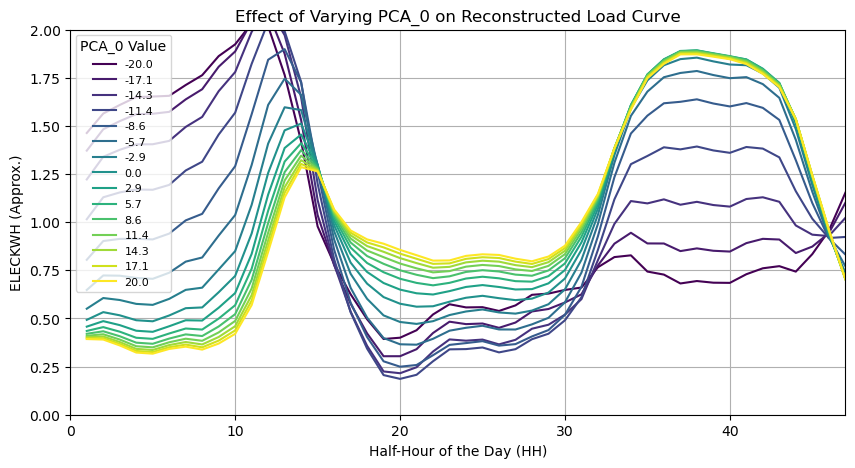

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Import colormap utilities

def pca_effect_plot(pca, scaler, base_pc_values, feature_index, 
                    variation_range=np.linspace(-2.0, 2.0, 15), 
                    daily_avg=None, daily_std=None, colormap="viridis"):
    """
    Shows how altering one PCA component affects the reconstructed time series with gradient colors.

    Parameters:
    - pca: Trained PCA object
    - scaler: Trained StandardScaler (should be fit on 48 half-hour features)
    - base_pc_values: List or np.array of base PCA scores (length = n_components)
    - feature_index: Index of the PCA feature to vary (0-based)
    - variation_range: Sequence of values to test for the selected feature
    - daily_avg: Optional, set a fixed daily average
    - daily_std: Optional, set a fixed daily std deviation
    - colormap: Matplotlib colormap name (e.g., 'coolwarm', 'viridis', 'plasma', 'inferno')
    """
    
    # Ensure input is a NumPy array
    base_pc_values = np.array(base_pc_values, dtype=np.float64)

    # Use the correct Matplotlib colormap API (for Matplotlib 3.7+)
    cmap = plt.colormaps[colormap]
    colors = cmap(np.linspace(0, 1, len(variation_range)))  # Generate gradient colors

    # Prepare the figure
    plt.figure(figsize=(10, 5))

    # Debug: Ensure variation_range has correct number of steps
    print(f"Total variations: {len(variation_range)}")
    print(f"Varying PCA_{feature_index}: {variation_range}")

    # Loop over the different variations of the selected feature
    for i, var in enumerate(variation_range):
        # Create a copy of base PCA values
        mod_pc_values = base_pc_values.copy()
        mod_pc_values[feature_index] = var  # Modify only the selected feature

        # Debug: Print variation being applied
        print(f"Variation {i+1}: PCA_{feature_index} = {var:.2f}")

        # Reconstruct the time-series using the modified PCA values
        pc_values = mod_pc_values.tolist()  # Convert back to list
        reconstructed_scaled = pca.inverse_transform([pc_values])

        # Debug: Check reconstructed shape
        if reconstructed_scaled.shape[1] != 48:
            raise ValueError(f"Reconstructed data should have 48 features, got {reconstructed_scaled.shape}")

        reconstructed_original = scaler.inverse_transform(reconstructed_scaled).flatten()

        # Optionally, adjust daily avg and std
        if daily_avg is not None and daily_std is not None:
            current_mean = reconstructed_original.mean()
            current_std = reconstructed_original.std() if reconstructed_original.std() != 0 else 1e-9
            adjusted_curve = (reconstructed_original - current_mean) / current_std
            adjusted_curve = adjusted_curve * daily_std + daily_avg
        else:
            adjusted_curve = reconstructed_original  # No adjustment
        
        # Plot the adjusted curve with gradient color
        plt.plot(range(1, len(adjusted_curve) + 1), adjusted_curve, label=f"{var:.1f}", color=colors[i])

    # Plot settings
    plt.title(f"Effect of Varying PCA_{feature_index} on Reconstructed Load Curve")
    plt.xlabel("Half-Hour of the Day (HH)")
    plt.ylabel("ELECKWH (Approx.)")
    plt.legend(title=f"PCA_{feature_index} Value", loc="best", fontsize=8)
    plt.grid(True)
    plt.ylim(0,2)
    plt.xlim(0,47)
    plt.show()

# Example Usage
pc_values_example = [1, 1, 1, 1]  # Example PCA scores

pca_effect_plot(pca, scaler_raw, pc_values_example, feature_index=0, 
                variation_range=np.linspace(-20, 20, 15),  # Use linspace for clear increments
                daily_avg=1, daily_std=0.5, colormap="viridis")


Specific cluster plot, with ANON_IDs in the back, highlighting the furthest in the positive and negative scales.

In [ ]:
# 1) Merge raw data with cluster labels (already done in your code):
df_merged_raw = df24_clean.merge(
    fft_df_24_comp_tuned[['ANON_ID', 'Cluster']], 
    on='ANON_ID',
    how='left'
)

# 2) Compute intra-cluster distance in raw space
cluster_distances_comp_tuned, overall_dist_comp_tuned = compute_intra_cluster_distances_comp_tuned(
    df_merged_raw=df_merged_raw,
    distance_metric='euclidean'  # or 'cityblock', 'cosine', etc.
)

# 3) Inspect the results
print("Intra-Cluster Distances (Raw Space):")
for c_id, dist in cluster_distances_comp_tuned.items():
    print(f"  Cluster {c_id}: {dist:.4f}")

print(f"\nOverall Average Distance: {overall_dist_comp_tuned:.4f}")


Intra-Cluster Distances (Raw Space):
  Cluster 1.0: 0.8483
  Cluster 6.0: 0.9295
  Cluster 5.0: 0.8544
  Cluster 2.0: 0.8603
  Cluster 4.0: 0.9154
  Cluster 0.0: 0.8758
  Cluster 7.0: 0.8355
  Cluster 3.0: 0.9103

Overall Average Distance: 0.8712


##### Intra cluster Measure

In [ ]:
def compute_intra_cluster_distances_comp_tuned(df_merged_raw, distance_metric='euclidean'):
    """
    Computes the average distance from each household to its cluster centroid 
    in the raw consumption space (HH_00...HH_47).

    Parameters
    ----------
    df_merged_raw : pd.DataFrame
        A DataFrame that must include:
          - 'Cluster' column with cluster labels
          - 'HH_00', 'HH_01', ... 'HH_47' columns for raw consumption
    distance_metric : str
        A distance metric valid for sklearn.metrics.pairwise_distances 
        (e.g., 'euclidean', 'cityblock', 'cosine', etc.)

    Returns
    -------
    cluster_distances : dict
        Mapping {cluster_id -> average distance} in the raw space
    overall_distance : float
        The average distance across all clusters
    """

    # Identify columns corresponding to raw consumption
    hh_cols = [col for col in df_merged_raw.columns if col.startswith("HH_")]

    # Prepare a dictionary to store average distance per cluster
    cluster_distances = {}
    sum_dist = 0.0
    total_points = 0

    # Get unique cluster IDs (excluding NaN if any)
    cluster_ids = df_merged_raw['Cluster'].dropna().unique()

    for clust_id in cluster_ids:
        # Filter the DataFrame for the current cluster
        cluster_data = df_merged_raw[df_merged_raw["Cluster"] == clust_id]

        # Extract just the raw consumption values into a NumPy array
        raw_matrix = cluster_data[hh_cols].values  # shape: (num_households_in_cluster, 48)

        if raw_matrix.shape[0] == 0:
            # No rows in this cluster (unlikely, but safe-guard)
            cluster_distances[clust_id] = np.nan
            continue

        # Compute centroid in the raw space (shape: (1, 48))
        centroid = np.mean(raw_matrix, axis=0, keepdims=True)

        # Compute distances from each row to the cluster centroid
        dist_matrix = pairwise_distances(raw_matrix, centroid, metric=distance_metric)  # shape: (n, 1)
        avg_dist = np.mean(dist_matrix)

        cluster_distances[clust_id] = avg_dist
        sum_dist += np.sum(dist_matrix)
        total_points += raw_matrix.shape[0]

    # Compute overall average distance across all clusters
    overall_distance = sum_dist / total_points if total_points > 0 else np.nan

    return cluster_distances, overall_distance


## Data Preprocessing

Preprocessing Steps:
- Just 2009 data
- Electric fuel type households
- Cut holiday outlier times (Dec 23 - Jan 2)
- Cut ANON_IDs without full readings at every HH interval
- Cut ANON_IDs with less than .1 kWH average consumption


Filtering to year 2009 and ANON_IDs that have 'ElecOnly' from the metafile. Only run once to get file(s) saved to your computer.



In [ ]:
# get ADVANCEDATETIME in datetime format
raw_data = df_filtered
raw_data['ADVANCEDATETIME'] = pd.to_datetime(raw_data['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S')
raw_data['Year'] = raw_data['ADVANCEDATETIME'].dt.year
raw_data['Day_Class'] = raw_data['ADVANCEDATETIME'].dt.weekday.apply(get_day_class)
raw_data['Month_Class'] = raw_data['ADVANCEDATETIME'].dt.month.apply(get_month_class)


In [ ]:
# just want 2009 data for now
raw_2009 = raw_data[raw_data['Year'] == 2009]

In [ ]:
# geographic metadata path 
geo_path = fin_wd + r"csv/edrp_geography_data.xlsx"
df_geo = pd.read_excel(geo_path)

# get anonIDs with 'ElecOnly' fuel types
elec_only_ids = set(df_geo[df_geo['fuelTypes'] == 'ElecOnly']['anonID'])
raw_2009 = raw_2009[raw_2009['ANON_ID'].isin(elec_only_ids)]

In [ ]:
# write csv for 2009 data
output_path = fin_wd + r"csv/7591elec_2009.csv"
raw_2009.to_csv(output_path, index=False)

print(f"2009 electricity data has been saved to: {output_path}")

Reading in 2009 electric-only CSV

In [ ]:
# raw data path
path = fin_wd + r"csv/7591elec_2009.csv"
# read csv as dask df
edrp = dd.read_csv(path)
print(edrp.head())

Mode Day & Month Classes

In [ ]:
raw_data['Day_Class'].mode()
raw_data['Month_Class'].mode()


0    4
Name: Month_Class, dtype: int64

In [ ]:
edrp = raw_data[raw_data['Month_Class'] == 4]
edrp = edrp[edrp['Day_Class'] == 2]

#### ANON_IDs Distribution / EDA

Plotting meter reading frequency by ANON_ID

In [ ]:
# Count the frequency of ANON_IDs
anon_id_counts = edrp['ANON_ID'].value_counts()

# Plot the histogram
plt.figure(figsize=(12, 8))
plt.hist(anon_id_counts, bins=40, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Record Frequency per ANON_ID', fontsize=16)
plt.xlabel('Number of Records', fontsize=14)
plt.ylabel('Frequency of ANON_IDs', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


Cutting the IDs with low meter reading counts

In [ ]:
# cutting anon_ids below 12000 total readings 
anon_id_counts = edrp['ANON_ID'].value_counts()
valid_anon_ids = anon_id_counts[anon_id_counts >= 3800].index
edrp = edrp.reset_index(drop=True)

# excluding holiday outlier times
edrp['ADVANCEDATETIME'] = dd.to_datetime(edrp['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S', errors='coerce')
edrp['Month'] = edrp['ADVANCEDATETIME'].dt.month
edrp['Day'] = edrp['ADVANCEDATETIME'].dt.day

condition = ~(
    ((edrp['Month'] == 12) & (edrp['Day'] >= 23)) |  # 23 Dec to 31 Dec
    ((edrp['Month'] == 1) & (edrp['Day'] <= 2))     # 1 Jan to 2 Jan
)
edrp = edrp[condition]

In [ ]:
print(edrp.head())

   ANON_ID ADVANCEDATETIME  HH  ELECKWH  Day_Class  Month_Class  Year  Month  \
0     2867      2008-06-03   0     0.36          2            4  2008      6   
1    14498      2008-06-03   0     0.08          2            4  2008      6   
2     1261      2008-06-03   0     0.16          2            4  2008      6   
3     4311      2008-06-03   0     0.17          2            4  2008      6   
4    11012      2008-06-03   0     0.17          2            4  2008      6   

   Day  
0    3  
1    3  
2    3  
3    3  
4    3  


Incorporating seasons, ensuring numerical values where needed, and cutting households without readings at every half-hour interval.

In [ ]:
# dropping now-unnecessary columns
edrp = edrp.drop(columns=['Month', 'Year'])


# ensuring all numeric entries in columns that should have them
columns_to_check = ['ANON_ID', 'HH', 'ELECKWH']
for col in columns_to_check:
    edrp[col] = pd.to_numeric(edrp[col], errors='coerce')
edrp = edrp.dropna(subset=columns_to_check)
edrp = edrp.reset_index(drop=True)



In [ ]:
# keeping ANON_IDs with entries for all HH values
unique_hh_per_anon = edrp.groupby('ANON_ID')['HH'].nunique()
valid_anon_ids = unique_hh_per_anon[unique_hh_per_anon == edrp['HH'].nunique()].index
edrp = edrp[edrp['ANON_ID'].isin(valid_anon_ids)]


Visualizing average daily consumption across the board

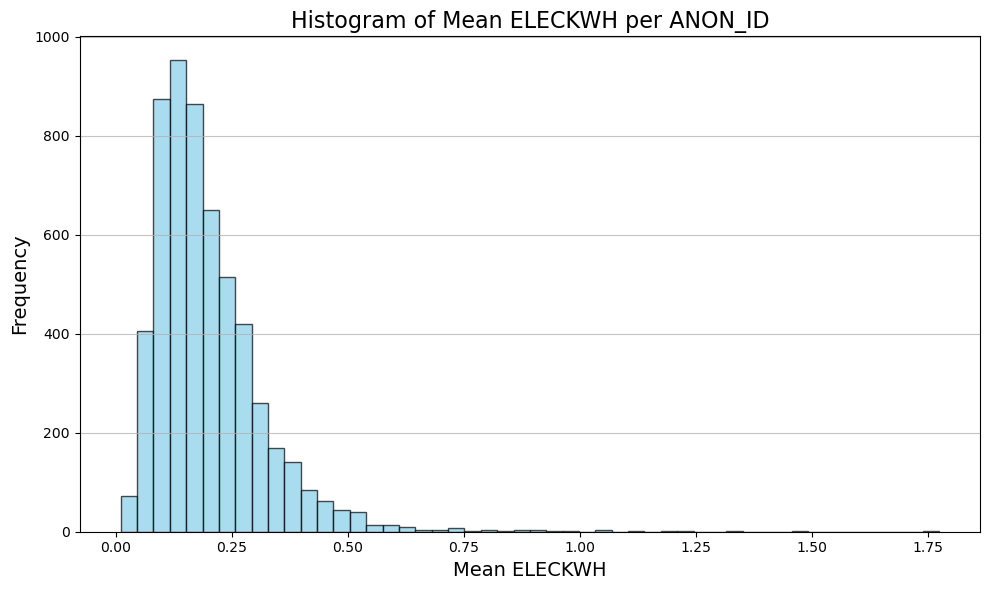

In [ ]:
# getting mean ELECKWH for each ANON_ID
mean_eleckwh_per_anon = edrp.groupby('ANON_ID')['ELECKWH'].mean()

# plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(mean_eleckwh_per_anon, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Mean ELECKWH per ANON_ID', fontsize=16)
plt.xlabel('Mean ELECKWH', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


Cutting low consumption households (threshold of .1 kWh selected from literature)

In [ ]:
# get ANON_IDs with mean ELECKWH < 0.1 kWh
anon_ids_above_threshold = mean_eleckwh_per_anon[mean_eleckwh_per_anon >= 0.1].index.tolist()
anon_ids_below_threshold = mean_eleckwh_per_anon[mean_eleckwh_per_anon < 0.1].index.tolist()
count_above_threshold = len(anon_ids_above_threshold)
print(f"Number of ANON_IDs with mean ELECKWH > 0.1: {count_above_threshold}")

# exclude low consumption ids from data
edrp = edrp[edrp['ANON_ID'].isin(anon_ids_above_threshold)]



Number of ANON_IDs with mean ELECKWH > 0.1: 4713


In [ ]:
# taking a look at preprocessed data
print(edrp.head())
print(edrp.shape)
print(f"Number of remaining ANON_IDs: {len(valid_anon_ids)}")


   ANON_ID ADVANCEDATETIME  HH  ELECKWH  Day_Class  Month_Class  Day
0     2867      2008-06-03   0     0.36          2            4    3
1    14498      2008-06-03   0     0.08          2            4    3
2     1261      2008-06-03   0     0.16          2            4    3
3     4311      2008-06-03   0     0.17          2            4    3
4    11012      2008-06-03   0     0.17          2            4    3
(18740872, 7)
Number of remaining ANON_IDs: 5628


### Feature Selection 


Starting by splitting the day into 4 periods and calculate the mean accordingly. 

The periods are:
* 'bre' - breakfast: 6 - 10
* 'day' - day: 10.30 - 16
* 'eve' - evening: 16.30 - 22
* 'nig' - night: 22.30 - 5.30

In [276]:
edrp['Weekend'] = edrp['ADVANCEDATETIME'].dt.weekday.isin([5, 6]).astype(int)

# function to assign HH to time-of-day split above
def hh_group(hh):
    if 12 <= hh <= 20:
        return 'bre'  # 'breakfast'
    elif 21 <= hh <= 32:
        return 'day'  # 'daytime'
    elif 33 <= hh <= 44:
        return 'eve'  # 'evening'
    else:
        return 'nig'  # 'night'
    
# alternative 
def hh_group2(hh):
    if 2 <= hh <= 8:
        return 'am'  # 'early morning'
    elif 9 <= hh <= 16:
        return 'bre'  # 'breakfast'
    elif 17 <= hh <= 29:
        return 'day'  # 'daytime'
    elif 30 <= hh <= 35:
        return 'aft'  # 'afternoon'
    elif 36 <= hh <= 42:
        return 'eve'  # 'evening'
    else:
        return 'nig'  # 'night'

edrp['HH_Group'] = edrp['HH'].map(hh_group2)

# calculating mean consumption by ANON_ID, HH_Group, and Weekend
edrp_means = edrp.groupby(['ANON_ID', 'HH_Group', 'Weekend'])['ELECKWH'].mean().reset_index()
# Rename the 'ELECKWH' column to 'KWH_by_SeasonTimeWknd'
edrp_means = edrp_means.rename(columns={'ELECKWH': 'KWH_by_SeasonTimeWknd'})

# Display the result
print(edrp_means.head())

   ANON_ID HH_Group  Weekend  KWH_by_SeasonTimeWknd
0        3      aft        0               0.295520
1        3       am        0               0.184397
2        3      bre        0               0.253377
3        3      day        0               0.255828
4        3      eve        0               0.320445


#### Relative Mean Electricity (RME) Consumption 

Based on Slovenian Paper

RME is added by HH_GROUP (bre, day, eve, nig) 

In [277]:
mean_by_group = (
    edrp.groupby(['ANON_ID', 'HH_Group'])['ELECKWH']
    .mean()
    .reset_index()
)
mean_overall = (
    edrp.groupby('ANON_ID')['ELECKWH']
    .mean()
    .reset_index()
)
mean_overall = mean_overall.rename(columns={'ELECKWH': 'Overall_Mean'})

# merging grouped mean with the overall mean
merged = mean_by_group.merge(mean_overall, on='ANON_ID')

# calculating RME
merged['RME'] = merged['ELECKWH'] / merged['Overall_Mean']

# Pivot the table to have RME_bre, RME_day, RME_eve, RME_nig as columns
df_rme = merged.pivot(index='ANON_ID', columns='HH_Group', values='RME').reset_index()
df_rme = df_rme.rename(columns={ 'bre': 'RME_bre',
                                 'day': 'RME_day',
                                 'eve': 'RME_eve',
                                 'nig': 'RME_nig', 
                                 'am' : 'RME_am', 
                                 'aft' : 'RME_aft'})

# Reset index to remove hierarchical indexing (if present)
df_rme.columns.name = None

print(df_rme)

      ANON_ID   RME_aft    RME_am   RME_bre   RME_day   RME_eve   RME_nig
0           3  1.158239  0.722714  0.993067  1.002673  1.255929  0.889213
1           5  1.284488  0.457266  1.392814  1.097545  1.185609  0.480555
2           7  1.507438  0.715902  0.790462  0.492482  2.298465  0.732693
3           8  1.293918  0.586768  1.355466  0.688923  1.585389  0.742032
4          10  0.999980  0.248778  0.894268  1.007062  1.847746  1.015171
...       ...       ...       ...       ...       ...       ...       ...
4708    16234  1.370463  0.495073  1.440956  0.618259  1.649280  0.743105
4709    16240  1.249762  0.291684  0.948964  1.151779  1.526300  0.747032
4710    16242  1.337981  0.673940  0.772462  1.022505  1.340513  0.914098
4711    16244  1.046037  0.368726  0.784900  1.333382  1.374041  0.844463
4712    16248  0.974654  0.457269  0.556265  0.640006  1.971557  1.769805

[4713 rows x 7 columns]


#### Plot for a specific ANON_ID the average daily consumption

In [ ]:
# Prep for plot
df_anon3 = edrp[edrp['ANON_ID'] == 3]
df_anon3['Shifted HH'] = df_anon3['HH'].apply(lambda i: i-12 if i>11 else i+36)  # since 'bre' starts at 6am
average_eleckwh_by_hh = df_anon3.groupby('Shifted HH')['ELECKWH'].mean().reset_index()

df_anon3['HH_Group'] = df_anon3['HH'].map(hh_group)
average_eleckwh_by_hh_group = df_anon3.groupby('HH_Group')['ELECKWH'].mean().reset_index()


fig, ax1 = plt.subplots()

# defining plots that will share the same x-axis
plt.plot(
    average_eleckwh_by_hh['Shifted HH'], 
    average_eleckwh_by_hh['ELECKWH'], 
    marker='o', linestyle='-', label='ELECKWH'
)
ax1.set_title('Average ELECKWH vs HH for Sample ANON_ID')
ax1.set_xlabel('Shifted Half Hour Interval')
ax1.set_ylabel('Average Electricity Consumption (ELECKWH)')
ax1.set_xticks(range(1, 49, 2))  # HH ranges from 1 to 48
ax1.set_yticks([0, 0.2, 0.4, 0.6])  # Define y-axis values
ax1.grid(True)
ax1.legend(loc = "upper left")

ax2 = ax1.twiny()

# Overlaying by time-of-day
ax2.bar(
    average_eleckwh_by_hh_group['HH_Group'], 
    average_eleckwh_by_hh_group['ELECKWH'], 
    color='skyblue',
    alpha = .4
)
ax2.set_yticks([0, 0.2, 0.4, 0.6]) 
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
print(df_anon3.shape)


#### Mean Relative Standard Deviation (RSD)

In [278]:
# getting mean and standard deviation of consumption levels for each ANON_ID and HH_Group
rsd_df = (
    edrp.groupby(['ANON_ID'])['ELECKWH']
    .agg(['mean', 'std'])
    .reset_index()
)

rsd_df['RSD'] = (rsd_df['std'] / rsd_df['mean'])
rsd_df = rsd_df.drop(columns=['mean', 'std'])

In [ ]:
rsd_df

ANON_ID       RSD
0           3  0.493693
1           5  1.221522
2           7  1.171739
3           8  0.926395
4          10  1.181152
...       ...       ...
4708    16234  1.563360
4709    16240  1.039768
4710    16242  0.532288
4711    16244  0.848292
4712    16248  0.917642

[4713 rows x 2 columns]

In [279]:
# showing top and bottom 5 RSD_avg IDs
top_5_rsd_avg_OG = rsd_df.nlargest(5, 'RSD')[['ANON_ID', 'RSD']]
print("Top 5 ANON_IDs with the highest RSD_avg:")
print(top_5_rsd_avg_OG)
bottom_5_rsd_avg_OG = rsd_df.nsmallest(5, 'RSD')[['ANON_ID', 'RSD']]
print("Botton 5 ANON_IDs with the highest RSD:")
print(bottom_5_rsd_avg_OG)

Top 5 ANON_IDs with the highest RSD_avg:
      ANON_ID       RSD
72        278  2.831985
3948    13834  2.761441
1237     4235  2.693242
1538     5350  2.625958
4100    14273  2.496190
Botton 5 ANON_IDs with the highest RSD:
      ANON_ID       RSD
1382     4789  0.063133
2527     8781  0.253841
2372     8217  0.261611
3821    13412  0.263814
2304     8005  0.287403


Join the dataframes to get per ANONID all the relevant features based only on its consumption.

In [280]:
# merging RME & RSD features
edrp_features = df_rme.merge(rsd_df, on='ANON_ID', how='left')

# getting date from ADVANCEDATETIME
edrp['Date'] = edrp['ADVANCEDATETIME'].dt.date

# daily max-min difference
daily_stats = edrp.groupby(['ANON_ID', 'Date'])['ELECKWH'].agg(['max', 'min']).reset_index()
daily_stats['Daily_Max_Min_Diff'] = daily_stats['max'] - daily_stats['min'] 

# average daily max-min difference for each ID
avg_daily_diff = daily_stats.groupby('ANON_ID')['Daily_Max_Min_Diff'].mean().reset_index()
avg_daily_diff = avg_daily_diff.rename(columns={'Daily_Max_Min_Diff': 'ADR'})

# merging new feature in 
edrp_features = pd.merge(edrp_features, avg_daily_diff, on='ANON_ID', how='left')

'''
#Drop RSD_avg greater than 2
edrp_features = edrp_features[edrp_features['RSD_avg'] <= 2.2]
edrp_features = edrp_features.reset_index(drop=True)
'''


print(edrp_features.tail())


      ANON_ID   RME_aft    RME_am   RME_bre   RME_day   RME_eve   RME_nig  \
4708    16234  1.370463  0.495073  1.440956  0.618259  1.649280  0.743105   
4709    16240  1.249762  0.291684  0.948964  1.151779  1.526300  0.747032   
4710    16242  1.337981  0.673940  0.772462  1.022505  1.340513  0.914098   
4711    16244  1.046037  0.368726  0.784900  1.333382  1.374041  0.844463   
4712    16248  0.974654  0.457269  0.556265  0.640006  1.971557  1.769805   

           RSD       ADR  
4708  1.563360  0.932061  
4709  1.039768  1.162085  
4710  0.532288  0.421805  
4711  0.848292  0.488549  
4712  0.917642  0.354000  


#### Low Consumption Households (<.1kWh)

In [281]:
# new df with IDs in anon_ids_below_threshold
df_below_threshold = edrp_features[edrp_features['ANON_ID'].isin(anon_ids_below_threshold)]

# drop these ANON_IDs from edrp_features
edrp_features = edrp_features[~edrp_features['ANON_ID'].isin(anon_ids_below_threshold)]

print(f"DataFrame with ANON_IDs below threshold: {df_below_threshold.shape}")
print(f"DataFrame after dropping those ANON_IDs: {edrp_features.shape}")


DataFrame with ANON_IDs below threshold: (0, 9)
DataFrame after dropping those ANON_IDs: (4713, 9)


## Correlation Heatmap and Pairplot of Features

Correlation Heatmap with only numerical features

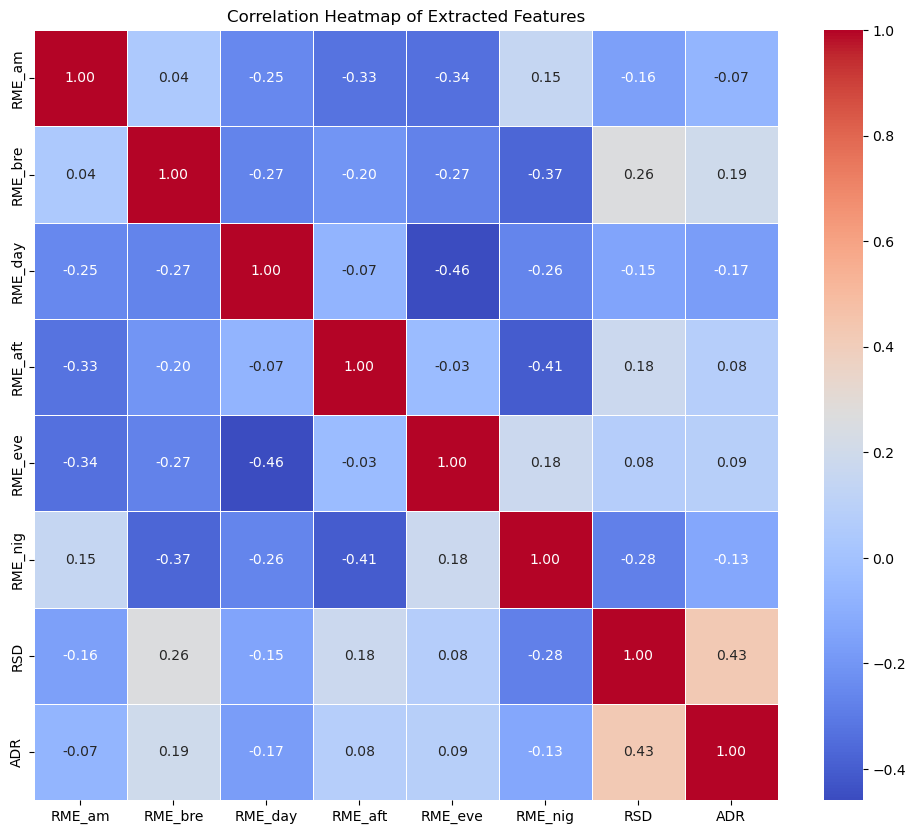

In [284]:
features = ['RME_am', 'RME_bre', 'RME_day', 'RME_aft', 'RME_eve', 'RME_nig', 'RSD', 'ADR']
X = edrp_features[features]
X_scaled = StandardScaler().fit_transform(X)

# plotting correlation heatmap of above features
plt.figure(figsize=(12, 10))
corr = edrp_features[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Extracted Features')
plt.show()

This next correlation heatmap includes categorical features


Lets filter only UKI (London) to get the weather out of the ecuation.

## Method 1: Hierarchical Clustering

Hierarchical Clustering with Dendrograms.



### HC with Ward Linkage and Euclidean Distance (Scaled Data)

      ANON_ID  Cluster_HC
0           3           4
1           5           6
2           7           9
3           8          11
4          10           5
...       ...         ...
4723    16240           2
4724    16242           4
4725    16244           2
4726    16247           6
4727    16248           1

[4728 rows x 2 columns]
    Cluster_HC  Count
0            1    629
1            2    747
2            3    346
3            4    854
4            5    299
5            6    230
6            7    106
7            8     76
8            9    304
9           10     63
10          11    560
11          12    143
12          13    371


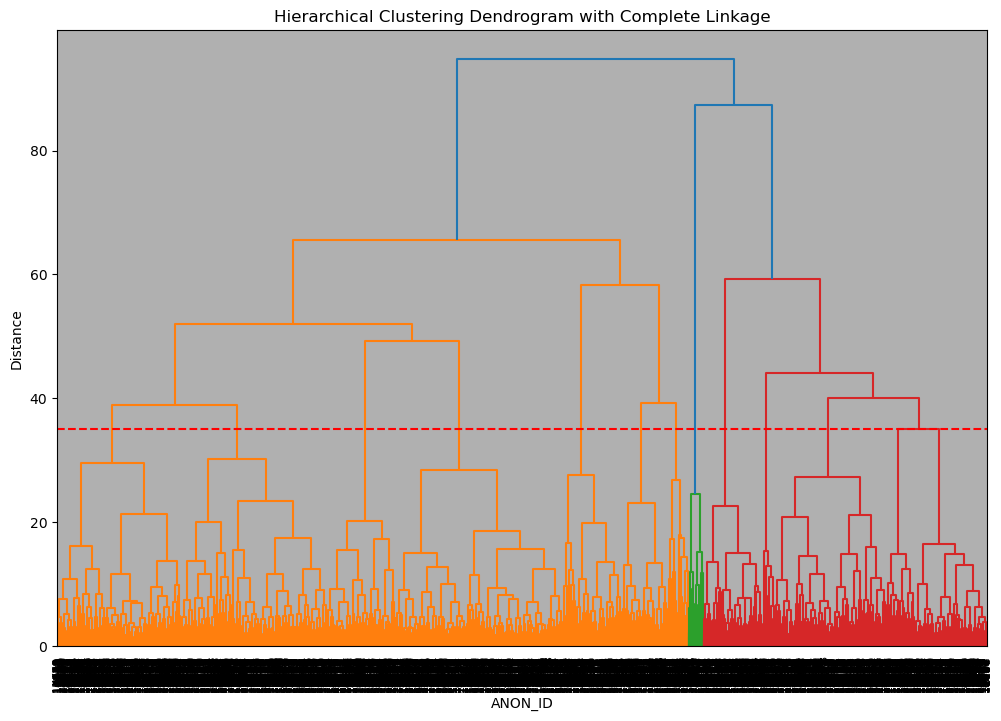

In [ ]:
# define features to cluster on: four RMEs, average RSD, Weekend & Seasonal Score, Average Daily Range, and Evening Consumption
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore','SScore', 'ADR', 'Avg_Day_Eve']
X = edrp_features[features]
X_scaled = StandardScaler().fit_transform(X)

# hierarchical clustering with ward linkage
linked = linkage(X_scaled, method='ward')

# setting a distance threshold 
distance_threshold = 35 # can tweak this

# getting cluster labels
cluster_labels = fcluster(linked, t=distance_threshold, criterion='distance') # default distance metric with ward linkage is euclidean

# adding the cluster labels to df
edrp_features['Cluster_HC'] = cluster_labels

# creating a table with ANON_IDs and their assigned hierarchical cluster labels
cluster_table = edrp_features[['ANON_ID', 'Cluster_HC']]

# Display the resulting table
print(cluster_table)


# counting & sorting ANON_IDs per cluster
cluster_counts = edrp_features['Cluster_HC'].value_counts().reset_index()
cluster_counts.columns = ['Cluster_HC', 'Count']
cluster_counts = cluster_counts.sort_values(by='Cluster_HC').reset_index(drop=True)
print(cluster_counts)


plt.figure(figsize=(12, 8))
dendrogram(linked, labels=edrp_features['ANON_ID'].values, leaf_rotation=90, leaf_font_size=8)
plt.axhline(y=distance_threshold, color='r', linestyle='--')  # Add a horizontal cut line at distance = 7
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')
plt.xlabel('ANON_ID')
plt.ylabel('Distance')
plt.grid(True)
plt.show()



#### Removing clusters that have less than 20 ANON_IDs; considering them as outliers?

In [ ]:
"""# Step 1: Identify clusters with less than 15 ANON_IDs
clusters_to_drop = cluster_counts[cluster_counts['Count'] < 20]['Cluster_HC'].tolist()
print(f"Clusters to be dropped: {clusters_to_drop}")

# Step 2: Identify ANON_IDs in those clusters
anon_ids_to_drop = edrp_features[edrp_features['Cluster_HC'].isin(clusters_to_drop)]['ANON_ID'].tolist()

# Step 3: Filter edrp_features to exclude these ANON_IDs
edrpselected = edrp_features[~edrp_features['ANON_ID'].isin(anon_ids_to_drop)].copy()

# Reset the index of edrpselected
edrpselected.reset_index(drop=True, inplace=True)

# Display information about the filtered DataFrame
print(f"Initial count of ANON_IDs: {len(edrp_features['ANON_ID'])}")
print(f"Final count of ANON_IDs: {len(edrpselected['ANON_ID'])}")
print(edrpselected) 
"""

# Unsure if we need to be keeping this (HC might be not even be useful going forward)

### Trying HC with Different Linkage Methods and Distance Metrics

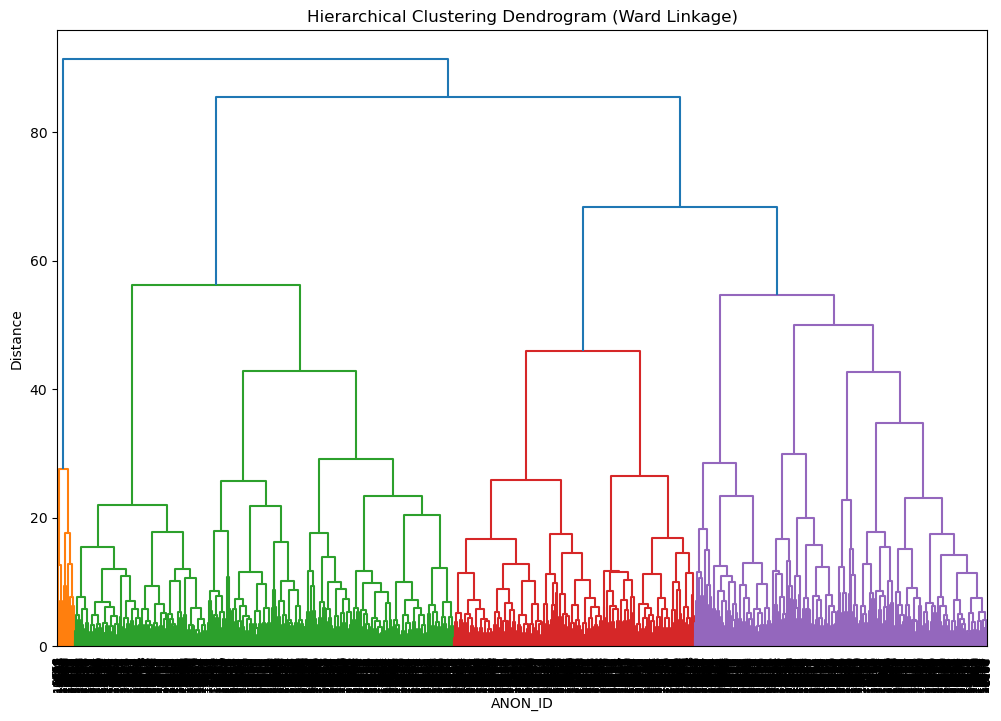

In [ ]:
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'SScore', 'ADR', 'Avg_Day_Eve']
X = edrp_features[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ward & euclidean here
linked = linkage(X_scaled, method='ward', metric="euclidean")

plt.figure(figsize=(12, 8))
dendrogram(
    linked,
    labels=edrp_features['ANON_ID'].values,
    leaf_rotation=90,
    leaf_font_size=8
)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('ANON_ID')
plt.ylabel('Distance')
plt.show()

Exploring cophenetic correlation as a way to puck between method-metric pairings:

In [ ]:
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'SScore', 'ADR', 'Avg_Day_Eve']
X = edrp_features[features]
X_scaled = StandardScaler().fit_transform(X)

methods = ['average', 'complete', 'single']
metrics = ['euclidean', 'correlation', 'chebyshev', 'cityblock']
xs = [X, X_scaled]

for method in methods:
    for i in xs:
        for metric in metrics:
            linked = linkage(i, method=method, metric=metric)
            coph_dist, coph_dendro = cophenet(linked, pdist(i))
            print(method + " " + metric + " " + f"Cophenetic Correlation Coefficient: {coph_dist}")
    

linked = linkage(X_scaled, method='ward', metric="euclidean")
coph_dist, coph_dendro = cophenet(linked, pdist(X_scaled))
print("ward" + " " + "euclidean" + " " + f"Cophenetic Correlation Coefficient: {coph_dist}")

linked = linkage(X_scaled, method='median', metric="euclidean")
coph_dist, coph_dendro = cophenet(linked, pdist(X_scaled))
print("median" + " " + "euclidean" + " " + f"Cophenetic Correlation Coefficient: {coph_dist}")


average euclidean Cophenetic Correlation Coefficient: 0.8171702591875095
average correlation Cophenetic Correlation Coefficient: 0.6704189308175659
average chebyshev Cophenetic Correlation Coefficient: 0.7925899128489896
average cityblock Cophenetic Correlation Coefficient: 0.8075822619232051
average euclidean Cophenetic Correlation Coefficient: 0.8059368217919813
average correlation Cophenetic Correlation Coefficient: 0.25139521428883305
average chebyshev Cophenetic Correlation Coefficient: 0.8019950072880571
average cityblock Cophenetic Correlation Coefficient: 0.7781822645817771
complete euclidean Cophenetic Correlation Coefficient: 0.6055229491803306
complete correlation Cophenetic Correlation Coefficient: 0.4718874246298732
complete chebyshev Cophenetic Correlation Coefficient: 0.574321818928328
complete cityblock Cophenetic Correlation Coefficient: 0.5939324329620344
complete euclidean Cophenetic Correlation Coefficient: 0.549248771754476
complete correlation Cophenetic Correlati

Cluster counts from different setups (determined above)

In [ ]:
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'SScore', 'ADR', 'Avg_Day_Eve']
X = edrp_features[features]
X_scaled = StandardScaler().fit_transform(X)
linked = linkage(X_scaled, method='ward', metric="euclidean")
cluster_labels = fcluster(linked, t=35, criterion='distance')

edrp_features['Cluster'] = cluster_labels

cluster_table = edrp_features[['ANON_ID', 'Cluster']]

cluster_counts = edrp_features['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

# Sort the clusters by Cluster_HC for better readability
cluster_counts = cluster_counts.sort_values(by='Cluster').reset_index(drop=True)
print(cluster_counts)


   Cluster  Count
0        1     82
1        2    610
2        3    448
3        4    685
4        5    686
5        6    422
6        7    356
7        8    302
8        9     95
9       10    590


In [ ]:

# Merge cluster information back into the original data (if not already included)
edrp_with_clusters = edrp.merge(
    edrp_features[['ANON_ID', 'Cluster']],
    on='ANON_ID',
    how='inner'
)

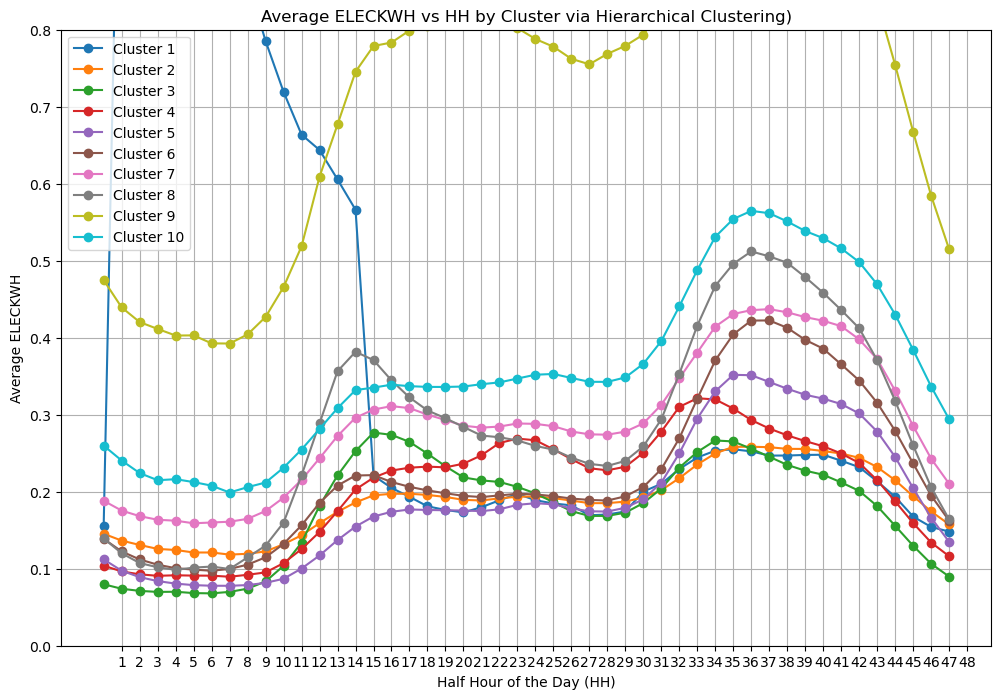

In [ ]:
# Group by Cluster and HH, and calculate the mean ELECKWH
clustered_means = edrp_with_clusters.groupby(['Cluster', 'HH'])['ELECKWH'].mean().reset_index()
plt.figure(figsize=(12, 8))

# Plot each cluster
for cluster in clustered_means['Cluster'].unique():
    cluster_data = clustered_means[clustered_means['Cluster'] == cluster]
    plt.plot(cluster_data['HH'], cluster_data['ELECKWH'], label=f'Cluster {cluster}', marker='o')

# Plot details
plt.title('Average ELECKWH vs HH by Cluster via Hierarchical Clustering)')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.ylim(0,0.8)
plt.grid(True)
plt.show()

## Method 2: GMM with AIC, BIC, and Silhouette Score as Evaluation Metrics to define the optimal amount of clusters


In [296]:
edrp_features.isnull().sum().sum() == 0 # checking no missing values, can proceed with GMM

True

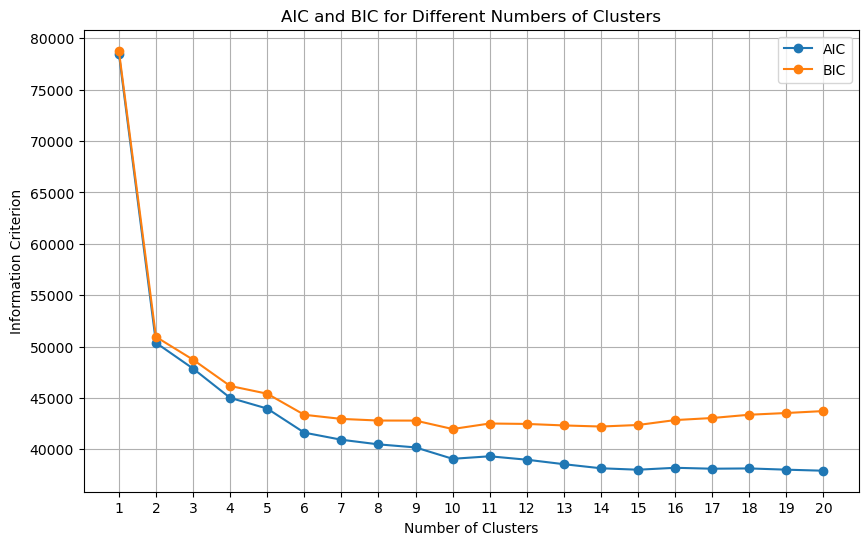

In [297]:
# set features - here it is all of them
features = ['RME_am', 'RME_bre', 'RME_day', 'RME_aft', 'RME_eve', 'RME_nig', 'RSD', 'ADR']
X = edrp_features[features]
X_scaled = StandardScaler().fit_transform(X)

# range of cluster amounts to try
cluster_range = range(1, 21)

aic_values = []
bic_values = []

# fit GMMs, get AIC and BIC each time
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=498)
    gmm.fit(X_scaled)
    aic_values.append(gmm.aic(X_scaled))
    bic_values.append(gmm.bic(X_scaled))

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, aic_values, marker='o', label='AIC')
plt.plot(cluster_range, bic_values, marker='o', label='BIC')
plt.xlabel('Number of Clusters')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC for Different Numbers of Clusters')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)
plt.show()


Testing Feature Normality


Testing Gaussianity for feature: RME_am
Shapiro-Wilk: {'Statistic': 0.7085296652583211, 'p-value': 1.2722159132190466e-67}
Kolmogorov-Smirnov: {'Statistic': 0.13967446858331822, 'p-value': 1.1252036663127674e-80}
Anderson-Darling: {'Statistic': 227.35273734379552, 'Critical Values': array([0.576, 0.655, 0.786, 0.917, 1.091])}

Testing Gaussianity for feature: RME_bre
Shapiro-Wilk: {'Statistic': 0.8821244995861859, 'p-value': 6.278397967597268e-51}
Kolmogorov-Smirnov: {'Statistic': 0.11114487042908183, 'p-value': 3.6446558751594306e-51}
Anderson-Darling: {'Statistic': 112.22671393727614, 'Critical Values': array([0.576, 0.655, 0.786, 0.917, 1.091])}

Testing Gaussianity for feature: RME_day
Shapiro-Wilk: {'Statistic': 0.9876145825227266, 'p-value': 6.323093751799442e-20}
Kolmogorov-Smirnov: {'Statistic': 0.04058715570430671, 'p-value': 3.495941467669714e-07}
Anderson-Darling: {'Statistic': 11.162953573551022, 'Critical Values': array([0.576, 0.655, 0.786, 0.917, 1.091])}

Testing Gauss

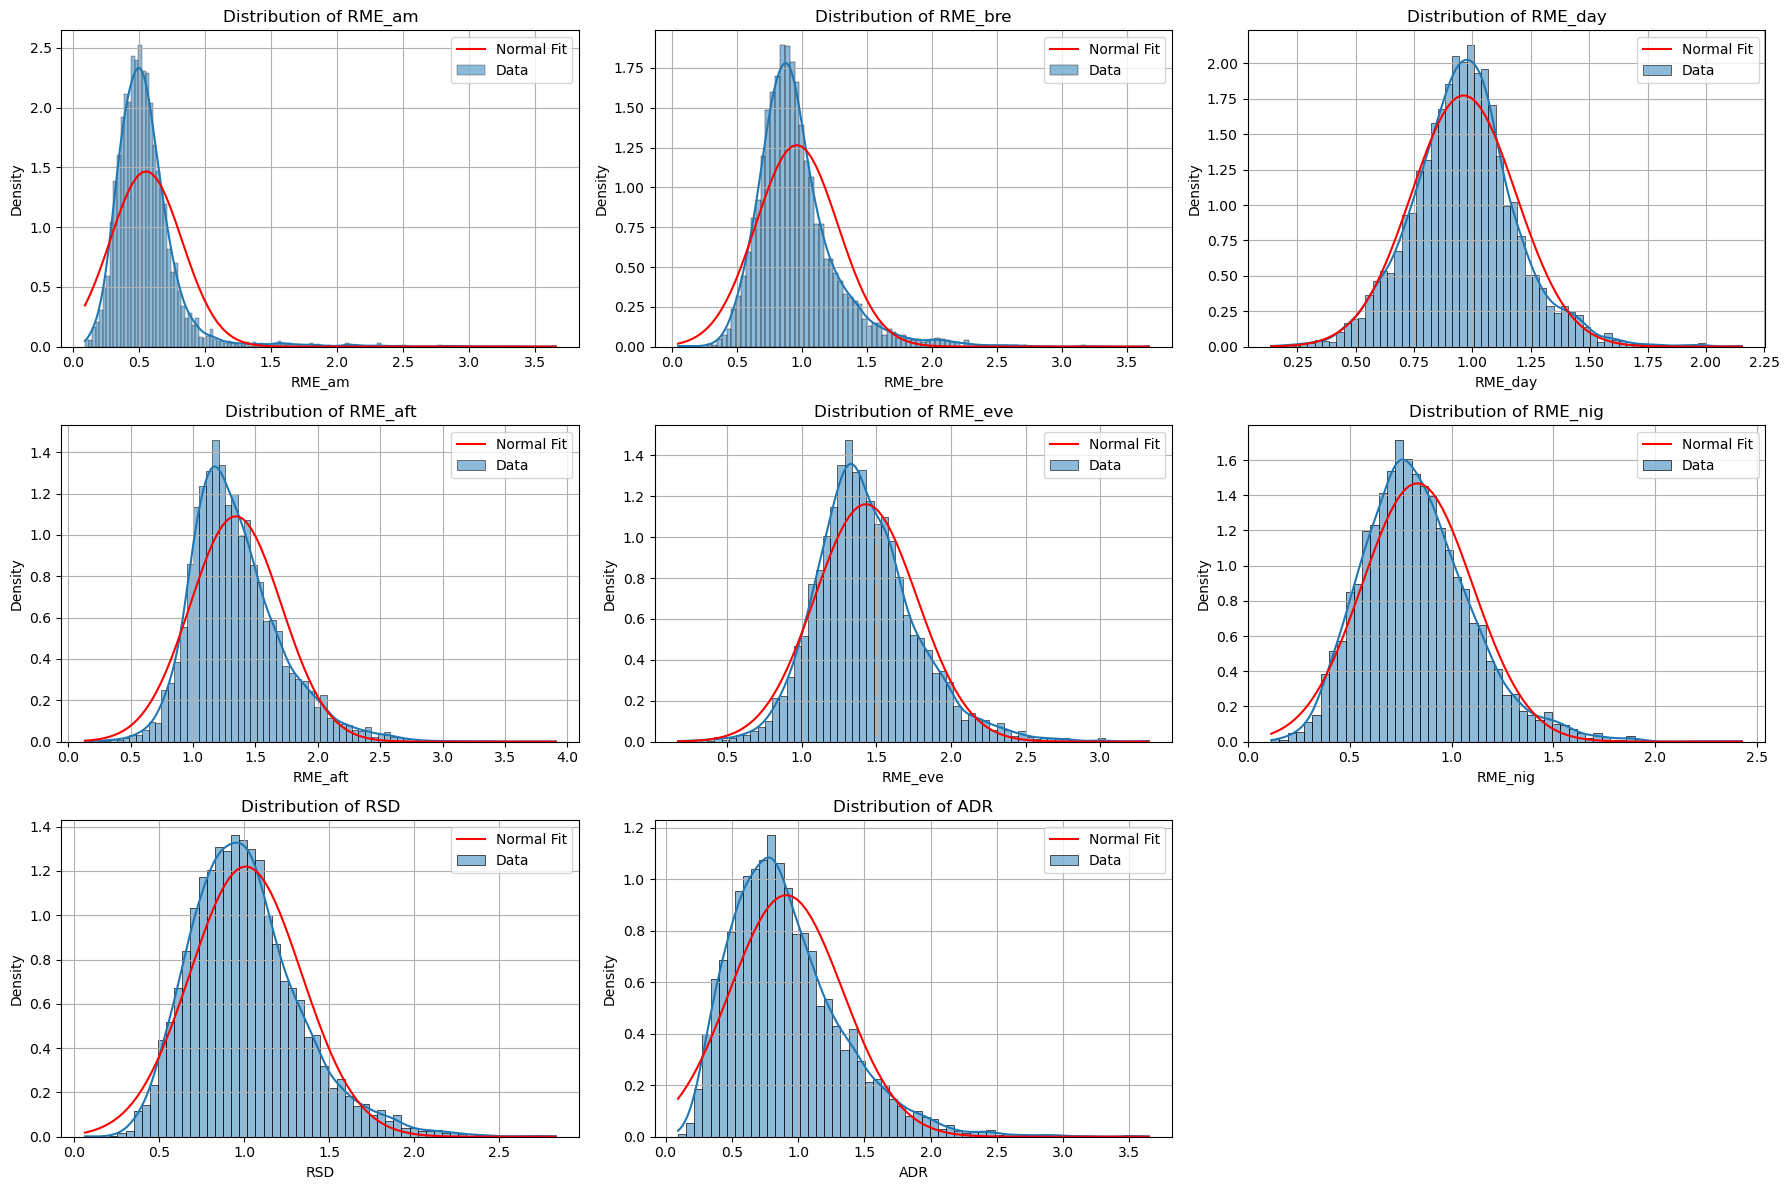

In [288]:

features = ['RME_am', 'RME_bre', 'RME_day', 'RME_aft', 'RME_eve', 'RME_nig', 'RSD', 'ADR']
X = edrp_features[features]

# Function to test Gaussianity with different tests
def test_gaussianity(feature_data):
    results = {}

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = shapiro(feature_data)
    results['Shapiro-Wilk'] = {'Statistic': shapiro_stat, 'p-value': shapiro_p}

    # Kolmogorov-Smirnov Test
    ks_stat, ks_p = kstest(feature_data, 'norm', args=(feature_data.mean(), feature_data.std()))
    results['Kolmogorov-Smirnov'] = {'Statistic': ks_stat, 'p-value': ks_p}

    # Anderson-Darling Test
    anderson_result = anderson(feature_data)
    results['Anderson-Darling'] = {'Statistic': anderson_result.statistic, 'Critical Values': anderson_result.critical_values}

    return results

# Adjust grid layout based on the number of features
num_features = len(features)
rows = (num_features + 2) // 3  # Calculate number of rows for a 3-column layout
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 4))
axes = axes.flatten()

for i, feature in enumerate(features):
    # Drop NaN values for the feature
    feature_data = X[feature].dropna()

    # Run Gaussianity tests
    results = test_gaussianity(feature_data)
    print(f"\nTesting Gaussianity for feature: {feature}\n{'=' * 40}")
    for test_name, result in results.items():
        print(f"{test_name}: {result}")
    
    # Plot histogram with KDE and Q-Q plot
    ax = axes[i]
    sns.histplot(feature_data, kde=True, stat="density", label="Data", ax=ax)
    x = np.linspace(feature_data.min(), feature_data.max(), 100)
    normal_curve = np.exp(-0.5 * ((x - feature_data.mean()) / feature_data.std())**2) / (feature_data.std() * np.sqrt(2 * np.pi))
    ax.plot(x, normal_curve, label="Normal Fit", color='red')
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid()

# Remove any unused axes (in case of extra grid spaces)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Notes on Gaussianity:
# Anderson-Darling Normality test: For datasets smaller than 500 entries, 
# the feature follows a normal distribution when the statistic is less than 0.6.


### GMM on 6 RMEs, RSD, and ADR

In [290]:
features = ['RME_am', 'RME_bre', 'RME_day', 'RME_aft', 'RME_eve', 'RME_nig', 'RSD', 'ADR']
X = edrp_features[features]

X_scaled = StandardScaler().fit_transform(X)
gmm = GaussianMixture(n_components=10, random_state=42)
edrp_features['Cluster'] = gmm.fit_predict(X_scaled)

# get counts per cluster
cluster_counts = edrp_features['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

cluster_counts = cluster_counts.sort_values(by='Cluster').reset_index(drop=True)
print(cluster_counts)


   Cluster  Count
0        0   1131
1        1   1194
2        2     98
3        3     72
4        4    260
5        5   1125
6        6    241
7        7    178
8        8     26
9        9    388


In [291]:

# getting feature averages by cluster
cluster_means = edrp_features.groupby('Cluster')[features].mean().reset_index()
cluster_means = cluster_means.round(2)

# using pandas styler for color scale
def apply_color_scale(df):
    return df.style.background_gradient(cmap="coolwarm", axis=0).format(precision=2)

styled_cluster_means = apply_color_scale(cluster_means.merge(cluster_counts))
styled_cluster_means


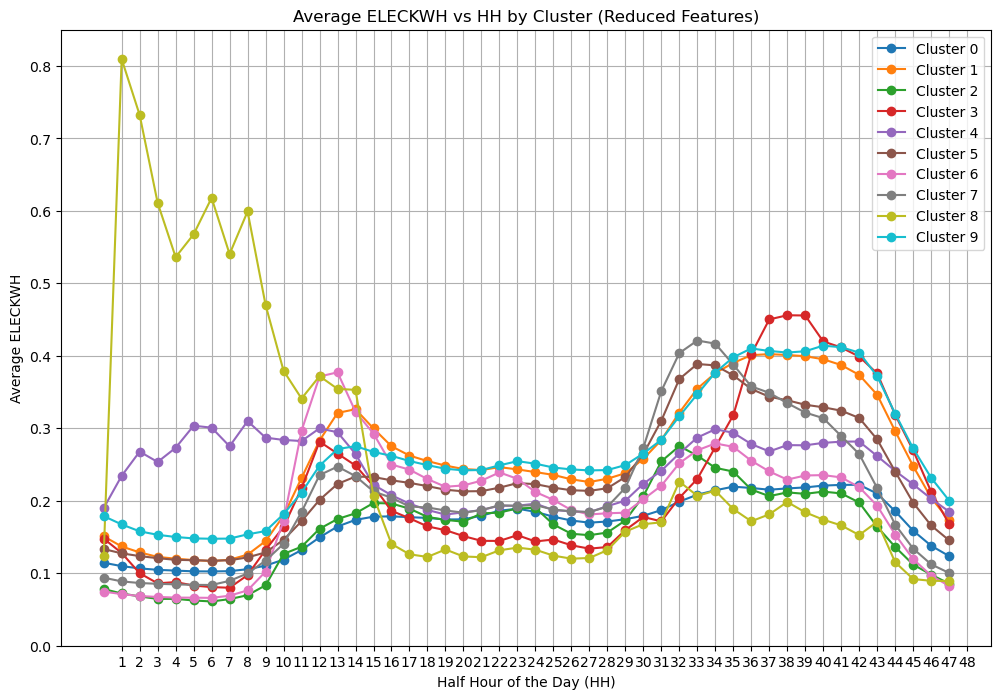

In [294]:

edrp_with_clusters = edrp.merge(
    edrp_features[['ANON_ID', 'Cluster']],
    on='ANON_ID',
    how='inner'
)
clustered_means = edrp_with_clusters.groupby(['Cluster', 'HH'])['ELECKWH'].mean().reset_index()

plt.figure(figsize=(12, 8))
for cluster in clustered_means['Cluster'].unique():
    cluster_data = clustered_means[clustered_means['Cluster'] == cluster]
    plt.plot(cluster_data['HH'], cluster_data['ELECKWH'], label=f'Cluster {cluster}', marker='o')


plt.title('Average ELECKWH vs HH by Cluster (Reduced Features)')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))
plt.legend()
plt.ylim(0,0.85)
plt.grid(True)
plt.show()

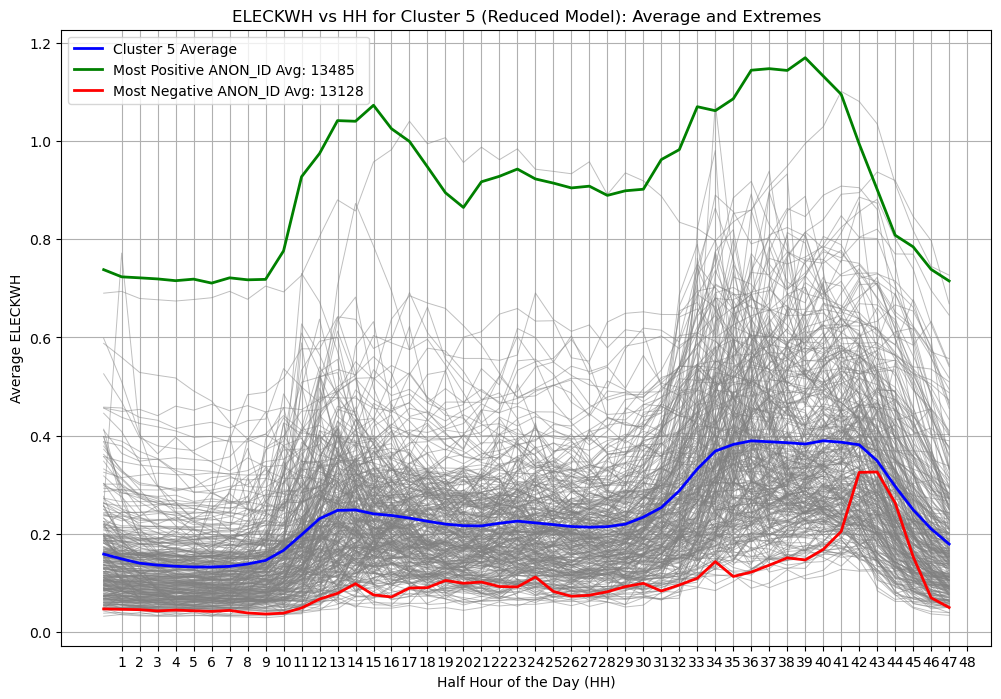

Features Table for Cluster 5 and Selected ANON_IDs:
                  RME_bre   RME_eve   RME_day   RME_nig       RSD       ADR
ANON_ID                                                                    
Cluster_Average  0.942246  1.207165  1.385582  0.533638  1.198264  0.732273
13485            1.078672  1.164492  1.010942  0.814188  0.584618  1.150442
13128            0.850570  1.813752  0.889182  0.523112  1.016064  0.445849


In [260]:

# getting data for Cluster 5
cluster_5_data = edrp_with_clusters[edrp_with_clusters['Cluster'] == 6]

cluster_5_avg_by_anon = (
    cluster_5_data.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Calculate the cluster average ELECKWH per HH
cluster_5_avg = (
    cluster_5_avg_by_anon.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'Cluster_Avg_ELECKWH'})
)

# Merge the cluster average back with the individual ANON_ID data
cluster_5_data = cluster_5_data.merge(cluster_5_avg, on='HH', how='left')

# Calculate the absolute difference from the cluster average for each ANON_ID
cluster_5_data['Difference'] = cluster_5_data['ELECKWH'] - cluster_5_data['Cluster_Avg_ELECKWH']

# Calculate the mean difference per ANON_ID
anon_diff = (
    cluster_5_data.groupby('ANON_ID')['Difference']
    .mean()
    .reset_index()
    .rename(columns={'Difference': 'Mean_Difference'})
)

# Identify the ANON_IDs with the most positive and most negative differences
most_positive_anon = anon_diff.loc[anon_diff['Mean_Difference'].idxmax(), 'ANON_ID']
most_negative_anon = anon_diff.loc[anon_diff['Mean_Difference'].idxmin(), 'ANON_ID']

# Extract data for the identified ANON_IDs
positive_anon_data = (
    cluster_5_avg_by_anon[cluster_5_avg_by_anon['ANON_ID'] == most_positive_anon]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

negative_anon_data = (
    cluster_5_avg_by_anon[cluster_5_avg_by_anon['ANON_ID'] == most_negative_anon]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the data
plt.figure(figsize=(12, 8))

# Plot all ANON_IDs in grey
for anon_id in cluster_5_avg_by_anon['ANON_ID'].unique():
    anon_data = cluster_5_avg_by_anon[cluster_5_avg_by_anon['ANON_ID'] == anon_id]
    plt.plot(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.5, linewidth=0.7)

# Plot the cluster average in blue
plt.plot(
    cluster_5_avg['HH'], cluster_5_avg['Cluster_Avg_ELECKWH'],
    color='blue', linewidth=2, label='Cluster 5 Average'
)

# Plot the most positive ANON_ID in green
plt.plot(
    positive_anon_data['HH'], positive_anon_data['ELECKWH'],
    color='green', linewidth=2, label=f'Most Positive ANON_ID Avg: {most_positive_anon}'
)

# Plot the most negative ANON_ID in red
plt.plot(
    negative_anon_data['HH'], negative_anon_data['ELECKWH'],
    color='red', linewidth=2, label=f'Most Negative ANON_ID Avg: {most_negative_anon}'
)

# Plot details
plt.title('ELECKWH vs HH for Cluster 5 (Reduced Model): Average and Extremes')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()



# Prepare a DataFrame to store the features for the cluster and selected ANON_IDs
table_data = {}

# Add cluster-wide average features
table_data['Cluster_Average'] = (
    edrp_features[edrp_features['Cluster'] == 5][features]
    .mean()
    .to_dict()
)

# Add features for the most positive ANON_ID
table_data[most_positive_anon] = (
    edrp_features[edrp_features['ANON_ID'] == most_positive_anon][features]
    .mean()
    .to_dict()
)

# Add features for the most negative ANON_ID
table_data[most_negative_anon] = (
    edrp_features[edrp_features['ANON_ID'] == most_negative_anon][features]
    .mean()
    .to_dict()
)

# Convert the dictionary to a DataFrame
table_df = pd.DataFrame(table_data)

# Transpose the DataFrame to match the desired format
table_df = table_df.T
table_df.index.name = 'ANON_ID'

# Display the resulting table
print("Features Table for Cluster 5 and Selected ANON_IDs:")
print(table_df)




In [ ]:
# Filter the data for Cluster 5 in the reduced model
cluster_5_data = edrp_with_clusters[edrp_with_clusters['Cluster'] == 2]

# Calculate the average ELECKWH per HH for each ANON_ID
avg_eleckwh_per_hh_anon = (
    cluster_5_data.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the box plot for ELECKWH grouped by HH
plt.figure(figsize=(12, 8))
sns.boxplot(data=avg_eleckwh_per_hh_anon, x='HH', y='ELECKWH', color='skyblue', showmeans=True, meanline=True)

# Plot details
plt.title('Box Plot of Average ELECKWH per HH for Cluster YY (Reduced Model)', fontsize=16)
plt.xlabel('Half Hour of the Day (HH)', fontsize=14)
plt.ylabel('Average ELECKWH per ANON_ID', fontsize=14)
plt.xticks(range(0, 49, 4))  # Adjust the ticks for better readability
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()



In [ ]:
def optimize_dataframe(df):
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')
    for col in df.select_dtypes(include=['int64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    return df

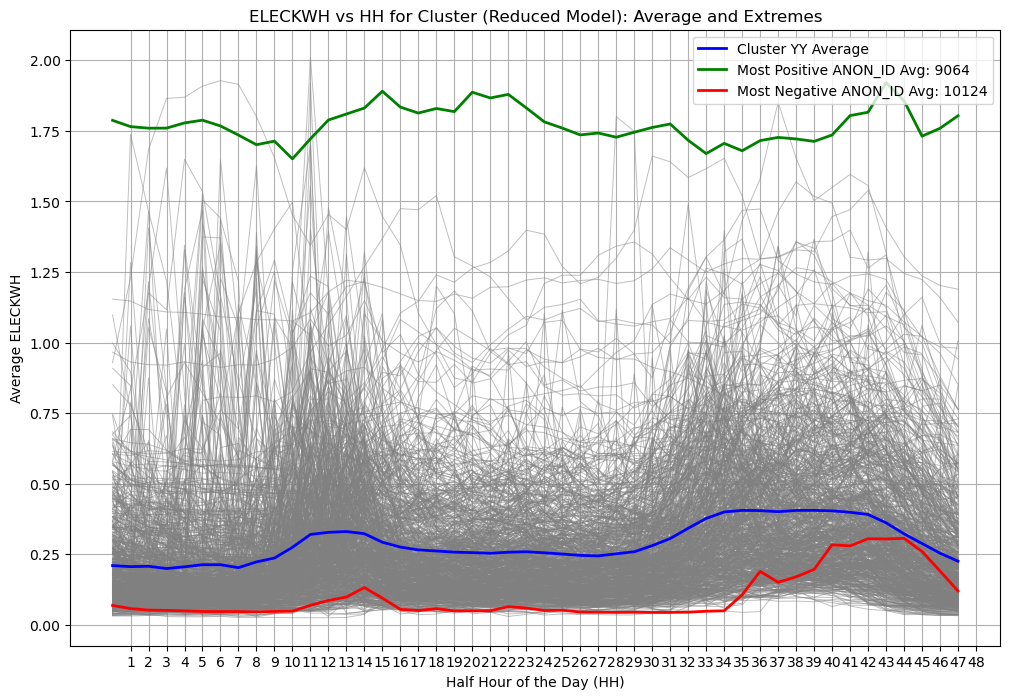

In [265]:
cluster_02 = 4
# Filter the data for Cluster 5 in the reduced model
cluster_5_data_reduced = edrp_with_clusters[edrp_with_clusters['Cluster'] == cluster_02]

# Calculate the average ELECKWH per HH for each ANON_ID in Cluster 5
cluster_5_avg_by_anon_reduced = (
    cluster_5_data_reduced.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Calculate the cluster average ELECKWH per HH
cluster_5_avg_reduced = (
    cluster_5_avg_by_anon_reduced.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'Cluster_Avg_ELECKWH'})
)

# Merge the cluster average back with the individual ANON_ID data
cluster_5_data_reduced = cluster_5_data_reduced.merge(cluster_5_avg_reduced, on='HH', how='left')

# Calculate the absolute difference from the cluster average for each ANON_ID
cluster_5_data_reduced['Difference'] = cluster_5_data_reduced['ELECKWH'] - cluster_5_data_reduced['Cluster_Avg_ELECKWH']

# Calculate the mean difference per ANON_ID
anon_diff_reduced = (
    cluster_5_data_reduced.groupby('ANON_ID')['Difference']
    .mean()
    .reset_index()
    .rename(columns={'Difference': 'Mean_Difference'})
)

# Identify the ANON_IDs with the most positive and most negative differences
most_positive_anon_reduced = anon_diff_reduced.loc[anon_diff_reduced['Mean_Difference'].idxmax(), 'ANON_ID']
most_negative_anon_reduced = anon_diff_reduced.loc[anon_diff_reduced['Mean_Difference'].idxmin(), 'ANON_ID']

# Extract data for the identified ANON_IDs
positive_anon_data_reduced = (
    cluster_5_avg_by_anon_reduced[cluster_5_avg_by_anon_reduced['ANON_ID'] == most_positive_anon_reduced]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

negative_anon_data_reduced = (
    cluster_5_avg_by_anon_reduced[cluster_5_avg_by_anon_reduced['ANON_ID'] == most_negative_anon_reduced]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the data
plt.figure(figsize=(12, 8))

# Plot all ANON_IDs in grey
for anon_id in cluster_5_avg_by_anon_reduced['ANON_ID'].unique():
    anon_data = cluster_5_avg_by_anon_reduced[cluster_5_avg_by_anon_reduced['ANON_ID'] == anon_id]
    plt.plot(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.5, linewidth=0.7)

# Plot the cluster average in blue
plt.plot(
    cluster_5_avg_reduced['HH'], cluster_5_avg_reduced['Cluster_Avg_ELECKWH'],
    color='blue', linewidth=2, label='Cluster YY Average'
)

# Plot the most positive ANON_ID in green
plt.plot(
    positive_anon_data_reduced['HH'], positive_anon_data_reduced['ELECKWH'],
    color='green', linewidth=2, label=f'Most Positive ANON_ID Avg: {most_positive_anon_reduced}'
)

# Plot the most negative ANON_ID in red
plt.plot(
    negative_anon_data_reduced['HH'], negative_anon_data_reduced['ELECKWH'],
    color='red', linewidth=2, label=f'Most Negative ANON_ID Avg: {most_negative_anon_reduced}'
)

# Plot details
plt.title('ELECKWH vs HH for Cluster (Reduced Model): Average and Extremes')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()



In [ ]:

# Prepare a DataFrame to store the features for the cluster and selected ANON_IDs
table_data = {}

# Add cluster-wide average features
table_data['Cluster_Average'] = (
    edrp_features_gmm[edrp_features_gmm['Cluster'] == cluster_02][features]
    .mean()
    .to_dict()
)

# Add features for the most positive ANON_ID
table_data[most_positive_anon_reduced] = (
    edrp_features_gmm[edrp_features_gmm['ANON_ID'] == most_positive_anon_reduced][features]
    .mean()
    .to_dict()
)

# Add features for the most negative ANON_ID
table_data[most_negative_anon_reduced] = (
    edrp_features_gmm[edrp_features_gmm['ANON_ID'] == most_negative_anon_reduced][features]
    .mean()
    .to_dict()
)

# Convert the dictionary to a DataFrame
table_df = pd.DataFrame(table_data)
table_df = table_df.round(2)
# Transpose the DataFrame to match the desired format
table_df = table_df.T
table_df.index.name = 'ANON_ID'

# Display the resulting table
print("Features Table for Cluster ", cluster_02 ,"and Selected ANON_IDs:")
print(table_df)


In [ ]:

# Filter the data for Cluster 5 in the reduced model
cluster_5_data_reduced = edrp_with_clusters[edrp_with_clusters['Cluster'] == cluster_02]

# Calculate the average ELECKWH per HH for each ANON_ID
avg_eleckwh_per_hh_anon = (
    cluster_5_data_reduced.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the box plot for ELECKWH grouped by HH
plt.figure(figsize=(12, 8))
sns.boxplot(data=avg_eleckwh_per_hh_anon, x='HH', y='ELECKWH', color='skyblue', showmeans=True, meanline=True)

# Plot details
plt.title('Box Plot of Average ELECKWH per HH for Cluster YY (Reduced Model)', fontsize=16)
plt.xlabel('Half Hour of the Day (HH)', fontsize=14)
plt.ylabel('Average ELECKWH per ANON_ID', fontsize=14)
plt.xticks(range(0, 49, 4))  # Adjust the ticks for better readability
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()



NameError: name 'df_with_clusters_reduced' is not defined

### GMM with Alternative Features

In [ ]:

# CAN CHANGE THESE FEATURES AROUND 

features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD', 'ADR', 'Avg_Day_Eve']
X = edrp_features[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the Gaussian Mixture Model with __ clusters
gmm = GaussianMixture(n_components=12, random_state=42)  # INPUT THE OPTIMAL NUMBER OF CLUSTERS
edrp_features['Cluster'] = gmm.fit_predict(X_scaled)

# Count the number of consumers per cluster
cluster_counts = edrp_features['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Number_of_Consumers']

# Sort the clusters for better readability
cluster_counts = cluster_counts.sort_values(by='Cluster').reset_index(drop=True)

# Display the cluster counts
display(cluster_counts)


Cluster  Number_of_Consumers
0         0                  163
1         1                  107
2         2                  914
3         3                   52
4         4                  654
5         5                   77
6         6                 1075
7         7                  312
8         8                  227
9         9                  285
10       10                  163
11       11                  247

### Table with the mean value of the features per Cluster

In [298]:
# get feature averages by cluster
cluster_means = edrp_features.groupby('Cluster')[features].mean().reset_index()
cluster_means = cluster_means.round(2)

# using pandas styler for color scale
def apply_color_scale(df):
    return df.style.background_gradient(cmap="coolwarm", axis=0).format(precision=2)

styled_cluster_means = apply_color_scale(cluster_means.merge(cluster_counts))

styled_cluster_means

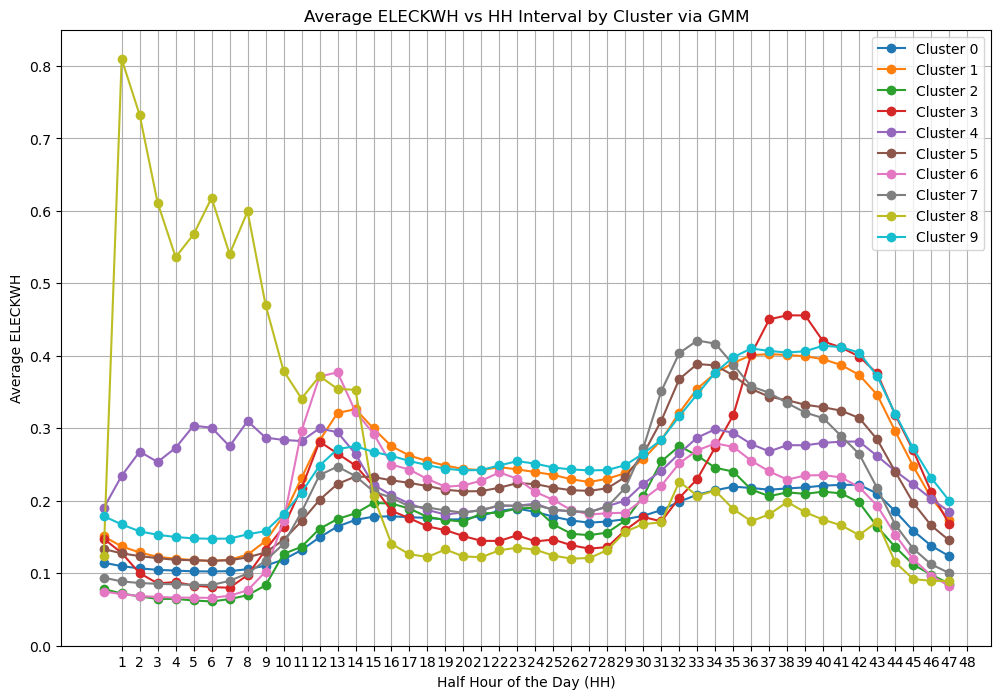

In [299]:

# Group by Cluster and HH, and calculate the mean ELECKWH
clustered_means = edrp_with_clusters.groupby(['Cluster', 'HH'])['ELECKWH'].mean().reset_index()

# Plot each cluster
plt.figure(figsize=(12, 8))
for cluster in clustered_means['Cluster'].unique():
    cluster_data = clustered_means[clustered_means['Cluster'] == cluster]
    plt.plot(cluster_data['HH'], cluster_data['ELECKWH'], label=f'Cluster {cluster}', marker='o')

# Plot details
plt.title('Average ELECKWH vs HH Interval by Cluster via GMM')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.ylim(0,.85)
plt.grid(True)
plt.show()

## Method 3: Dimension Reduction Techniques

Here we will attempt to use dimension reduction techniques to then cluster the EDRP data. These include: PCA, SVD, Fourier Transform (done bove in the notebook), and potentially non-linear methods such as t-SNE, UMAP, Isomap, MDS, and Kernel PCA. 

### PCA Analysis


[0.2496945  0.20893901]


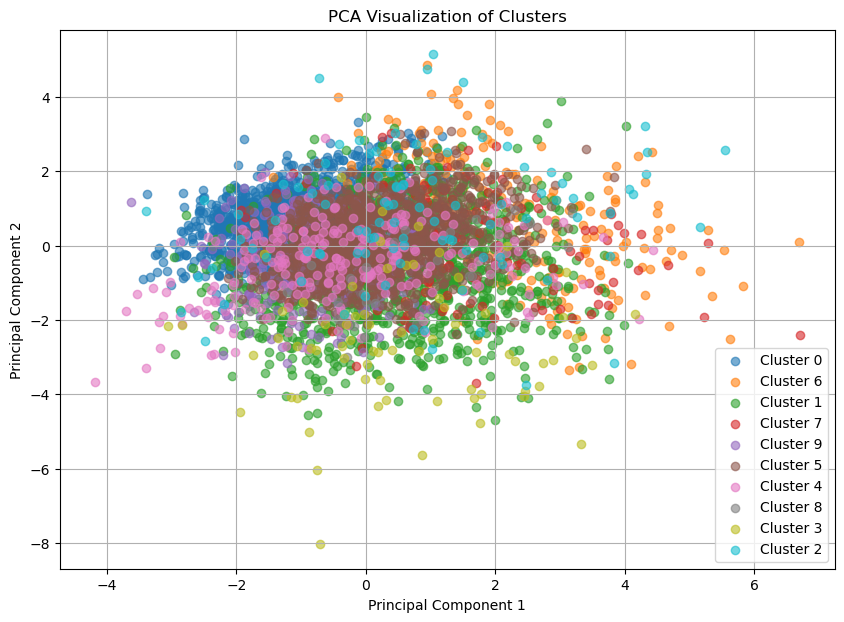

In [303]:

# Define the selected features for PCA
features = ['RME_am', 'RME_bre', 'RME_day', 'RME_aft', 'RME_eve', 'RME_nig', 'RSD', 'ADR']
X = edrp_features[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results and the cluster labels
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = edrp_features['Cluster']

# Plot the PCA-transformed data with cluster labels
plt.figure(figsize=(10, 7))
for cluster in df_pca['Cluster'].unique():
    plt.scatter(
        df_pca[df_pca['Cluster'] == cluster]['PCA1'],
        df_pca[df_pca['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}',
        alpha=0.6
    )
print(pca.explained_variance_ratio_)


# Add plot details
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


#### PCA w 2 components to evaluate the disimilarity of selected clusters

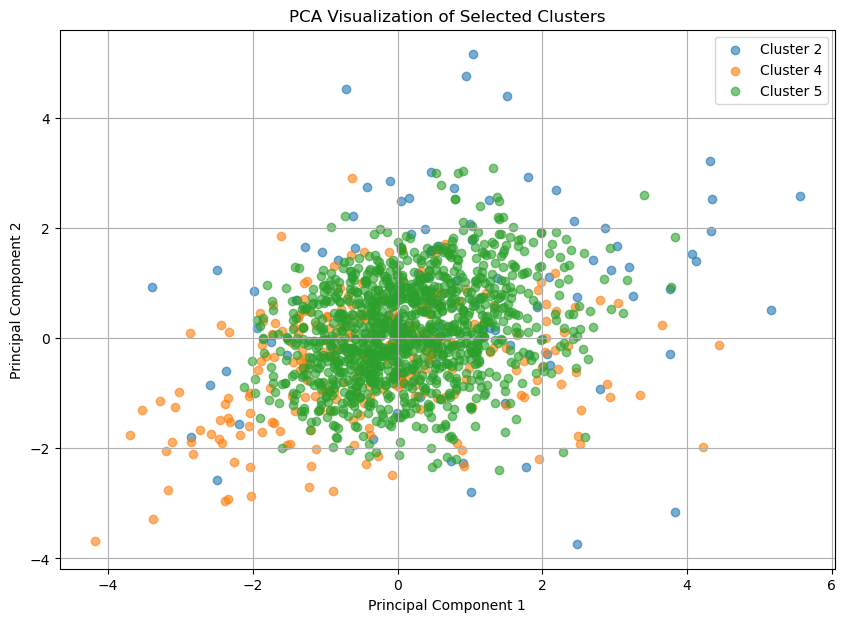

In [304]:

# Filter the DataFrame to keep only clusters 1, 2, 4, and 7
clusters_to_plot = [2, 4, 5]
df_pca_filtered = df_pca[df_pca['Cluster'].isin(clusters_to_plot)]

# Plot the PCA-transformed data with the specified cluster labels
plt.figure(figsize=(10, 7))
for cluster in clusters_to_plot:
    plt.scatter(
        df_pca_filtered[df_pca_filtered['Cluster'] == cluster]['PCA1'],
        df_pca_filtered[df_pca_filtered['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

# Add plot details
plt.title('PCA Visualization of Selected Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


### SVD (see Shruti's ipynb)

## Results analysis

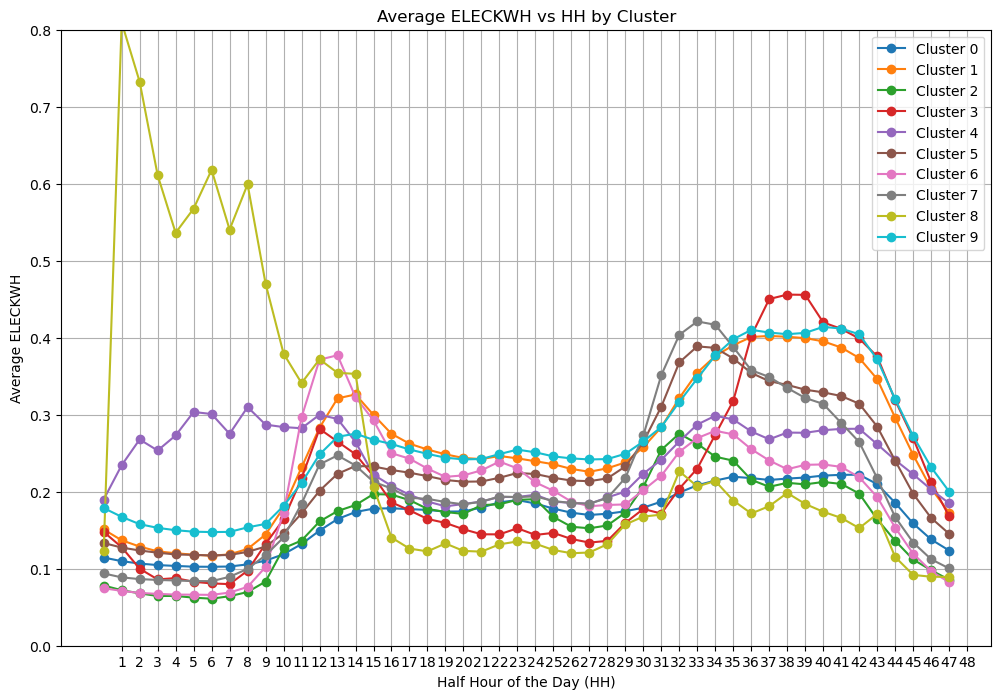

In [305]:

# Ensure 'HH' and 'ELECKWH' columns are in the dataframe
if 'HH' not in edrp.columns or 'ELECKWH' not in edrp.columns:
    raise KeyError("The dataframe must contain 'HH' and 'ELECKWH' columns.")

# Merge cluster information back into the original data (if not already included)
edrp_with_clusters = edrp.merge(
    edrp_features[['ANON_ID', 'Cluster']],
    on='ANON_ID',
    how='inner'
)

# Group by Cluster and HH, and calculate the mean ELECKWH
clustered_means = edrp_with_clusters.groupby(['Cluster', 'HH'])['ELECKWH'].mean().reset_index()

# Plot each cluster
plt.figure(figsize=(12, 8))
for cluster in clustered_means['Cluster'].unique():
    cluster_data = clustered_means[clustered_means['Cluster'] == cluster]
    plt.plot(cluster_data['HH'], cluster_data['ELECKWH'], label=f'Cluster {cluster}', marker='o')

# Plot details
plt.title('Average ELECKWH vs HH by Cluster')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.ylim(0,0.8)
plt.grid(True)
plt.show()


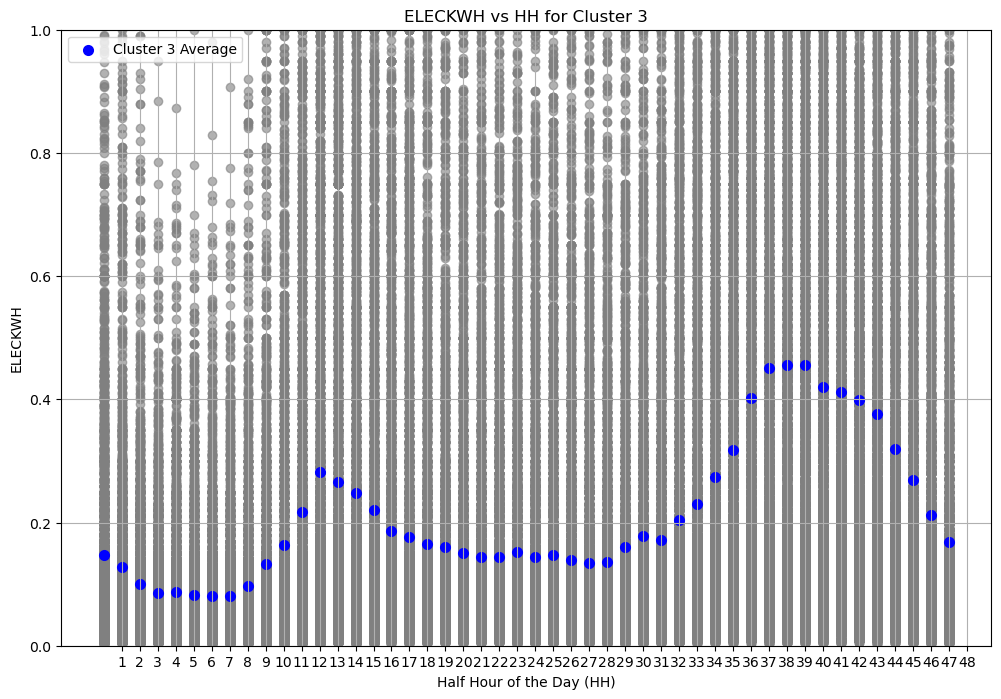

In [306]:

# Filter the data for Cluster 3
cluster_3_data = edrp_with_clusters[edrp_with_clusters['Cluster'] == 3]

# Plot all ANON_IDs in grey
plt.figure(figsize=(12, 8))
for anon_id in cluster_3_data['ANON_ID'].unique():
    anon_data = cluster_3_data[cluster_3_data['ANON_ID'] == anon_id]
    plt.scatter(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.6)

# Calculate the average ELECKWH for Cluster 3 by HH
cluster_3_avg = cluster_3_data.groupby('HH')['ELECKWH'].mean().reset_index()

# Plot the average for Cluster 3 in blue
plt.scatter(cluster_3_avg['HH'], cluster_3_avg['ELECKWH'], color='blue', linewidth=2, label='Cluster 3 Average')

# Plot details
plt.title('ELECKWH vs HH for Cluster 3')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.ylim(0,1)
plt.grid(True)
plt.show()


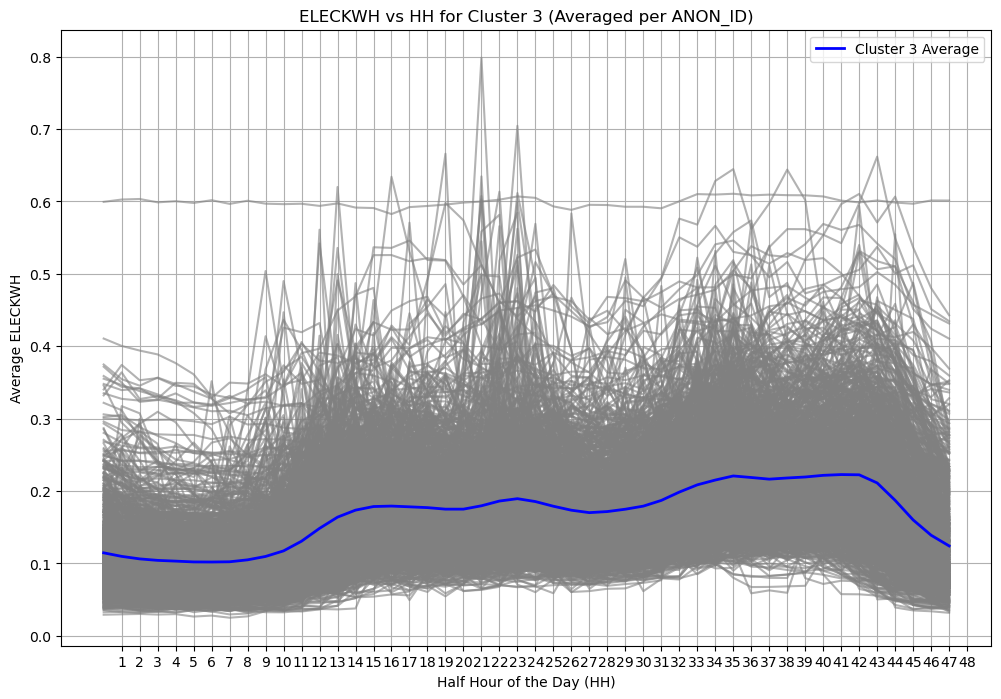

In [307]:

# Filter the data for Cluster 3
cluster_3_data = edrp_with_clusters[edrp_with_clusters['Cluster'] == 0]

# Calculate the average ELECKWH per HH for each ANON_ID
cluster_3_avg_by_anon = (
    cluster_3_data.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Plot all ANON_IDs in grey
plt.figure(figsize=(12, 8))
for anon_id in cluster_3_avg_by_anon['ANON_ID'].unique():
    anon_data = cluster_3_avg_by_anon[cluster_3_avg_by_anon['ANON_ID'] == anon_id]
    plt.plot(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.6)

# Calculate the cluster average ELECKWH per HH
cluster_3_avg = (
    cluster_3_avg_by_anon.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the cluster average in blue
plt.plot(cluster_3_avg['HH'], cluster_3_avg['ELECKWH'], color='blue', linewidth=2, label='Cluster 3 Average')

# Plot details
plt.title('ELECKWH vs HH for Cluster 3 (Averaged per ANON_ID)')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()


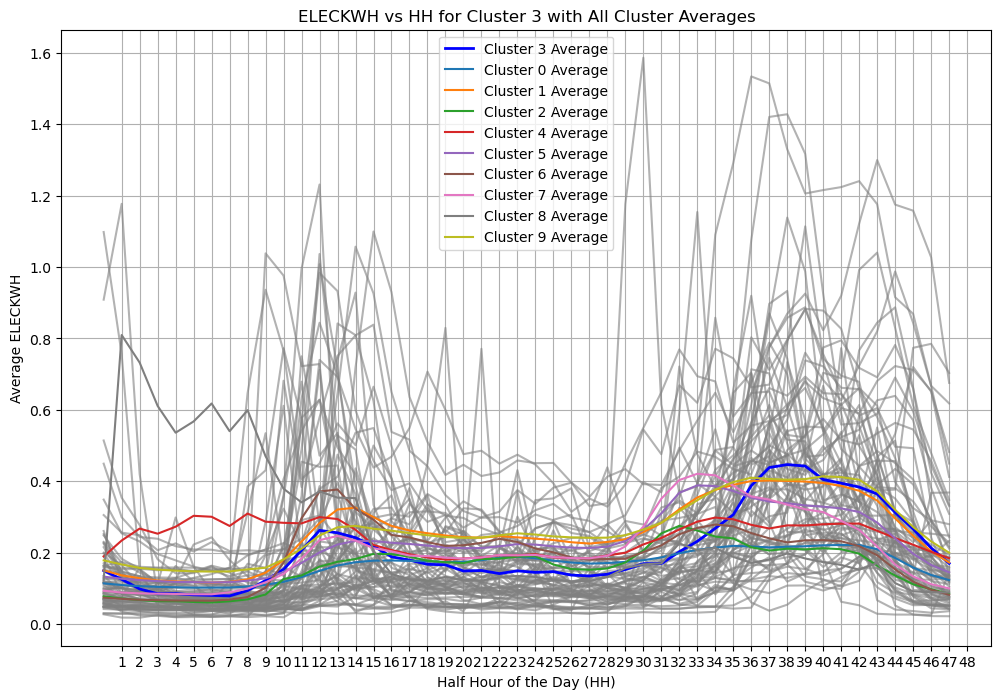

In [308]:

# Filter the data for Cluster 3
cluster_3_data = edrp_with_clusters[edrp_with_clusters['Cluster'] == 3]

# Calculate the average ELECKWH per HH for each ANON_ID in Cluster 3
cluster_3_avg_by_anon = (
    cluster_3_data.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Calculate the average ELECKWH per HH for all clusters
all_clusters_avg = (
    edrp_with_clusters.groupby(['Cluster', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Plot all ANON_IDs in Cluster 3 in grey
plt.figure(figsize=(12, 8))
for anon_id in cluster_3_avg_by_anon['ANON_ID'].unique():
    anon_data = cluster_3_avg_by_anon[cluster_3_avg_by_anon['ANON_ID'] == anon_id]
    plt.plot(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.6)

# Plot the average for Cluster 3 in blue
cluster_3_avg = (
    cluster_3_avg_by_anon.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)
plt.plot(cluster_3_avg['HH'], cluster_3_avg['ELECKWH'], color='blue', linewidth=2, label='Cluster 3 Average')

# Add averages for all other clusters in different colors
cluster_colors = ['red', 'green', 'orange', 'purple', 'brown']  # Define a color palette
for cluster in all_clusters_avg['Cluster'].unique():
    if cluster != 3:  # Exclude Cluster 3 (already plotted in blue)
        cluster_data = all_clusters_avg[all_clusters_avg['Cluster'] == cluster]
        plt.plot(cluster_data['HH'], cluster_data['ELECKWH'], label=f'Cluster {cluster} Average')

# Plot details
plt.title('ELECKWH vs HH for Cluster 3 with All Cluster Averages')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()


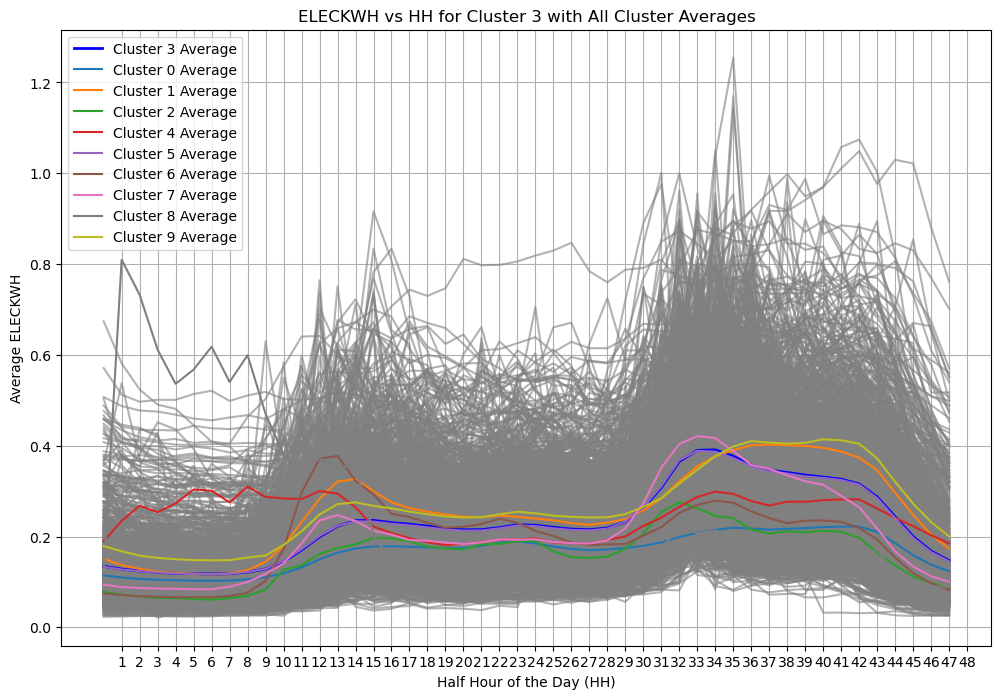

In [309]:

# Filter the data for Cluster 3
cluster_3_data = edrp_with_clusters[edrp_with_clusters['Cluster'] == 5]

# Calculate the average ELECKWH per HH for each ANON_ID in Cluster 3
cluster_3_avg_by_anon = (
    cluster_3_data.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Calculate the average ELECKWH per HH for all clusters
all_clusters_avg = (
    edrp_with_clusters.groupby(['Cluster', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Plot all ANON_IDs in Cluster 3 in grey
plt.figure(figsize=(12, 8))
for anon_id in cluster_3_avg_by_anon['ANON_ID'].unique():
    anon_data = cluster_3_avg_by_anon[cluster_3_avg_by_anon['ANON_ID'] == anon_id]
    plt.plot(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.6)

# Plot the average for Cluster 3 in blue
cluster_3_avg = (
    cluster_3_avg_by_anon.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)
plt.plot(cluster_3_avg['HH'], cluster_3_avg['ELECKWH'], color='blue', linewidth=2, label='Cluster 3 Average')

# Add averages for all other clusters in different colors
cluster_colors = ['red', 'green', 'orange', 'purple', 'brown']  # Define a color palette
for cluster in all_clusters_avg['Cluster'].unique():
    if cluster != 3:  # Exclude Cluster 3 (already plotted in blue)
        cluster_data = all_clusters_avg[all_clusters_avg['Cluster'] == cluster]
        plt.plot(cluster_data['HH'], cluster_data['ELECKWH'], label=f'Cluster {cluster} Average')

# Plot details
plt.title('ELECKWH vs HH for Cluster 3 with All Cluster Averages')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()

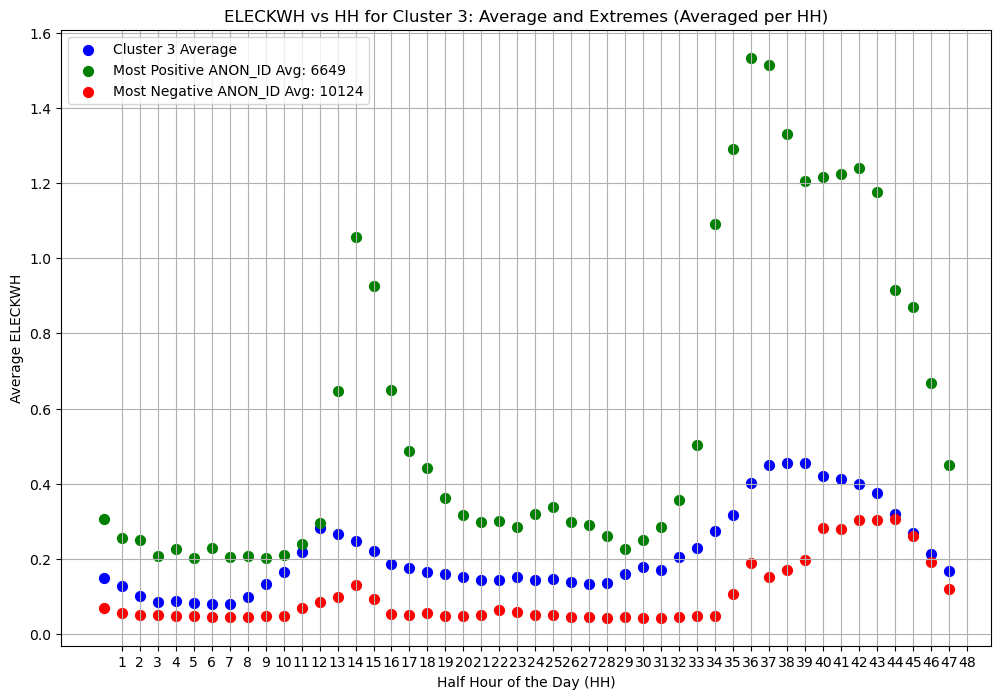

In [310]:

# Filter the data for Cluster 3
cluster_3_data = edrp_with_clusters[edrp_with_clusters['Cluster'] == 3]

# Calculate the average ELECKWH per HH for Cluster 3
cluster_3_avg = (
    cluster_3_data.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'Cluster_Avg_ELECKWH'})
)

# Merge the cluster average back with the individual ANON_ID data
cluster_3_data = cluster_3_data.merge(cluster_3_avg, on='HH', how='left')

# Calculate the absolute difference from the cluster average for each ANON_ID
cluster_3_data['Difference'] = cluster_3_data['ELECKWH'] - cluster_3_data['Cluster_Avg_ELECKWH']

# Calculate the mean difference per ANON_ID
anon_diff = (
    cluster_3_data.groupby('ANON_ID')['Difference']
    .mean()
    .reset_index()
    .rename(columns={'Difference': 'Mean_Difference'})
)

# Identify the ANON_IDs with the most positive and most negative differences
most_positive_anon = anon_diff.loc[anon_diff['Mean_Difference'].idxmax(), 'ANON_ID']
most_negative_anon = anon_diff.loc[anon_diff['Mean_Difference'].idxmin(), 'ANON_ID']

# Extract data for the identified ANON_IDs
positive_anon_data = (
    cluster_3_data[cluster_3_data['ANON_ID'] == most_positive_anon]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

negative_anon_data = (
    cluster_3_data[cluster_3_data['ANON_ID'] == most_negative_anon]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the data
plt.figure(figsize=(12, 8))

# Plot the cluster average
plt.scatter(cluster_3_avg['HH'], cluster_3_avg['Cluster_Avg_ELECKWH'], color='blue', label='Cluster 3 Average', s=50)

# Plot the most positive ANON_ID
plt.scatter(positive_anon_data['HH'], positive_anon_data['ELECKWH'], color='green', label=f'Most Positive ANON_ID Avg: {most_positive_anon}', s=50)

# Plot the most negative ANON_ID
plt.scatter(negative_anon_data['HH'], negative_anon_data['ELECKWH'], color='red', label=f'Most Negative ANON_ID Avg: {most_negative_anon}', s=50)

# Plot details
plt.title('ELECKWH vs HH for Cluster 3: Average and Extremes (Averaged per HH)')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()


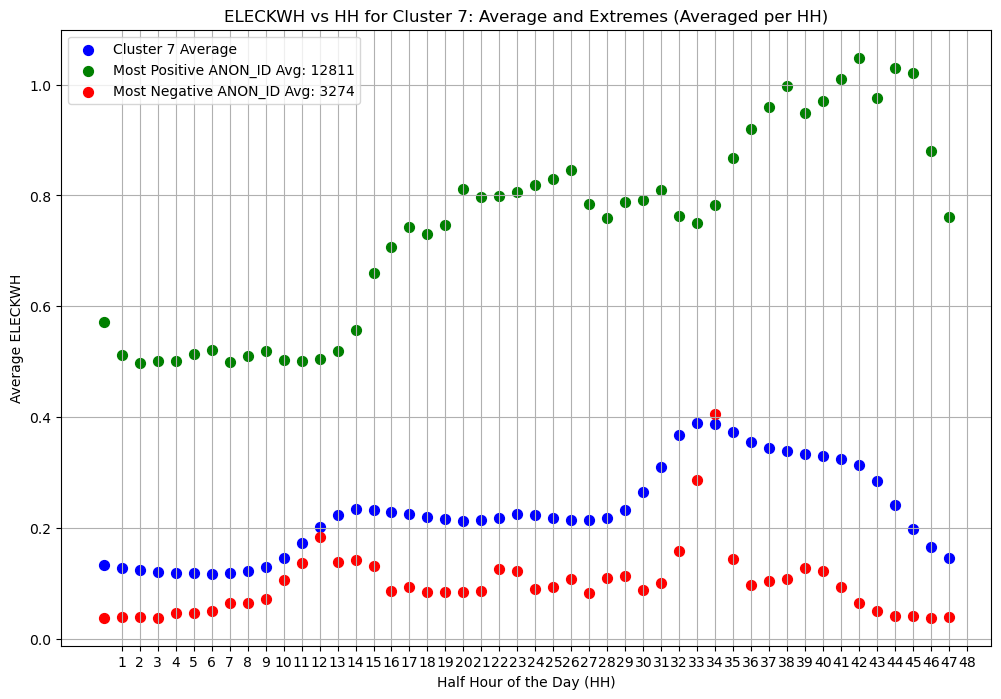

In [311]:

# Filter the data for Cluster 7
cluster_7_data = edrp_with_clusters[edrp_with_clusters['Cluster'] == 5]

# Calculate the average ELECKWH per HH for Cluster 7
cluster_7_avg = (
    cluster_7_data.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'Cluster_Avg_ELECKWH'})
)

# Merge the cluster average back with the individual ANON_ID data
cluster_7_data = cluster_7_data.merge(cluster_7_avg, on='HH', how='left')

# Calculate the absolute difference from the cluster average for each ANON_ID
cluster_7_data['Difference'] = cluster_7_data['ELECKWH'] - cluster_7_data['Cluster_Avg_ELECKWH']

# Calculate the mean difference per ANON_ID
anon_diff = (
    cluster_7_data.groupby('ANON_ID')['Difference']
    .mean()
    .reset_index()
    .rename(columns={'Difference': 'Mean_Difference'})
)

# Identify the ANON_IDs with the most positive and most negative differences
most_positive_anon = anon_diff.loc[anon_diff['Mean_Difference'].idxmax(), 'ANON_ID']
most_negative_anon = anon_diff.loc[anon_diff['Mean_Difference'].idxmin(), 'ANON_ID']

# Extract data for the identified ANON_IDs
positive_anon_data = (
    cluster_7_data[cluster_7_data['ANON_ID'] == most_positive_anon]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

negative_anon_data = (
    cluster_7_data[cluster_7_data['ANON_ID'] == most_negative_anon]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the data
plt.figure(figsize=(12, 8))

# Plot the cluster average
plt.scatter(cluster_7_avg['HH'], cluster_7_avg['Cluster_Avg_ELECKWH'], color='blue', label='Cluster 7 Average', s=50)

# Plot the most positive ANON_ID
plt.scatter(positive_anon_data['HH'], positive_anon_data['ELECKWH'], color='green', label=f'Most Positive ANON_ID Avg: {most_positive_anon}', s=50)

# Plot the most negative ANON_ID
plt.scatter(negative_anon_data['HH'], negative_anon_data['ELECKWH'], color='red', label=f'Most Negative ANON_ID Avg: {most_negative_anon}', s=50)

# Plot details
plt.title('ELECKWH vs HH for Cluster 7: Average and Extremes (Averaged per HH)')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()


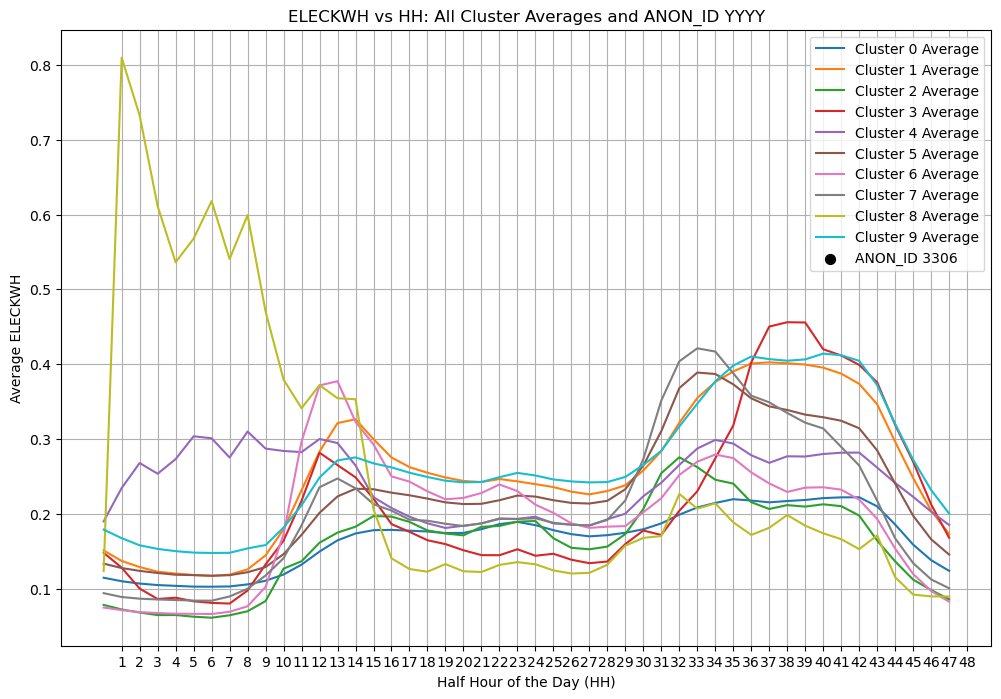

In [312]:
# Calculate the average ELECKWH per HH for each cluster
cluster_avg = (
    edrp_with_clusters.groupby(['Cluster', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'Cluster_Avg_ELECKWH'})
)

# Extract data for ANON_ID 3306
anon_3306_data = (
    edrp_with_clusters[edrp_with_clusters['ANON_ID'] == 2177]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the data
plt.figure(figsize=(12, 8))

# Plot the cluster averages
cluster_colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'cyan']  # Define a palette for clusters
for cluster in cluster_avg['Cluster'].unique():
    cluster_data = cluster_avg[cluster_avg['Cluster'] == cluster]
    plt.plot(cluster_data['HH'], cluster_data['Cluster_Avg_ELECKWH'], label=f'Cluster {cluster} Average')

# Plot the ANON_ID 3306 data
plt.scatter(anon_3306_data['HH'], anon_3306_data['ELECKWH'], color='black', label='ANON_ID 3306', s=50)

# Plot details
plt.title('ELECKWH vs HH: All Cluster Averages and ANON_ID YYYY')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()


In [313]:
# Filter the data for ANON_ID = 3306
anon_3306_data = edrp_features[edrp_features['ANON_ID'] == 2177]

# Compute the mean values of the features for ANON_ID = 3306
anon_3306_means = anon_3306_data.mean(numeric_only=True).to_frame().T

# Add a column to identify it as ANON_ID = 3306
anon_3306_means['Cluster'] = 'ANON_ID YYYY'

# Reset index for the computed means to match cluster_means
anon_3306_means.reset_index(drop=True, inplace=True)

# Append the row to the cluster_means DataFrame
cluster_means_with_anon = pd.concat([cluster_means, anon_3306_means], ignore_index=True)


In [314]:
cluster_means_with_anon


Cluster  RME_am  RME_bre  RME_day  RME_aft  RME_eve  RME_nig   RSD  \
0              0    0.61     0.90     1.07     1.21     1.32     0.88  0.78   
1              1    0.46     1.01     0.92     1.28     1.57     0.87  1.12   
2              2    0.40     0.92     1.09     1.46     1.28     0.69  1.29   
3              3    0.42     0.96     0.72     1.03     2.01     1.09  1.50   
4              4    1.16     1.12     0.76     1.10     1.15     0.91  1.15   
5              5    0.51     0.85     0.95     1.60     1.45     0.78  0.95   
6              6    0.36     1.39     1.11     1.25     1.19     0.58  1.53   
7              7    0.43     0.94     0.91     1.78     1.50     0.62  1.12   
8              8    1.93     1.33     0.57     0.87     0.75     0.83  1.76   
9              9    0.55     0.88     0.94     1.26     1.55     0.92  0.82   
10  ANON_ID YYYY     NaN      NaN      NaN      NaN      NaN      NaN   NaN   

     ADR  ANON_ID  
0   0.52      NaN  
1   1.17      NaN  
2   0.82      NaN  
3   1.26      NaN  
4   1.12      NaN  
5   0.88      NaN  
6   1.30      NaN  
7   0.96      NaN  
8   1.61      NaN  
9   0.81      NaN  
10   NaN      NaN